202219006 - Milan Dimri<br>
202219007 - Aditya Shukla<br>
202219008 - Harish Kumar<br>
202219013 - Abey Chris John<br>
202219014 - Saloni Sawantdesai<br>

In [2]:
import pandas as pd

In [3]:
spi = pd.read_excel(r"C:\Users\Abaychrish\Downloads\G-3 spei_spi.xlsx", header=1, sheet_name='SPI')
spei = pd.read_excel(r"C:\Users\Abaychrish\Downloads\G-3 spei_spi.xlsx", header=1, sheet_name='SPEI')

In [4]:
spi

YEAR MONTH  Sl. No.  spi1  spi1.1  spi1.2  spi1.3  spi1.4
0    1986   Jan        1  0.97    1.50    0.84    0.84    1.11
1    1986   Feb        2  1.28    1.50    1.83    1.28    1.28
2    1986   Mar        3  1.50    1.50    1.50    1.28    1.28
3    1986   Apr        4  0.97    1.11    1.11    1.11    1.11
4    1986   May        5  0.43    0.73    0.84    0.84    0.84
..    ...   ...      ...   ...     ...     ...     ...     ...
355  2015   Aug      356 -2.82   -2.51   -2.27   -2.49   -2.50
356  2015   Sep      357  0.04   -0.14   -0.40   -0.44   -0.42
357  2015   Oct      358 -0.09   -0.12   -0.43   -0.43   -0.46
358  2015   Nov      359  0.52    0.52    0.52    0.47    0.52
359  2015   Dec      360  0.97    1.11    1.11    1.28    1.28

[360 rows x 8 columns]

In [5]:
spei

YEAR MONTH  Sl. No.    SPEI 1  SPEI 1.1  SPEI 1.2  SPEI 1.3  SPEI 1.4
0    1986   Jan        1 -0.390193 -0.360960 -0.329007 -0.434064 -0.445050
1    1986   Feb        2  0.330262  0.335614  0.330721  0.336411  0.334190
2    1986   Mar        3 -0.116821 -0.096226 -0.087964 -0.075339 -0.126201
3    1986   Apr        4 -0.243433 -0.204965 -0.185285 -0.179924 -0.195230
4    1986   May        5 -0.298467 -0.260928 -0.250266 -0.230949 -0.221874
..    ...   ...      ...       ...       ...       ...       ...       ...
175  2000   Aug      176 -0.889070 -0.225981 -0.562404 -0.965780 -1.181512
176  2000   Sep      177 -1.332875 -1.280538 -1.457881 -1.427052 -1.230577
177  2000   Oct      178 -1.179107 -1.161347 -1.142431 -1.197267 -1.214889
178  2000   Nov      179 -0.436858 -0.424548 -0.424991 -0.411524 -0.382961
179  2000   Dec      180  0.284319  0.290556  0.087653  0.720415  0.460687

[180 rows x 8 columns]

In [6]:
month={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
spi['MONTH#']=spi['MONTH'].map(month)
spei['MONTH#']=spei['MONTH'].map(month)

In [7]:
spi = spi[spi.apply(lambda row: (row['YEAR'], row['MONTH#']) in zip(spei['YEAR'], spei['MONTH#']), axis=1)]
spei = spei[spei.apply(lambda row: (row['YEAR'], row['MONTH#']) in zip(spi['YEAR'], spi['MONTH#']), axis=1)]

In [8]:
spi.isna().sum()

YEAR       0
MONTH      0
Sl. No.    0
spi1       0
spi1.1     0
spi1.2     0
spi1.3     0
spi1.4     0
MONTH#     0
dtype: int64

In [9]:
spei.isna().sum()

YEAR        0
MONTH       0
Sl. No.     0
SPEI 1      0
SPEI 1.1    0
SPEI 1.2    0
SPEI 1.3    0
SPEI 1.4    0
MONTH#      0
dtype: int64

In [10]:
spi

YEAR MONTH  Sl. No.  spi1  spi1.1  spi1.2  spi1.3  spi1.4  MONTH#
0    1986   Jan        1  0.97    1.50    0.84    0.84    1.11       1
1    1986   Feb        2  1.28    1.50    1.83    1.28    1.28       2
2    1986   Mar        3  1.50    1.50    1.50    1.28    1.28       3
3    1986   Apr        4  0.97    1.11    1.11    1.11    1.11       4
4    1986   May        5  0.43    0.73    0.84    0.84    0.84       5
..    ...   ...      ...   ...     ...     ...     ...     ...     ...
175  2000   Aug      176 -0.66   -0.12   -0.35   -0.82   -1.16       8
176  2000   Sep      177 -1.45   -1.35   -1.61   -1.62   -1.35       9
177  2000   Oct      178 -0.34   -0.17   -0.43   -0.43   -0.52      10
178  2000   Nov      179  0.52    0.52    0.34    0.43    0.52      11
179  2000   Dec      180  1.28    1.35    1.18    1.76    1.66      12

[180 rows x 9 columns]

In [11]:
spi['Date'] = pd.to_datetime(spi['YEAR'].astype(str) + '-' + spi['MONTH#'].astype(str))
spi.set_index('Date', inplace=True)
spei['Date'] = pd.to_datetime(spei['YEAR'].astype(str) + '-' + spei['MONTH#'].astype(str))
spei.set_index('Date', inplace=True)

C:\Users\Abaychrish\AppData\Local\Temp\ipykernel_5428\3368233438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spi['Date'] = pd.to_datetime(spi['YEAR'].astype(str) + '-' + spi['MONTH#'].astype(str))


In [12]:
spei.columns

Index(['YEAR', 'MONTH', 'Sl. No.', 'SPEI 1', 'SPEI 1.1', 'SPEI 1.2',
       'SPEI 1.3', 'SPEI 1.4', 'MONTH#'],
      dtype='object')

In [13]:
spi.drop(columns=['YEAR','MONTH','Sl. No.', 'MONTH#'], inplace = True)
spei.drop(columns=['YEAR','MONTH','Sl. No.', 'MONTH#'], inplace = True)

C:\Users\Abaychrish\AppData\Local\Temp\ipykernel_5428\1698505360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spi.drop(columns=['YEAR','MONTH','Sl. No.', 'MONTH#'], inplace = True)


In [14]:
spi

spi1  spi1.1  spi1.2  spi1.3  spi1.4
Date                                            
1986-01-01  0.97    1.50    0.84    0.84    1.11
1986-02-01  1.28    1.50    1.83    1.28    1.28
1986-03-01  1.50    1.50    1.50    1.28    1.28
1986-04-01  0.97    1.11    1.11    1.11    1.11
1986-05-01  0.43    0.73    0.84    0.84    0.84
...          ...     ...     ...     ...     ...
2000-08-01 -0.66   -0.12   -0.35   -0.82   -1.16
2000-09-01 -1.45   -1.35   -1.61   -1.62   -1.35
2000-10-01 -0.34   -0.17   -0.43   -0.43   -0.52
2000-11-01  0.52    0.52    0.34    0.43    0.52
2000-12-01  1.28    1.35    1.18    1.76    1.66

[180 rows x 5 columns]

C:\Users\Abaychrish\AppData\Local\Temp\ipykernel_5428\1947725169.py:35: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  ax.locator_params(axis='x', nbins=10)


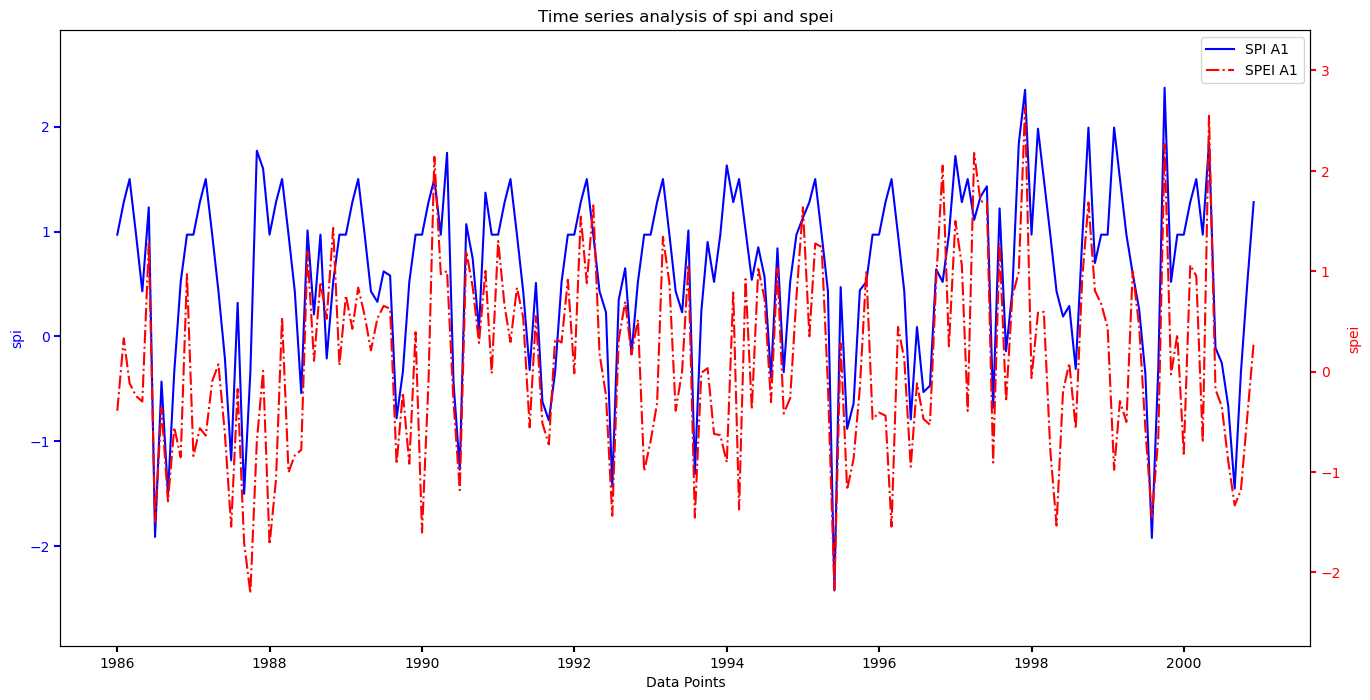

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 8))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
# twin2 = ax.twinx()

# twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(spi['spi1'], "b-", label="SPI A1")
# p1_2, = ax.plot(spi['spi1.2'], "-", label="SPI A2")
# p1_3, = ax.plot(spi['spi1.3'], "c-", label="SPI A3")

p2, = twin1.plot(spei['SPEI 1'], "r-.", label="SPEI A1")
# p2_2, = twin1.plot(spei['SPEI 1.1'], "m-.", label="SPEI A2")
# p2_3, = twin1.plot(spei['SPEI 1.2'], "y-.", label="SPEI A3")

ax.set_xlim()
ax.set_ylim(min([spi['spi1'].min()-0.5, spi['spi1.1'].min()-0.5, spi['spi1.2'].min()-0.5]), max([spi['spi1'].max()+0.5, spi['spi1.1'].max()+0.5, spi['spi1.2'].max()+0.5]))
twin1.set_ylim(min([spei['SPEI 1'].min()-0.5, spei['SPEI 1.1'].min()-0.5, spei['SPEI 1.2'].min()-0.5]), max([spei['SPEI 1'].max()+0.5, spei['SPEI 1.1'].max()+0.5, spei['SPEI 1.2'].max()+0.5]))

ax.set_xlabel("Data Points")
ax.set_ylabel("spi")
twin1.set_ylabel("spei")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.locator_params(axis='x', nbins=10)

ax.legend(handles=[p1, p2])
plt.title('Time series analysis of spi and spei')
plt.show()

C:\Users\Abaychrish\AppData\Local\Temp\ipykernel_5428\2147119033.py:28: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  ax.locator_params(axis='x', nbins=10)


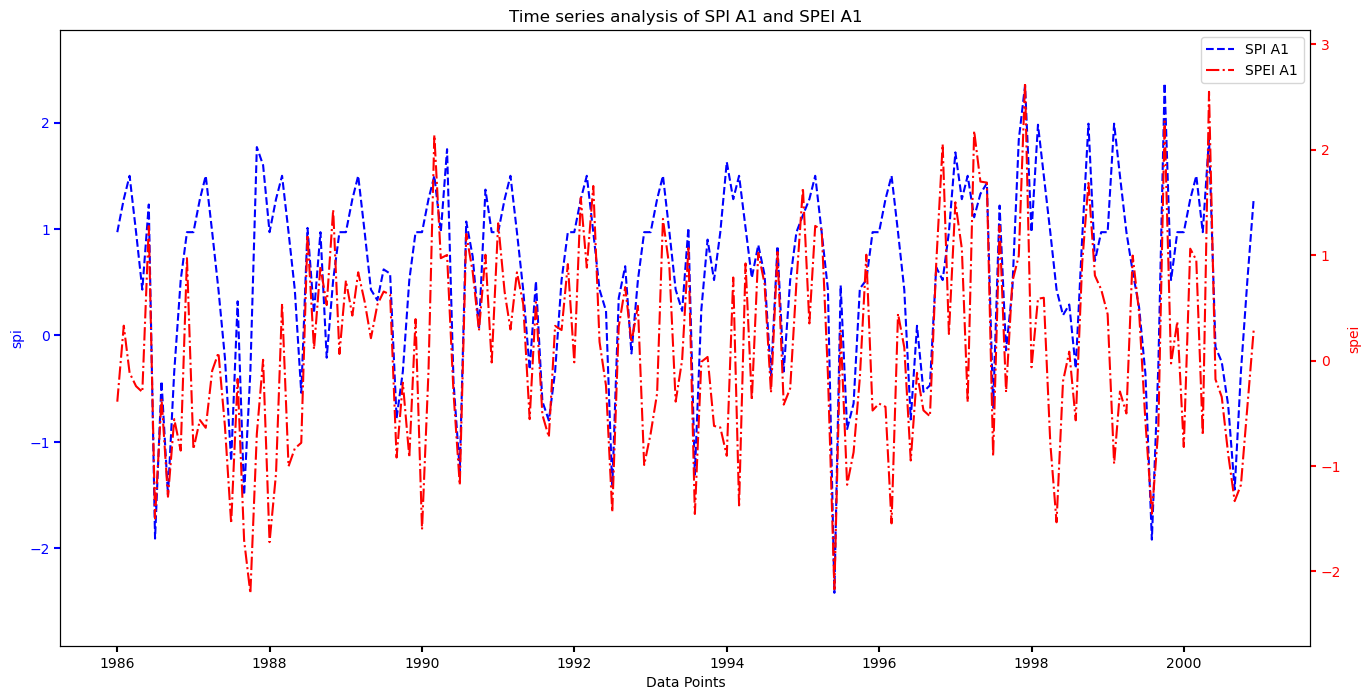

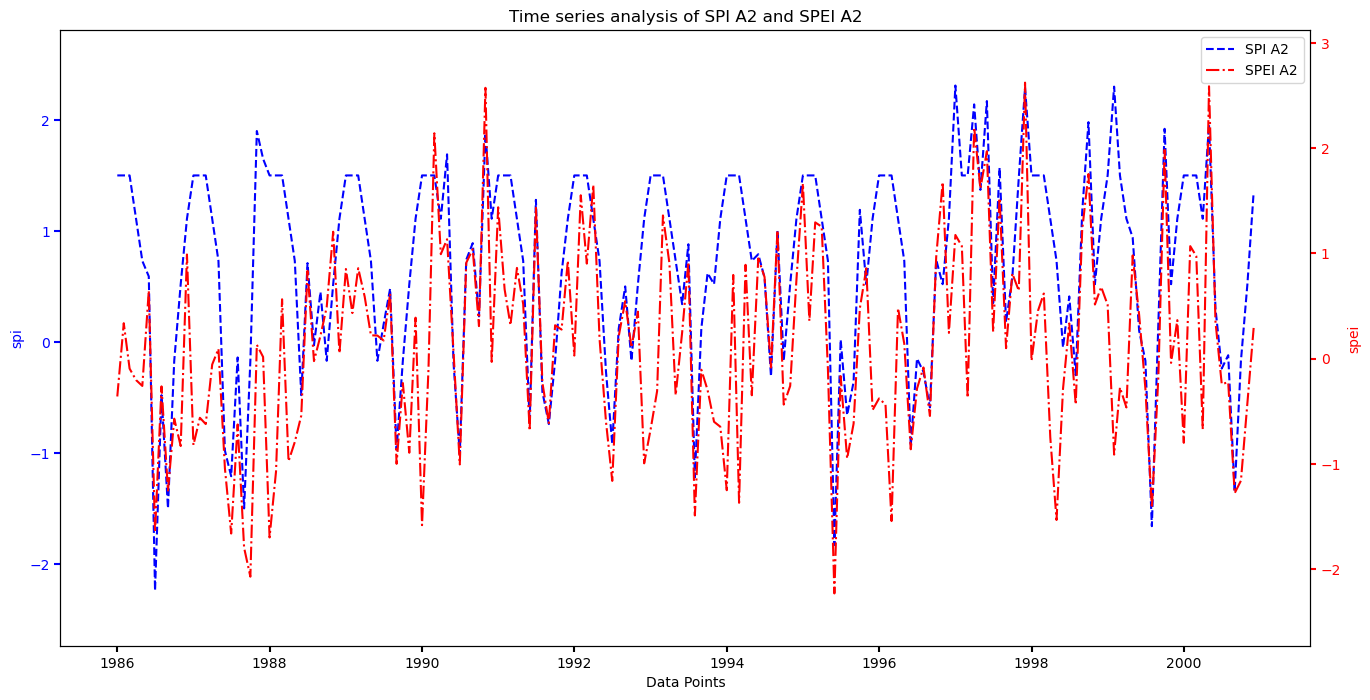

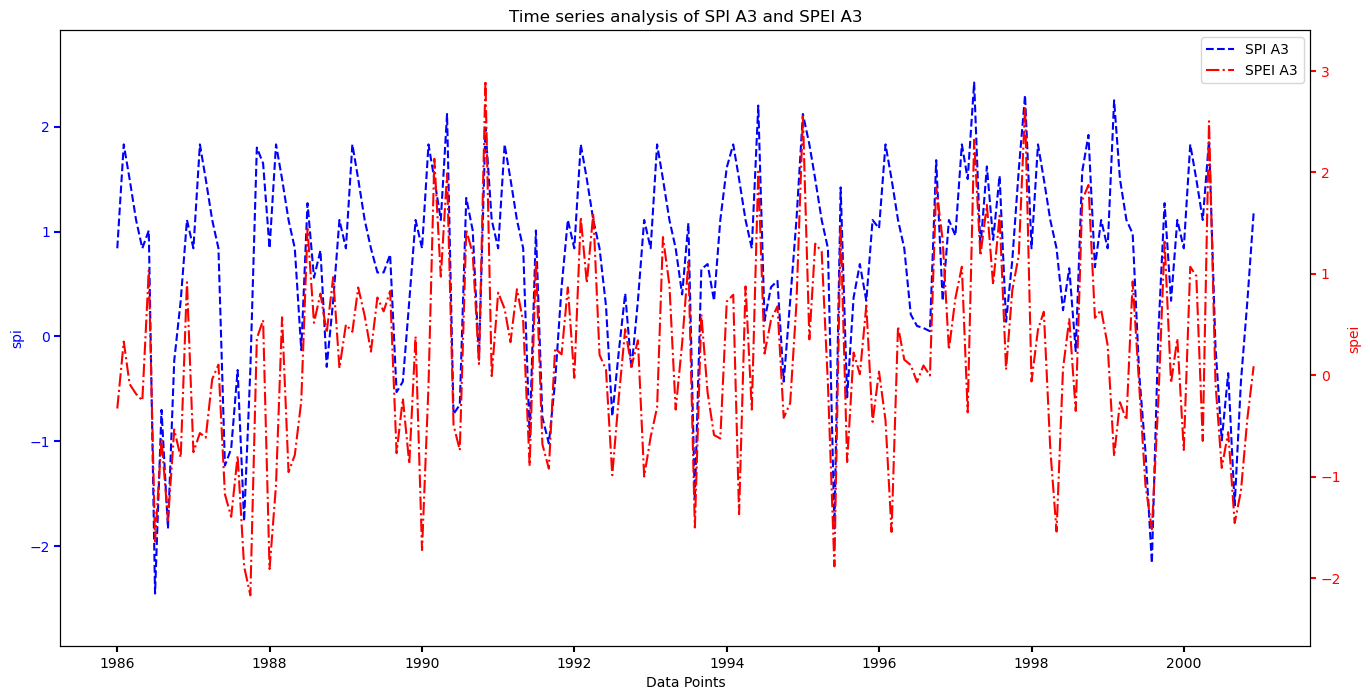

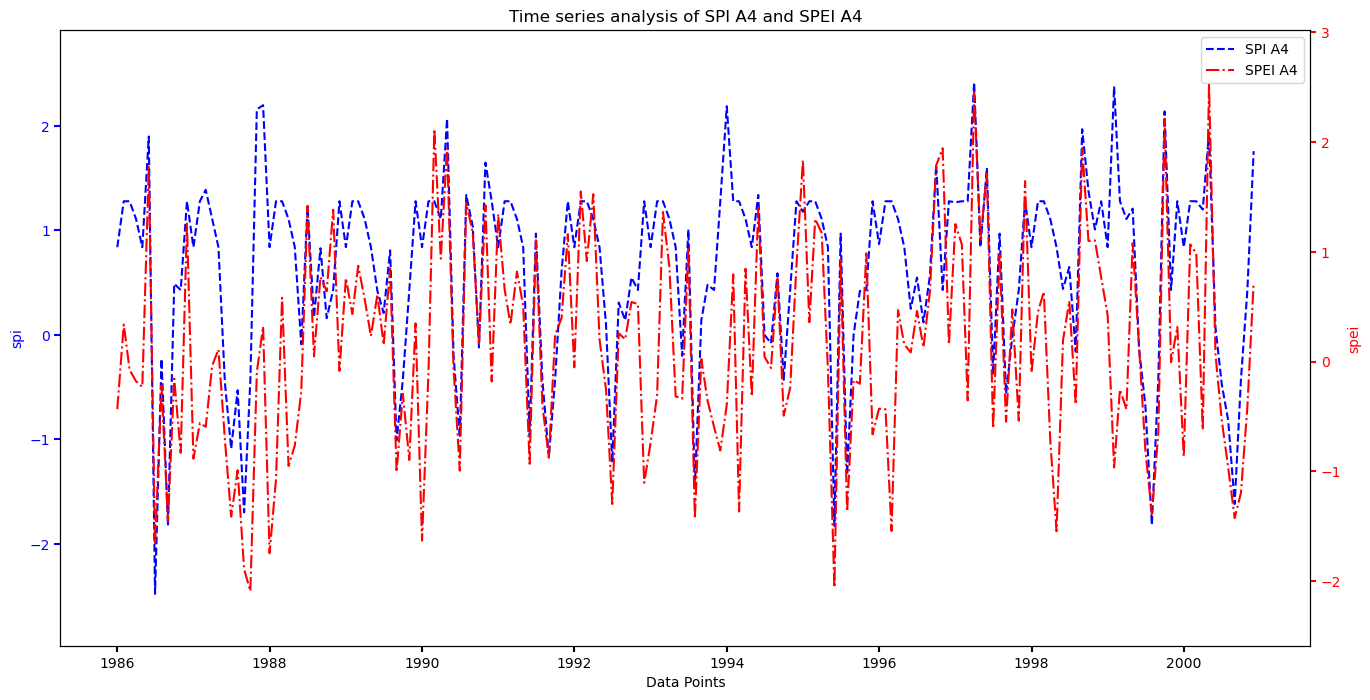

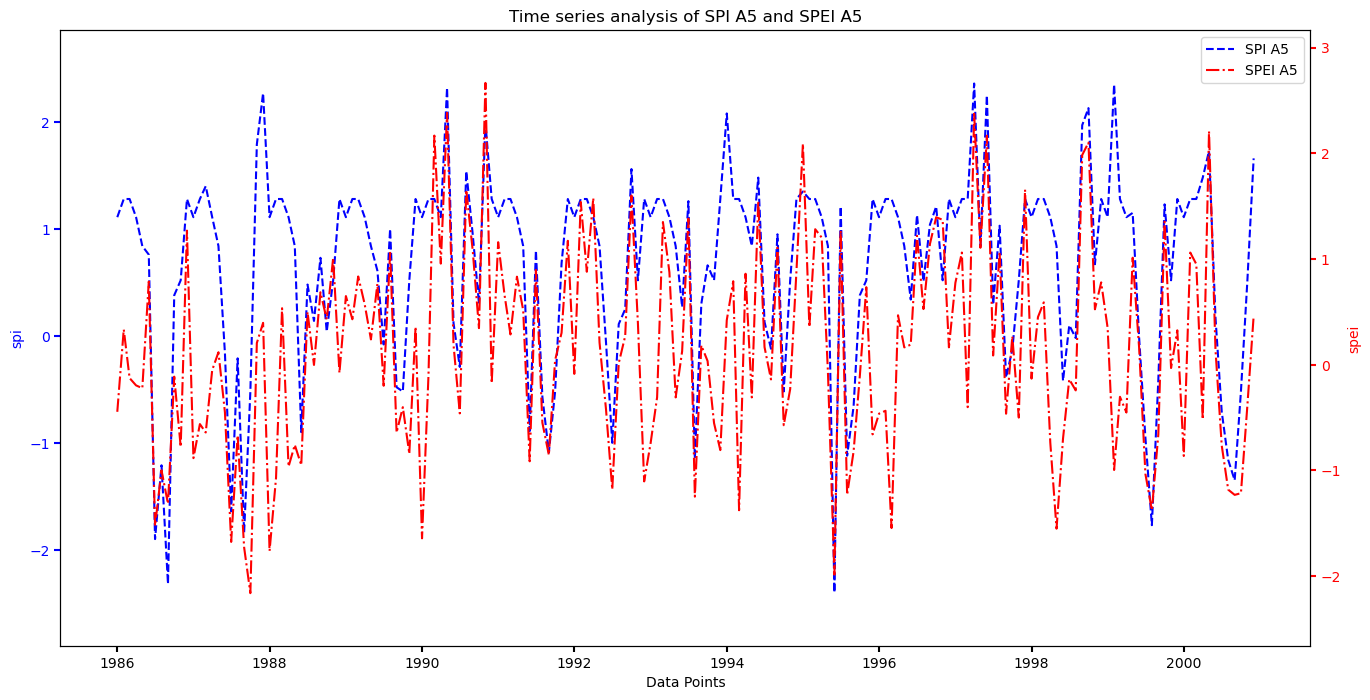

In [17]:
import matplotlib.pyplot as plt
for i in range(len(spi.columns)):
    fig, ax = plt.subplots(figsize=(20, 8))
    fig.subplots_adjust(right=0.75)

    twin1 = ax.twinx()

    p1, = ax.plot(spi[spi.columns[i]], "b--", label=f"SPI A{i+1}")

    p2, = twin1.plot(spei[spei.columns[i]], "r-.", label=f"SPEI A{i+1}")

    ax.set_xlim()
    ax.set_ylim(spi[spi.columns[i]].min()-0.5, spi[spi.columns[i]].max()+0.5)
    twin1.set_ylim(spei[spei.columns[i]].min()-0.5, spei[spei.columns[i]].max()+0.5)

    ax.set_xlabel("Data Points")
    ax.set_ylabel("spi")
    twin1.set_ylabel("spei")

    ax.yaxis.label.set_color(p1.get_color())
    twin1.yaxis.label.set_color(p2.get_color())

    tkw = dict(size=4, width=1.5)
    ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
    twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    ax.tick_params(axis='x', **tkw)

    ax.locator_params(axis='x', nbins=10)

    ax.legend(handles=[p1, p2])
    plt.title(f'Time series analysis of SPI A{i+1} and SPEI A{i+1}')
    plt.show()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_arch
from arch import arch_model
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
%matplotlib inline
import datetime as dt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [19]:
# Testing For Stationarity
for i in range(len(spi.columns)):
    spi1_adftest=adfuller(spi[spi.columns[i]])
    print(f'spi1 of Area {i+1}:', spi1_adftest)
    spei1_adftest=adfuller(spei[spei.columns[i]])
    print(f'spei1 of Area {i+1}:', spei1_adftest)

spi1 of Area 1: (-2.2697939292811276, 0.18189513492011922, 13, 166, {'1%': -3.4703698981001665, '5%': -2.8791138497902193, '10%': -2.576139407751488}, 349.43572699496053)
spei1 of Area 1: (-7.334117608204885, 1.1080292707132403e-10, 1, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 451.0688949984428)
spi1 of Area 2: (-2.5156186200895996, 0.11172024647984441, 12, 167, {'1%': -3.470126426071447, '5%': -2.8790075987120027, '10%': -2.5760826967621644}, 333.82751381279405)
spei1 of Area 2: (-5.514713007152329, 1.9366720780549887e-06, 2, 177, {'1%': -3.467845319799907, '5%': -2.878011745497439, '10%': -2.575551186759871}, 446.6003445612324)
spi1 of Area 3: (-2.431434500223857, 0.13306006643137358, 12, 167, {'1%': -3.470126426071447, '5%': -2.8790075987120027, '10%': -2.5760826967621644}, 382.0421408394564)
spei1 of Area 3: (-5.628958580792779, 1.1007149111467532e-06, 2, 177, {'1%': -3.467845319799907, '5%': -2.878011745497439, '10%': -2.575551186759871

In [20]:
# Testing For Stationarity
# spi1_adftest=adfuller(spi['spi1'])
# print('spi1 of Area 1:', spi1_adftest)
# spi1_adftest=adfuller(spi['spi1.1'])
# print('spi1 of Area 2:', spi1_adftest)
# spi1_adftest=adfuller(spi['spi1.2'])
# print('spi1 of Area 3:', spi1_adftest)
# spi1_adftest=adfuller(spi['spi1.3'])
# print('spi1 of Area 4:', spi1_adftest)
# spi1_adftest=adfuller(spi['spi1.4'])
# print('spi1 of Area 5:', spi1_adftest)
# print('\n')

# spei1_adftest=adfuller(spei['SPEI 1'])
# print('spei1 of Area 1:', spei1_adftest)
# spei1_adftest=adfuller(spei['SPEI 1.1'])
# print('spei1 of Area 2:', spei1_adftest)
# spei1_adftest=adfuller(spei['SPEI 1.2'])
# print('spei1 of Area 3:', spei1_adftest)
# spei1_adftest=adfuller(spei['SPEI 1.3'])
# print('spei1 of Area 4:', spei1_adftest)
# spei1_adftest=adfuller(spei['SPEI 1.4'])
# print('spei1 of Area 5:', spei1_adftest)

In [21]:
# Testing For Stationarity
spi1_adftest=adfuller(spi['spi1'].diff().dropna())
print('spi1 of Area 1:', spi1_adftest)
spi1_adftest=adfuller(spi['spi1.1'].diff().dropna())
print('spi1 of Area 2:', spi1_adftest)
spi1_adftest=adfuller(spi['spi1.2'].diff().dropna())
print('spi1 of Area 3:', spi1_adftest)

spi1 of Area 1: (-9.013246933365112, 6.045758388764185e-15, 12, 166, {'1%': -3.4703698981001665, '5%': -2.8791138497902193, '10%': -2.576139407751488}, 351.6937691491928)
spi1 of Area 2: (-8.287930604042632, 4.339657751010786e-13, 12, 166, {'1%': -3.4703698981001665, '5%': -2.8791138497902193, '10%': -2.576139407751488}, 337.75696956541503)
spi1 of Area 3: (-9.526405652863968, 2.9697455080882805e-16, 11, 167, {'1%': -3.470126426071447, '5%': -2.8790075987120027, '10%': -2.5760826967621644}, 384.70577583479104)


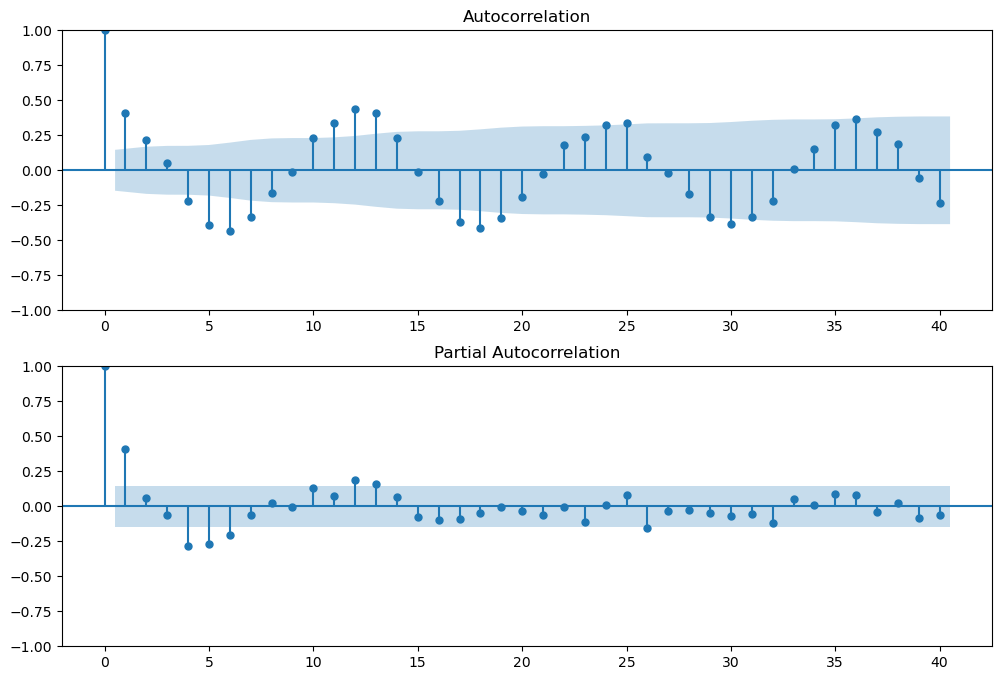

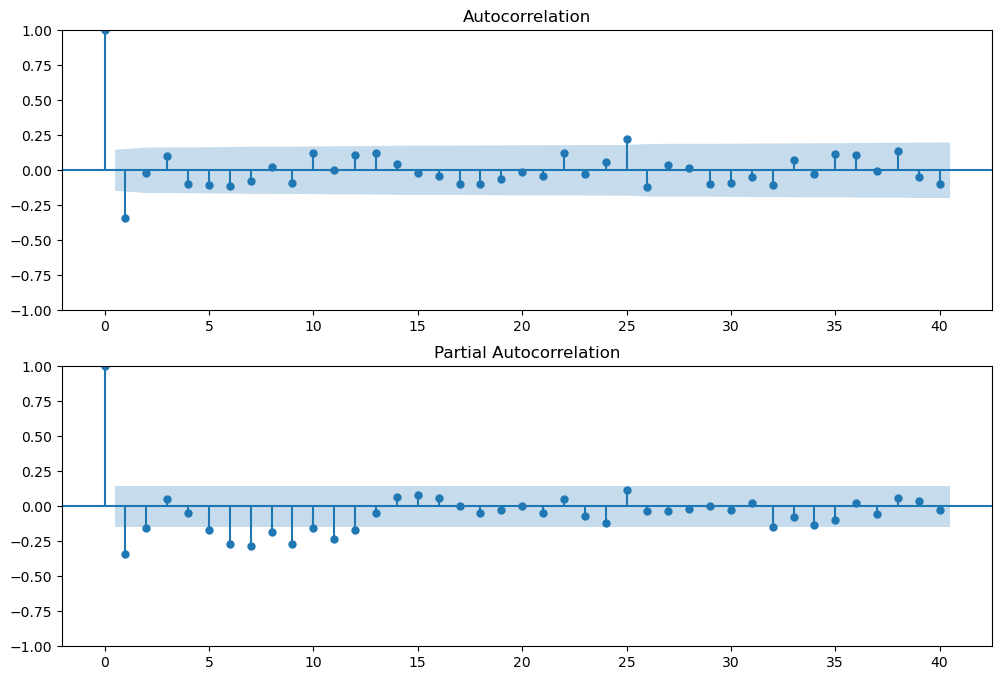

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(spi['spi1'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spi['spi1'], lags=40, ax=ax2)
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(spi['spi1'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spi['spi1'].diff().dropna(), lags=40, ax=ax2)
plt.show()

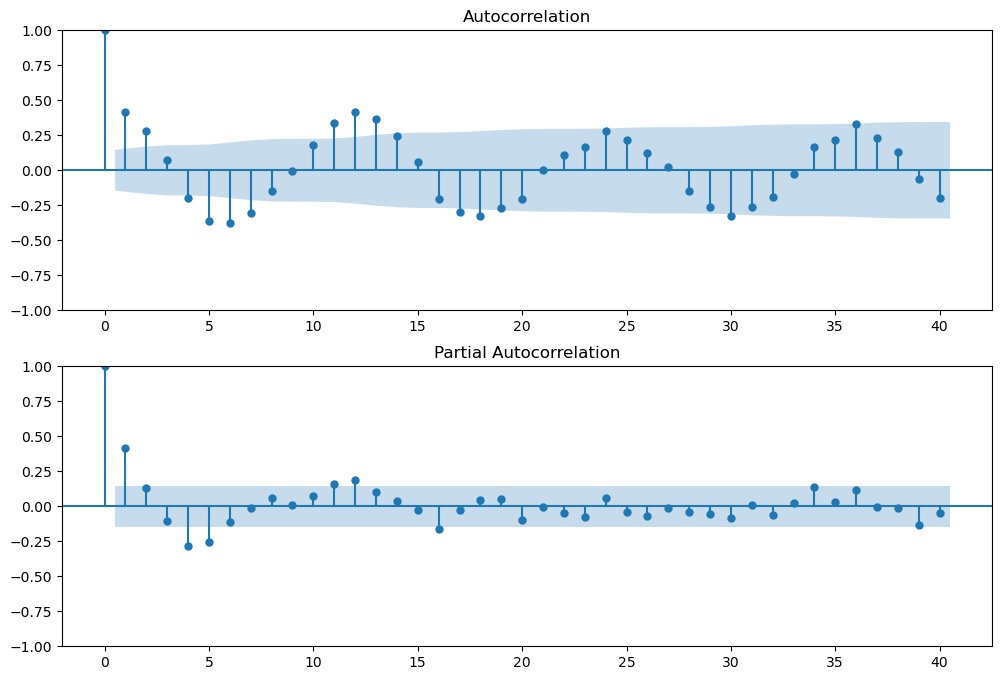

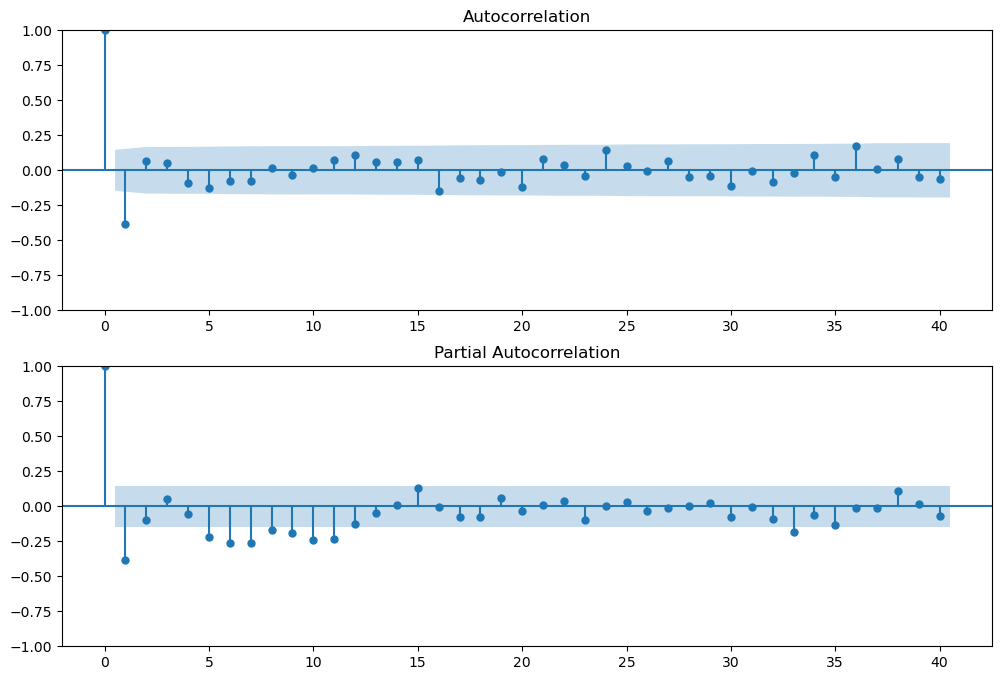

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(spi['spi1.2'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spi['spi1.2'], lags=40, ax=ax2)
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(spi['spi1.2'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spi['spi1.2'].diff().dropna(), lags=40, ax=ax2)
plt.show()

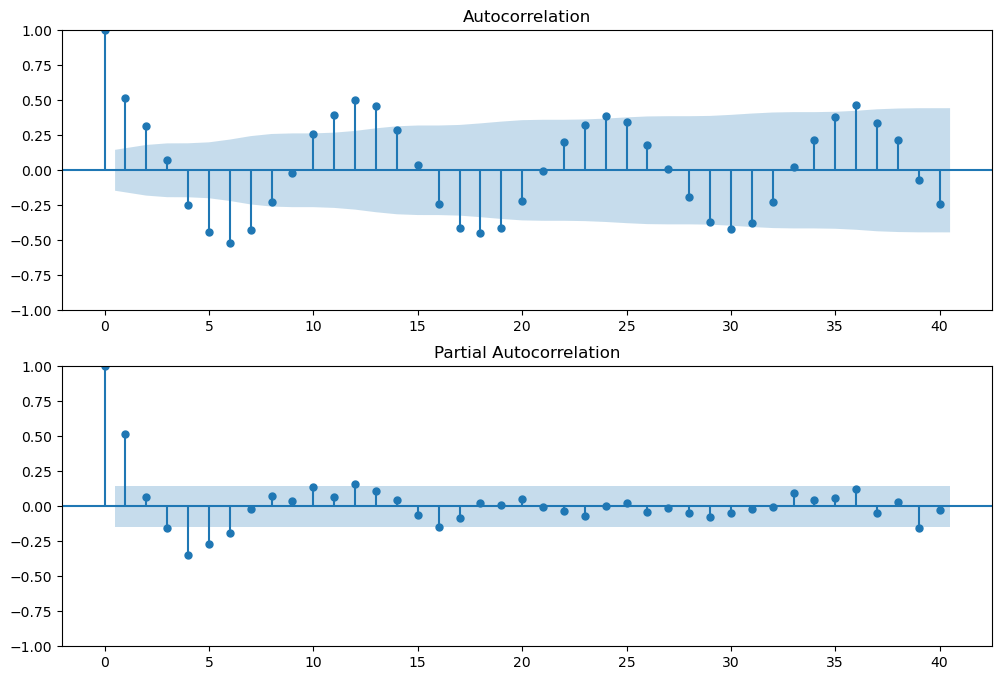

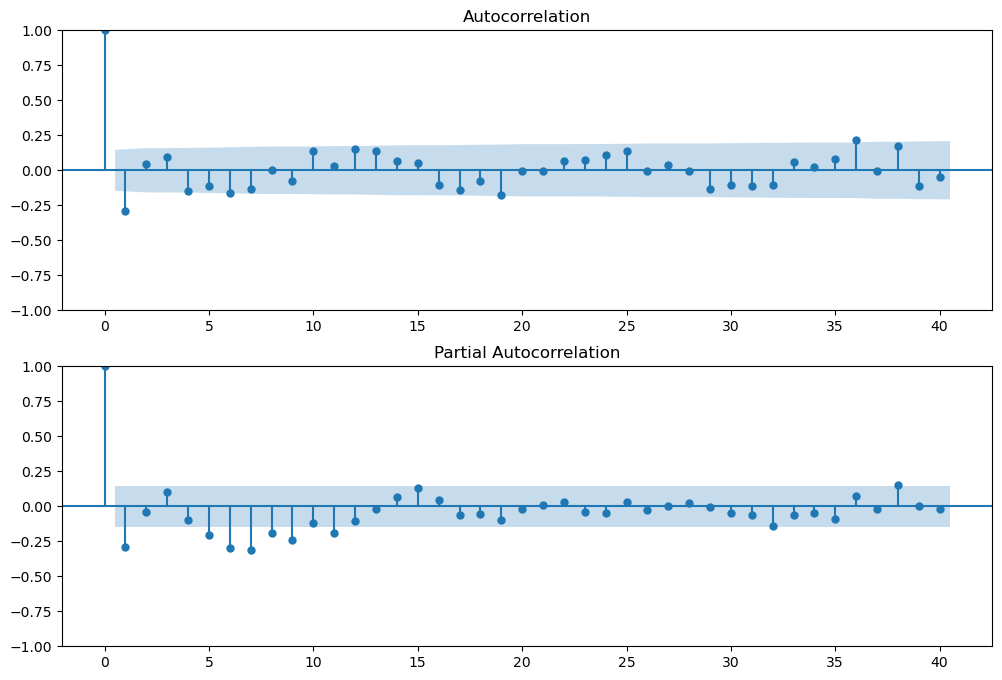

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(spi['spi1.1'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spi['spi1.1'], lags=40, ax=ax2)
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(spi['spi1.1'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spi['spi1.1'].diff().dropna(), lags=40, ax=ax2)
plt.show()

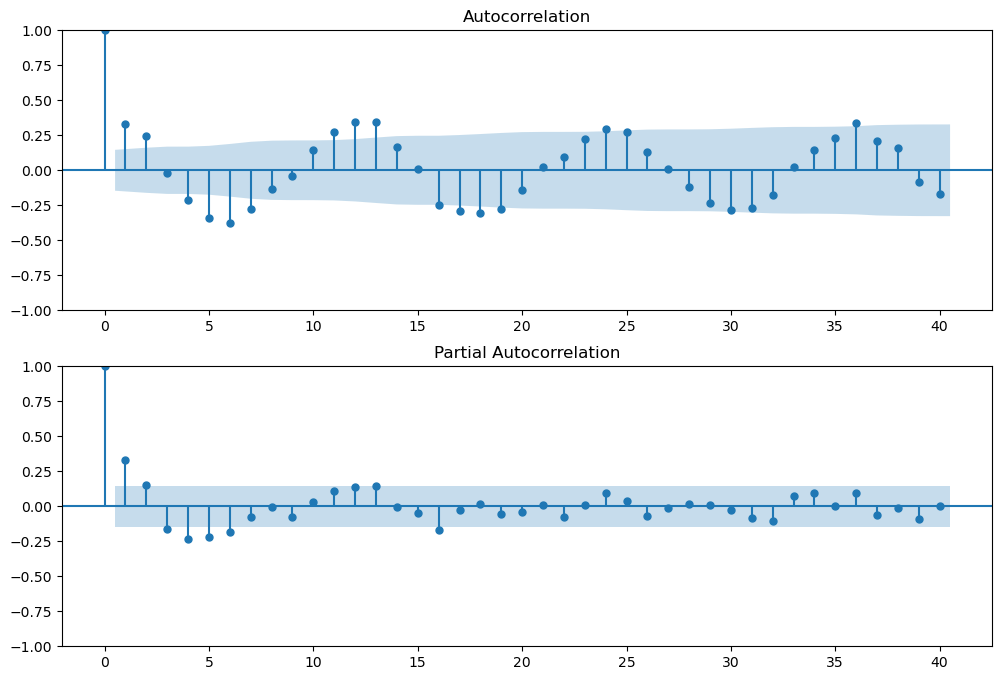

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(spi['spi1.3'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spi['spi1.3'], lags=40, ax=ax2)
plt.show()

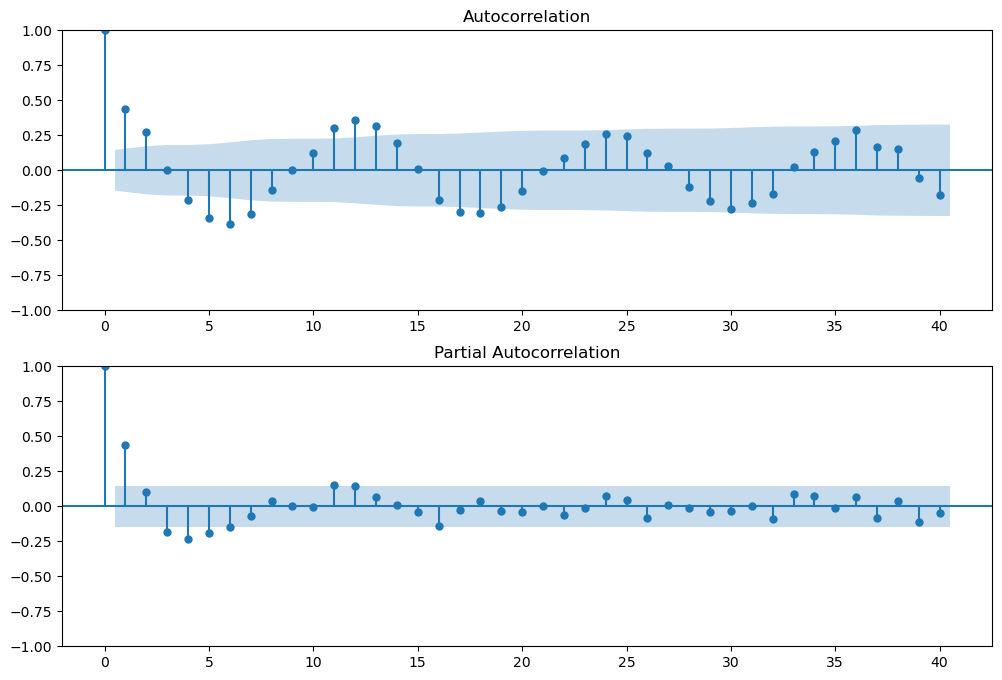

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(spi['spi1.4'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spi['spi1.4'], lags=40, ax=ax2)
plt.show()

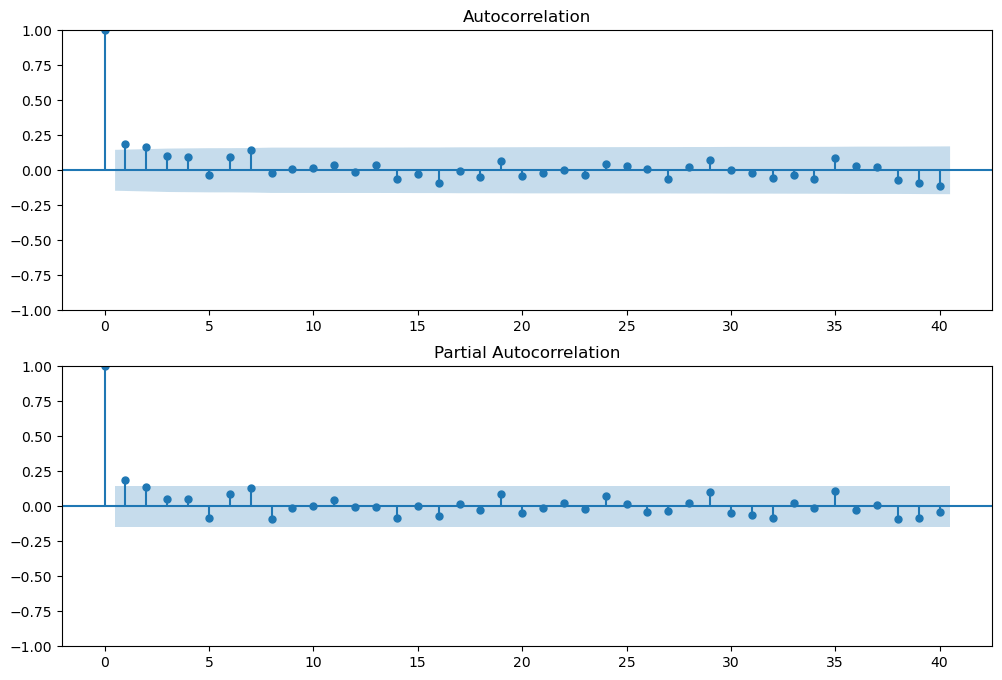

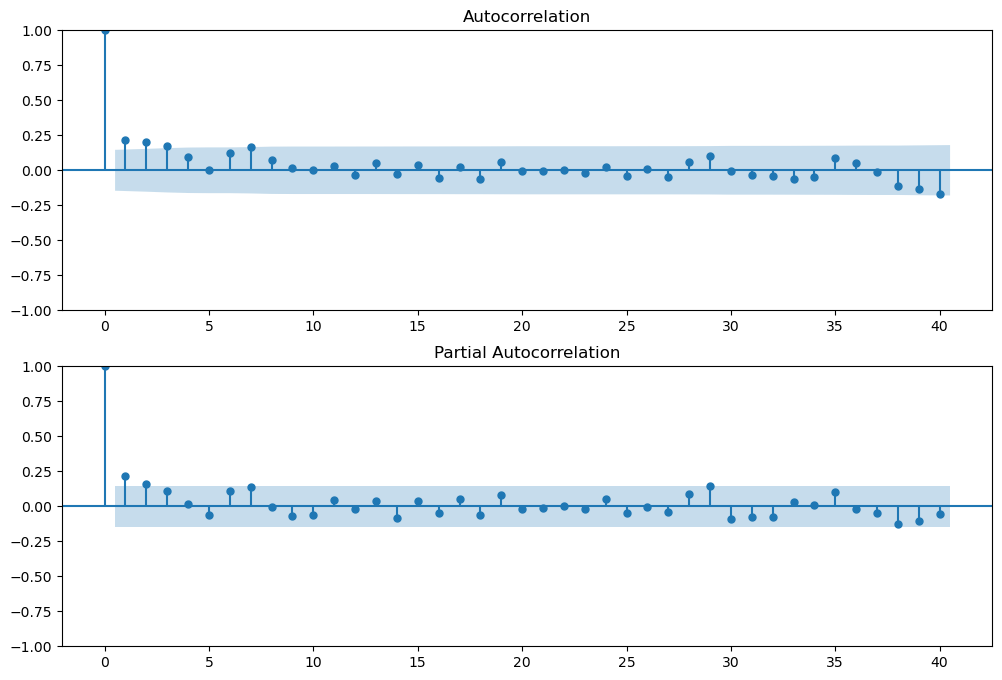

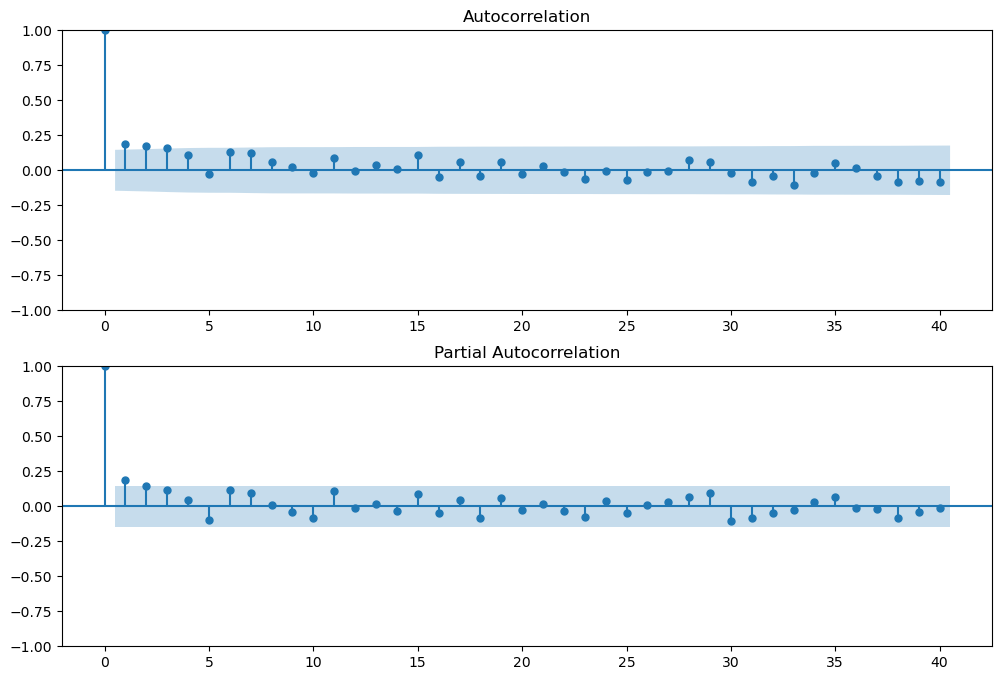

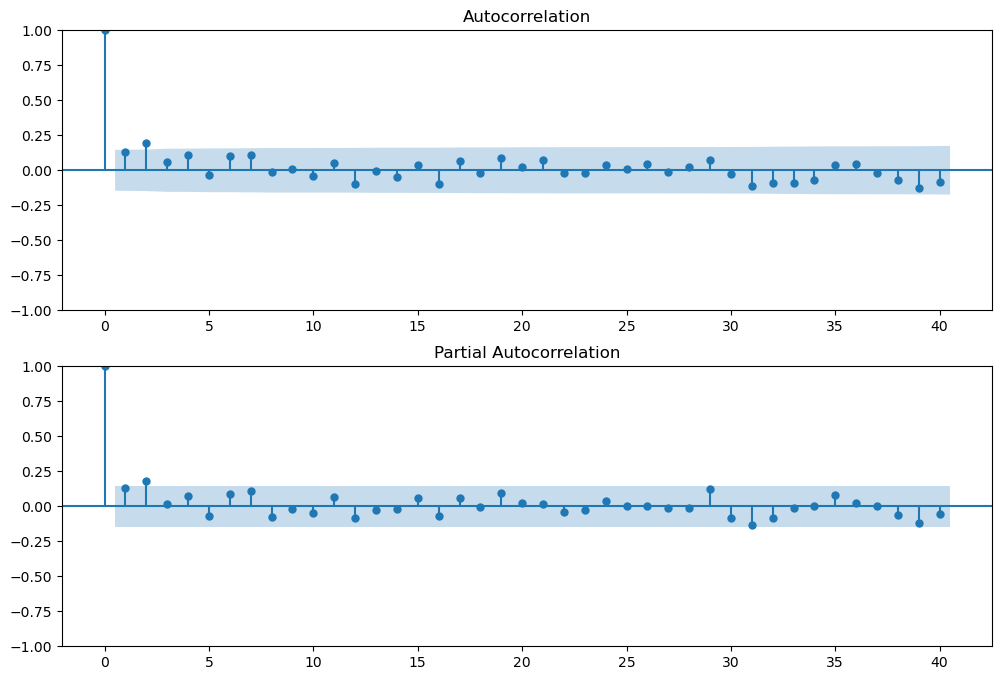

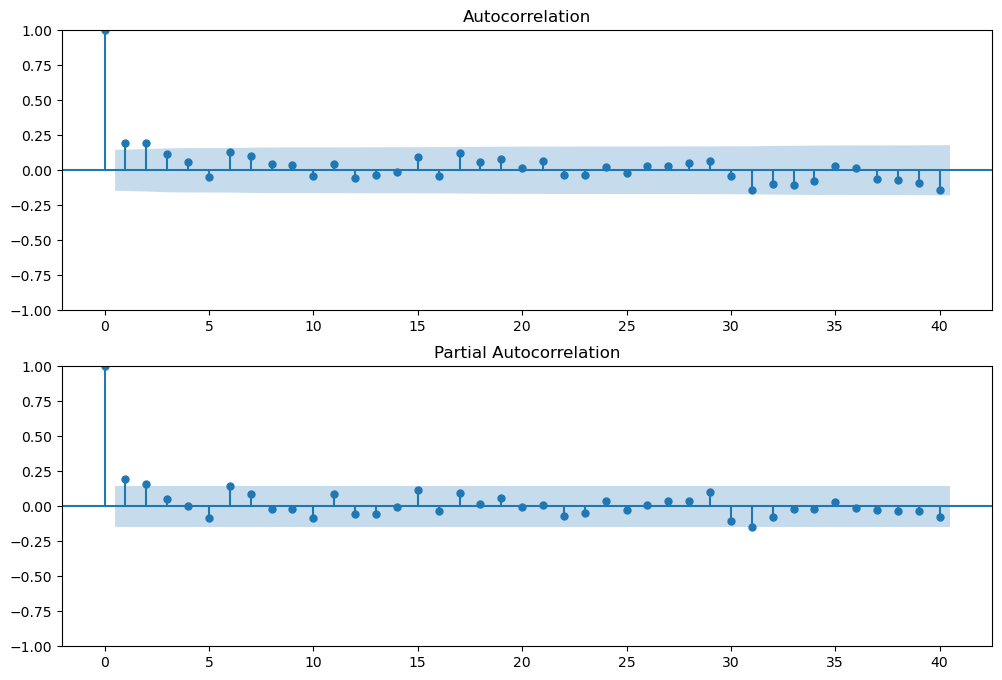

In [27]:
for i in spei.columns:
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(spei[i], lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(spei[i], lags=40, ax=ax2)
    plt.show()

In [28]:
spi

spi1  spi1.1  spi1.2  spi1.3  spi1.4
Date                                            
1986-01-01  0.97    1.50    0.84    0.84    1.11
1986-02-01  1.28    1.50    1.83    1.28    1.28
1986-03-01  1.50    1.50    1.50    1.28    1.28
1986-04-01  0.97    1.11    1.11    1.11    1.11
1986-05-01  0.43    0.73    0.84    0.84    0.84
...          ...     ...     ...     ...     ...
2000-08-01 -0.66   -0.12   -0.35   -0.82   -1.16
2000-09-01 -1.45   -1.35   -1.61   -1.62   -1.35
2000-10-01 -0.34   -0.17   -0.43   -0.43   -0.52
2000-11-01  0.52    0.52    0.34    0.43    0.52
2000-12-01  1.28    1.35    1.18    1.76    1.66

[180 rows x 5 columns]

In [29]:
# train_size = int(len(spi) * 0.9)
train_size = int(len(spi))-24
spi_train = spi[:train_size]
spi_test = spi[train_size:]

spei_train = spei[:train_size]
spei_test = spei[train_size:]

In [30]:
spi_train.index

DatetimeIndex(['1986-01-01', '1986-02-01', '1986-03-01', '1986-04-01',
               '1986-05-01', '1986-06-01', '1986-07-01', '1986-08-01',
               '1986-09-01', '1986-10-01',
               ...
               '1998-03-01', '1998-04-01', '1998-05-01', '1998-06-01',
               '1998-07-01', '1998-08-01', '1998-09-01', '1998-10-01',
               '1998-11-01', '1998-12-01'],
              dtype='datetime64[ns]', name='Date', length=156, freq=None)

In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [32]:
train_pred_lst = []
test_pred_lst = []

<h2>ARIMA</h2>

c:\Users\Abaychrish\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Prediction for spi1:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    0.876570 -0.615270  2.368409    0.97
1999-02-01    0.425821 -1.158301  2.009943    1.99
1999-03-01   -0.017695 -1.759964  1.724573    1.50
1999-04-01   -0.340872 -2.210962  1.529218    0.97
1999-05-01   -0.491323 -2.419447  1.436801    0.60
1999-06-01   -0.475118 -2.412834  1.462597    0.26
1999-07-01   -0.339955 -2.278663  1.598753   -0.36
1999-08-01   -0.151924 -2.104713  1.800866   -1.92
1999-09-01    0.026424 -1.949358  2.002207   -0.29
1999-10-01    0.151375 -1.843007  2.145757    2.37
1999-11-01    0.204467 -1.798020  2.206954    0.52
1999-12-01    0.190688 -1.812870  2.194247    0.97
2000-01-01    0.131064 -1.872819  2.134948    0.97
2000-02-01    0.053019 -1.953448  2.059486    1.28
2000-03-01   -0.018404 -2.028696  1.991888    1.50
2000-04-01   -0.066415 -2.079618  1.946788    0.97
2000-05-01   -0.084676 -2.099044  1.929692    1.85
2000-06-01   -0.076216 -2.090698  1.938266   -0.11
2000-07-01

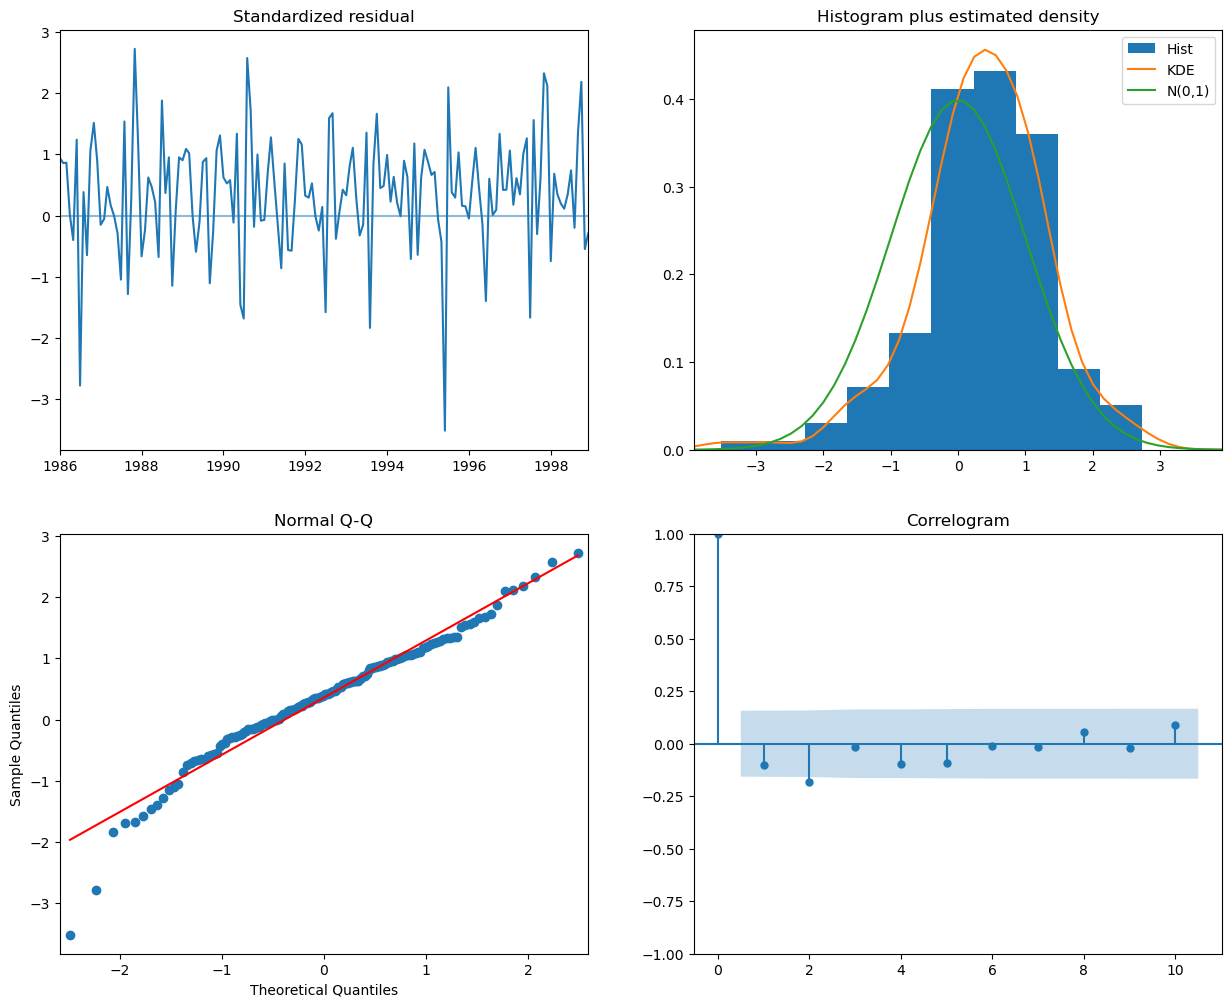



            Forecasted
Date                  
2001-01-01    0.876570
2001-02-01    0.425821
2001-03-01   -0.017695
2001-04-01   -0.340872
2001-05-01   -0.491323
2001-06-01   -0.475118
2001-07-01   -0.339955
2001-08-01   -0.151924
2001-09-01    0.026424
2001-10-01    0.151375
2001-11-01    0.204467
2001-12-01    0.190688


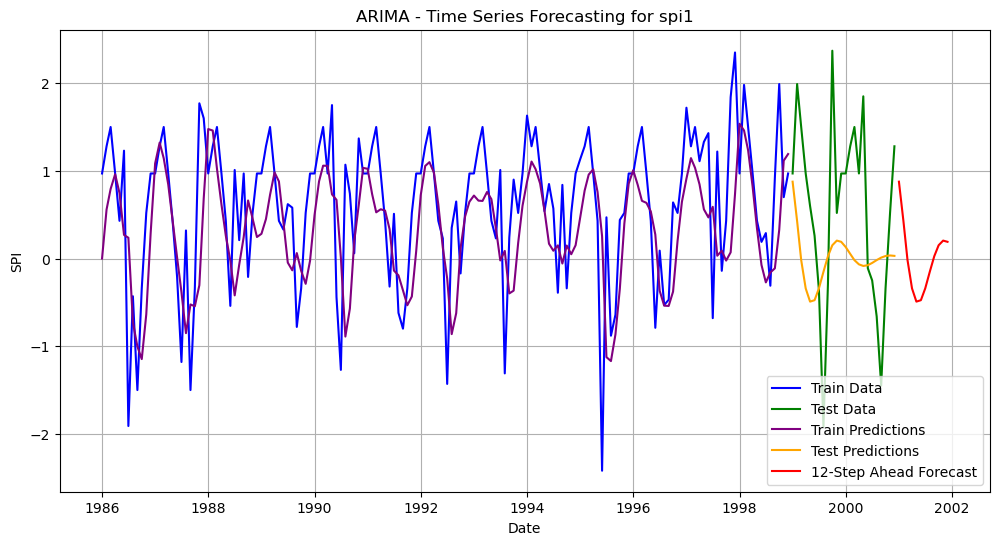

c:\Users\Abaychrish\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Prediction for spi1.1:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    0.797975 -0.649269  2.245218    1.50
1999-02-01    0.305152 -1.292178  1.902482    2.30
1999-03-01   -0.099499 -1.945519  1.746521    1.50
1999-04-01   -0.348079 -2.389711  1.693552    1.11
1999-05-01   -0.432192 -2.568140  1.703756    0.94
1999-06-01   -0.385499 -2.544287  1.773290    0.10
1999-07-01   -0.261923 -2.420876  1.897030   -0.17
1999-08-01   -0.116139 -2.281980  2.049702   -1.66
1999-09-01    0.009747 -2.172300  2.191795    0.15
1999-10-01    0.092149 -2.105870  2.290168    1.92
1999-11-01    0.125586 -2.081571  2.332742    0.52
1999-12-01    0.118072 -2.091808  2.327952    1.11
2000-01-01    0.084792 -2.125200  2.294784    1.50
2000-02-01    0.042123 -2.168266  2.252513    1.50
2000-03-01    0.003335 -2.208329  2.214999    1.50
2000-04-01   -0.023570 -2.236661  2.189522    1.11
2000-05-01   -0.036045 -2.250045  2.177955    1.96
2000-06-01   -0.035826 -2.250143  2.178491    0.30
2000-07-

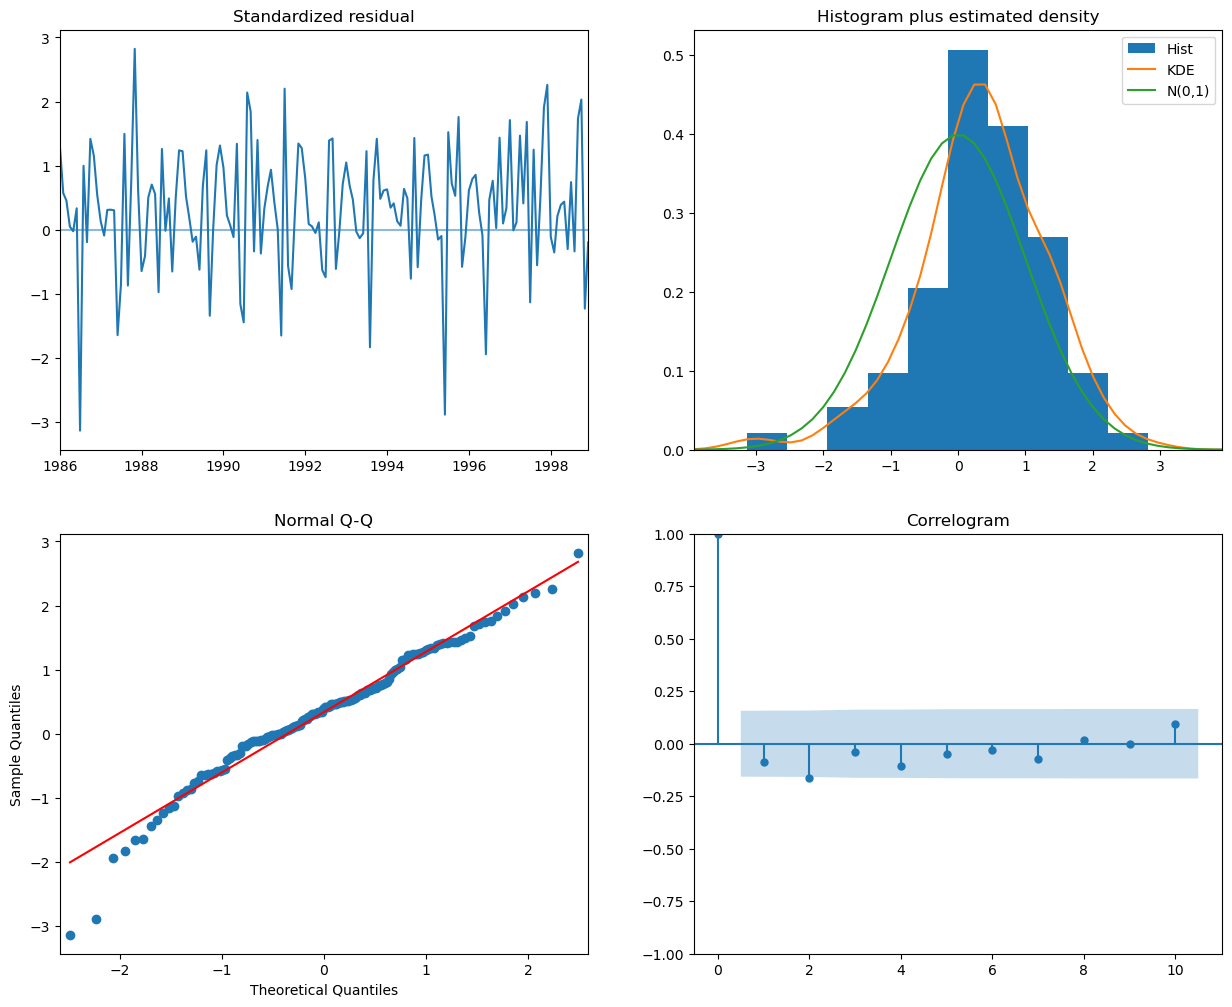



            Forecasted
Date                  
2001-01-01    0.797975
2001-02-01    0.305152
2001-03-01   -0.099499
2001-04-01   -0.348079
2001-05-01   -0.432192
2001-06-01   -0.385499
2001-07-01   -0.261923
2001-08-01   -0.116139
2001-09-01    0.009747
2001-10-01    0.092149
2001-11-01    0.125586
2001-12-01    0.118072


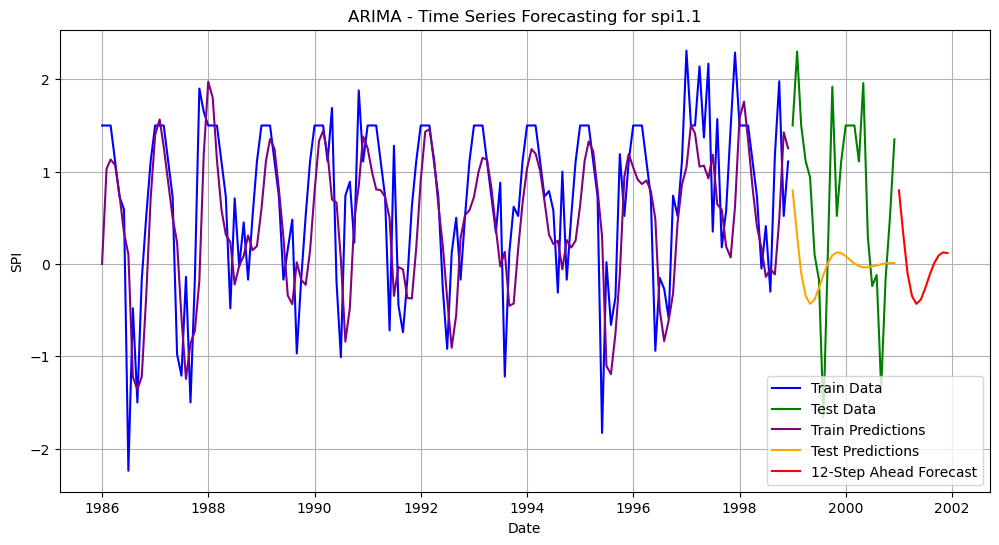

c:\Users\Abaychrish\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Prediction for spi1.2:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.133449 -0.298768  2.565666    0.84
1999-02-01    1.055443 -0.386129  2.497015    2.25
1999-03-01    0.892471 -0.553705  2.338646    1.50
1999-04-01    0.690639 -0.755998  2.137275    1.11
1999-05-01    0.505517 -0.941995  1.953028    0.98
1999-06-01    0.386866 -1.065740  1.839472   -0.35
1999-07-01    0.365293 -1.095901  1.826487   -1.09
1999-08-01    0.444402 -1.024588  1.913392   -2.16
1999-09-01    0.600441 -0.872177  2.073060    0.03
1999-10-01    0.789367 -0.683529  2.262263    1.27
1999-11-01    0.959243 -0.514576  2.433062    0.34
1999-12-01    1.064493 -0.413954  2.542939    1.11
2000-01-01    1.078097 -0.407787  2.563980    0.84
2000-02-01    0.998484 -0.493898  2.490866    1.83
2000-03-01    0.849371 -0.645862  2.344605    1.50
2000-04-01    0.672754 -0.822635  2.168143    1.11
2000-05-01    0.517110 -0.979232  2.013452    1.87
2000-06-01    0.424116 -1.076424  1.924656   -0.10
2000-07-

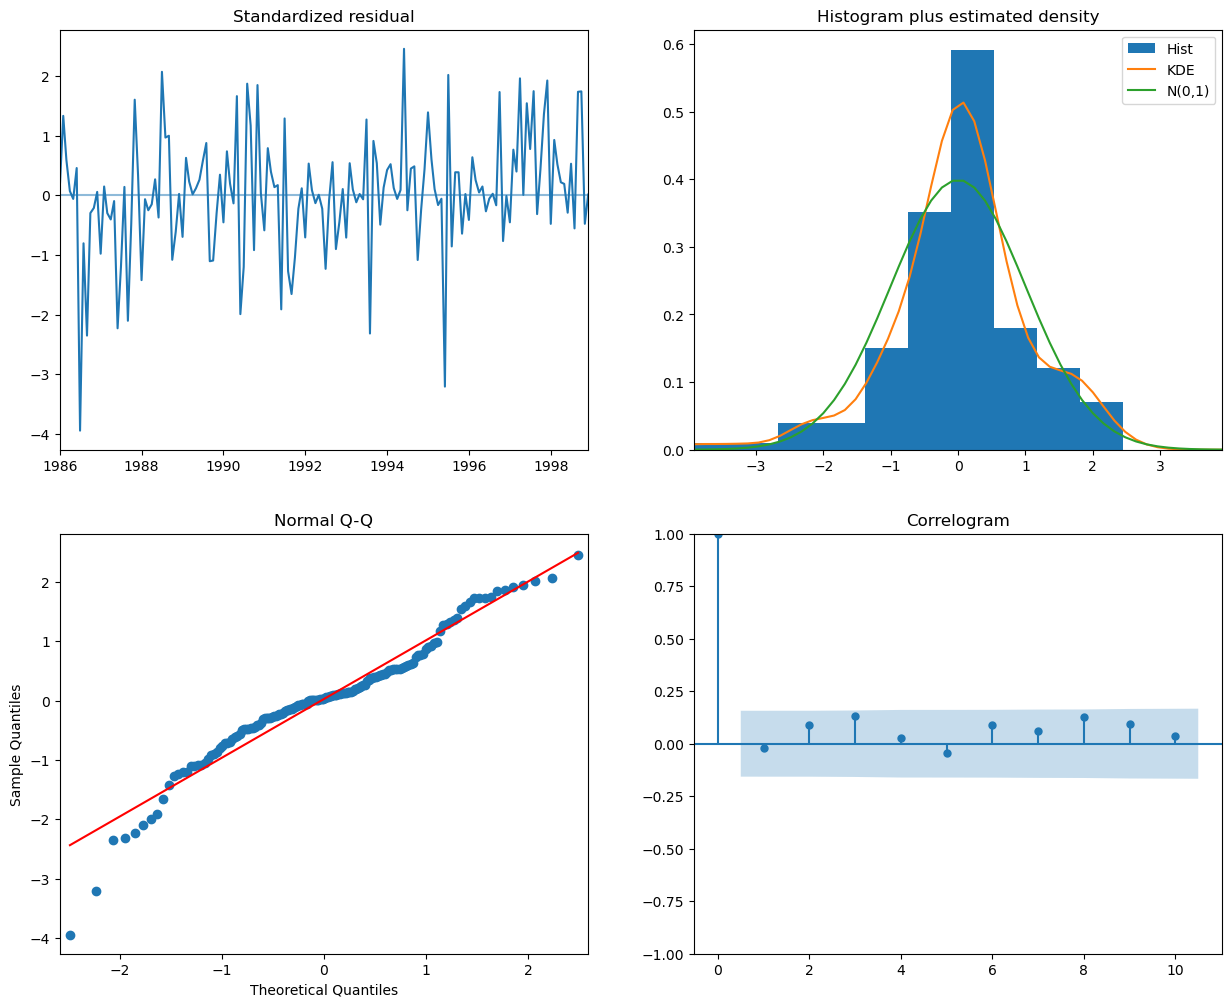



            Forecasted
Date                  
2001-01-01    1.133449
2001-02-01    1.055443
2001-03-01    0.892471
2001-04-01    0.690639
2001-05-01    0.505517
2001-06-01    0.386866
2001-07-01    0.365293
2001-08-01    0.444402
2001-09-01    0.600441
2001-10-01    0.789367
2001-11-01    0.959243
2001-12-01    1.064493


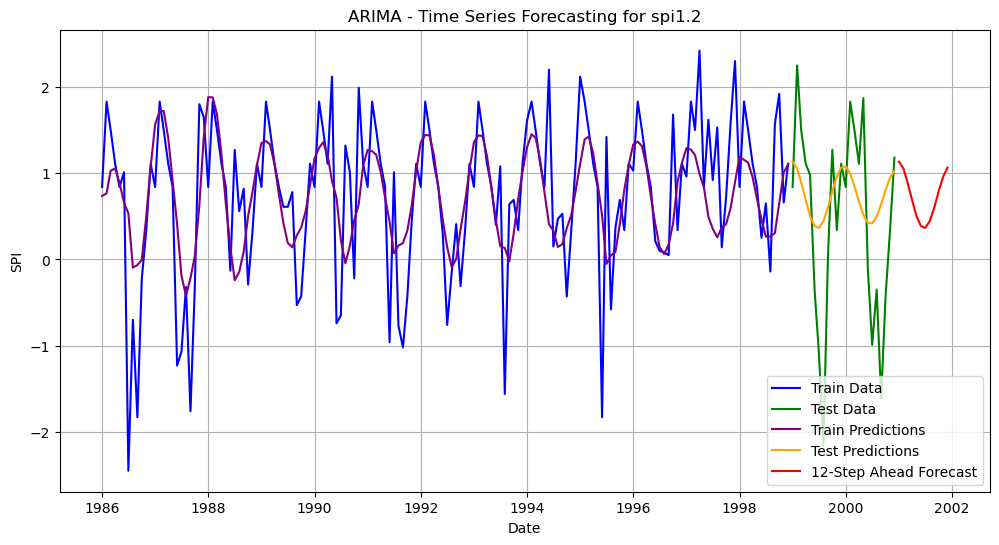

c:\Users\Abaychrish\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Prediction for spi1.3:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    0.840200 -0.797155  2.477555    0.84
1999-02-01    0.497699 -1.236662  2.232060    2.38
1999-03-01    0.196909 -1.724113  2.117932    1.28
1999-04-01   -0.000955 -2.052216  2.050307    1.11
1999-05-01   -0.095096 -2.199469  2.009277    1.21
1999-06-01   -0.113764 -2.229720  2.002192   -0.14
1999-07-01   -0.091270 -2.207631  2.025092   -0.68
1999-08-01   -0.055345 -2.172440  2.061751   -1.82
1999-09-01   -0.022928 -2.141799  2.095943   -0.42
1999-10-01   -0.001133 -2.121423  2.119158    2.14
1999-11-01    0.009579 -2.111343  2.130502    0.43
1999-12-01    0.012046 -2.109026  2.133118    1.28
2000-01-01    0.009898 -2.111182  2.130977    0.84
2000-02-01    0.006141 -2.114945  2.127227    1.28
2000-03-01    0.002653 -2.118452  2.123759    1.28
2000-04-01    0.000257 -2.120865  2.121379    1.20
2000-05-01   -0.000957 -2.122087  2.120172    1.94
2000-06-01   -0.001272 -2.122404  2.119859    0.07
2000-07-

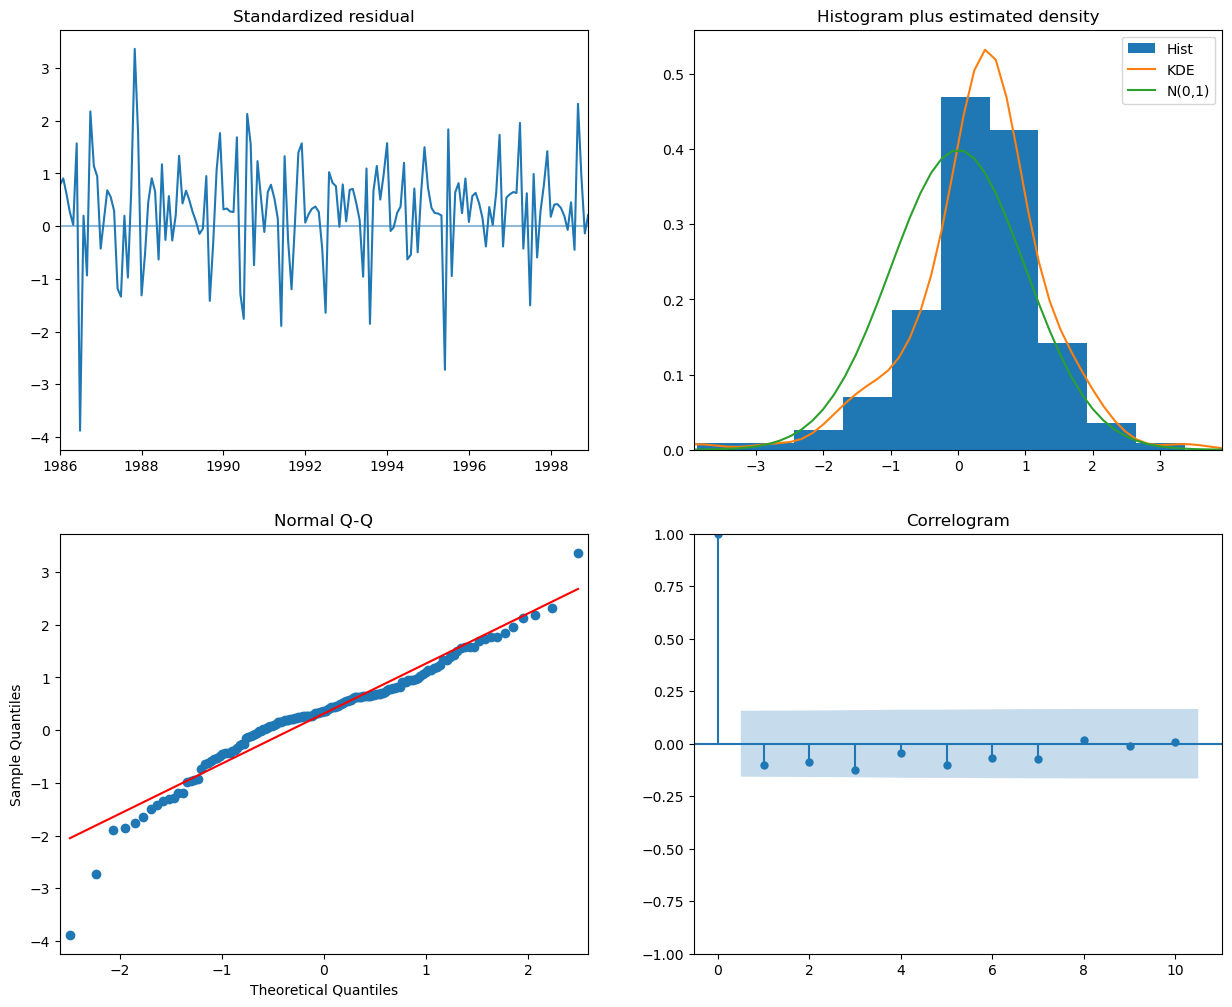



            Forecasted
Date                  
2001-01-01    0.840200
2001-02-01    0.497699
2001-03-01    0.196909
2001-04-01   -0.000955
2001-05-01   -0.095096
2001-06-01   -0.113764
2001-07-01   -0.091270
2001-08-01   -0.055345
2001-09-01   -0.022928
2001-10-01   -0.001133
2001-11-01    0.009579
2001-12-01    0.012046


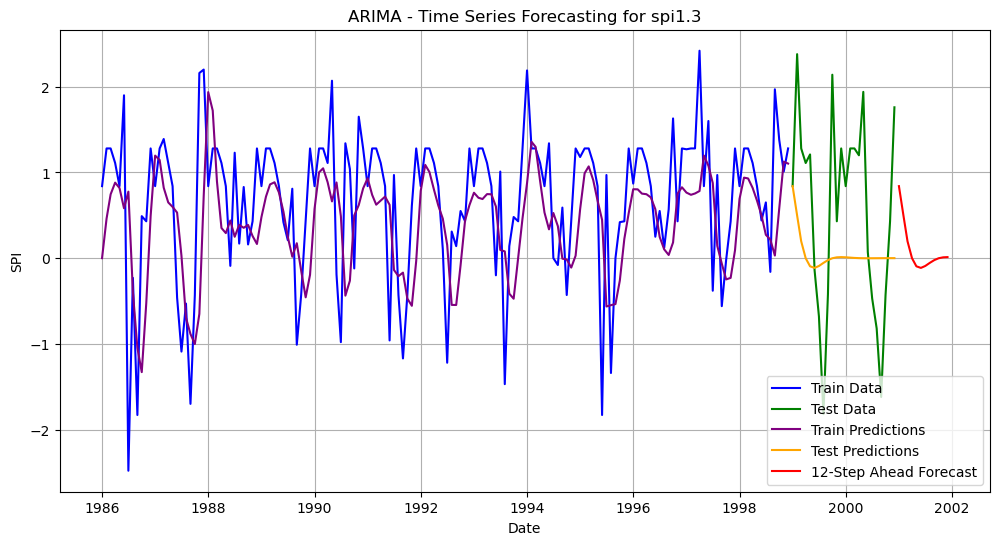

c:\Users\Abaychrish\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Prediction for spi1.4:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.192702 -0.198119  2.583523    1.11
1999-02-01    1.207845 -0.184834  2.600524    2.35
1999-03-01    1.086425 -0.307188  2.480037    1.28
1999-04-01    0.861380 -0.532330  2.255089    1.11
1999-05-01    0.593392 -0.800497  1.987280    1.15
1999-06-01    0.354523 -1.040457  1.749503   -0.02
1999-07-01    0.208840 -1.188051  1.605731   -0.95
1999-08-01    0.195231 -1.203477  1.593939   -1.77
1999-09-01    0.317026 -1.082587  1.716640   -0.41
1999-10-01    0.541188 -0.858515  1.940892    1.23
1999-11-01    0.807277 -0.592609  2.207163    0.52
1999-12-01    1.043742 -0.357225  2.444709    1.28
2000-01-01    1.187163 -0.215683  2.590010    1.11
2000-02-01    1.199259 -0.205364  2.603882    1.28
2000-03-01    1.077106 -0.328396  2.482607    1.28
2000-04-01    0.853831 -0.551754  2.259417    1.48
2000-05-01    0.589636 -0.816134  1.995406    1.73
2000-06-01    0.355559 -1.051282  1.762400    0.17
2000-07-

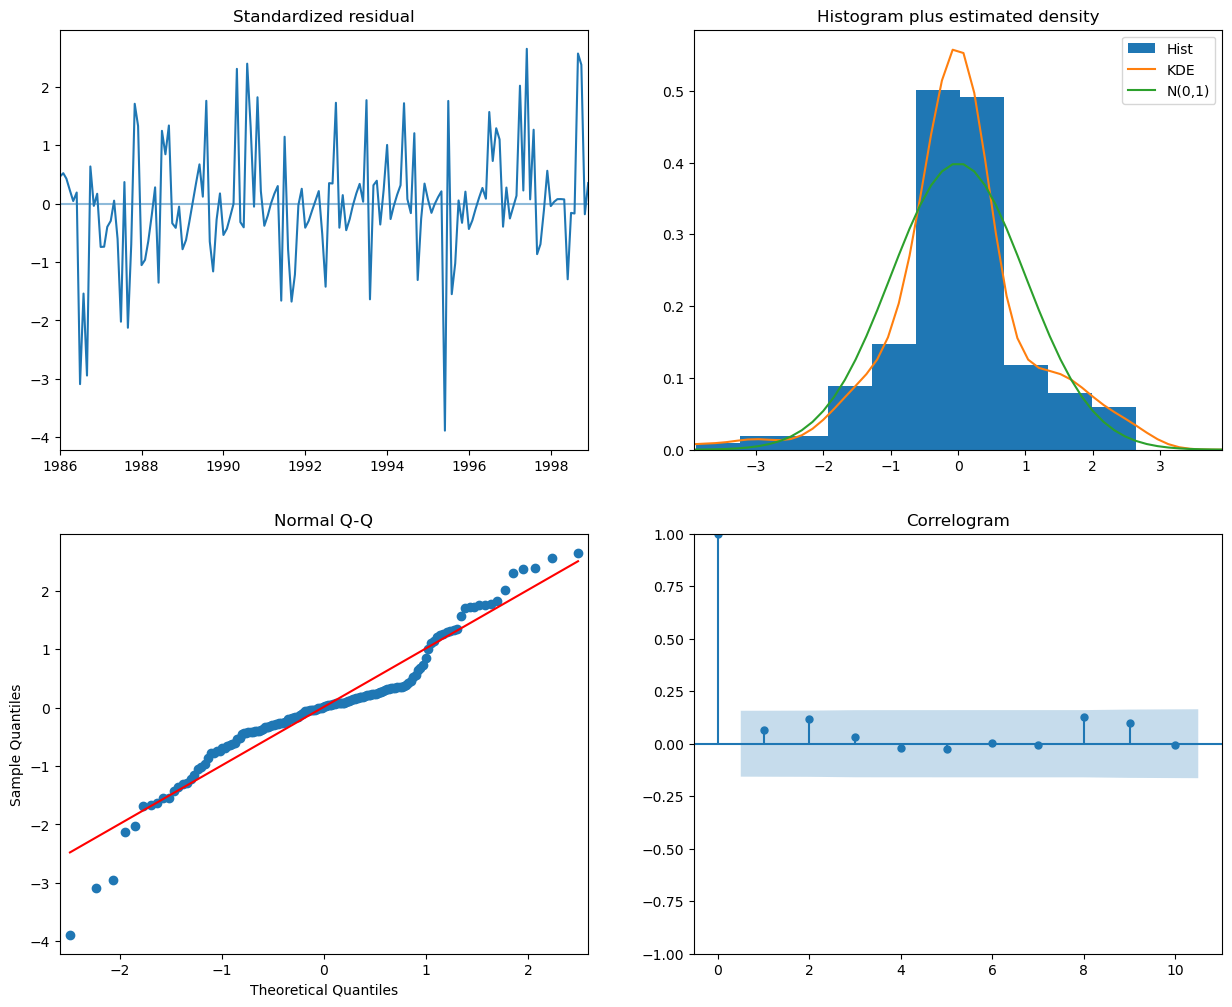



            Forecasted
Date                  
2001-01-01    1.192702
2001-02-01    1.207845
2001-03-01    1.086425
2001-04-01    0.861380
2001-05-01    0.593392
2001-06-01    0.354523
2001-07-01    0.208840
2001-08-01    0.195231
2001-09-01    0.317026
2001-10-01    0.541188
2001-11-01    0.807277
2001-12-01    1.043742


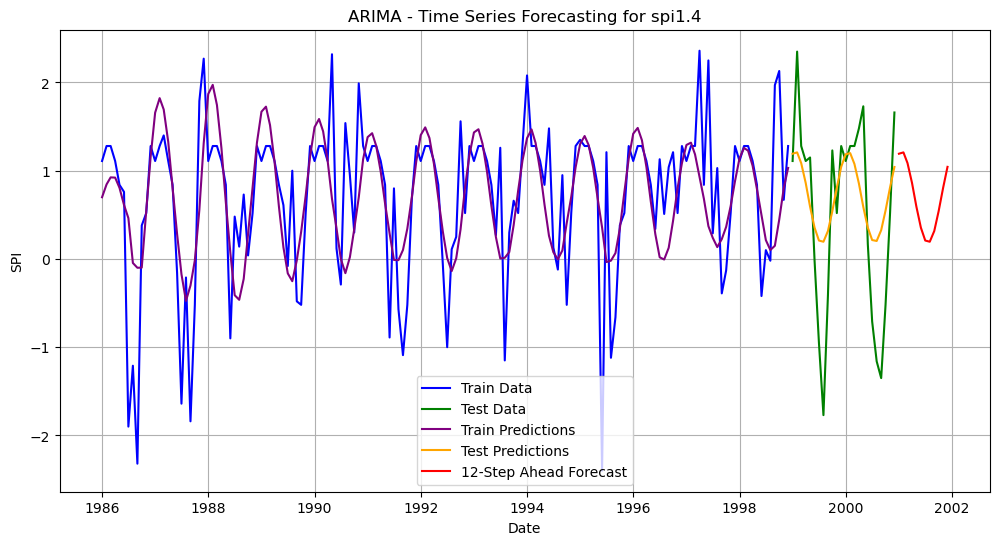

In [33]:
for spi_column in spi.columns:
    model = auto_arima(spi_train[spi_column], seasonal=False, 
                       suppress_warnings=True, trace=False, m=12)
    model.fit(spi_train[spi_column])
    train_predictions, _ = model.predict_in_sample(return_conf_int=True)
    train_predictions_df = pd.DataFrame({'Date': spi_train.index, 'Predicted': train_predictions})
    train_predictions_df.set_index('Date', inplace=True)
    train_pred_lst.append(train_predictions_df)

    pred, conf_int = model.predict(n_periods=24, return_conf_int=True)
    pred_df = pd.DataFrame({'Prediction': pred,
                                'Lower_CI': conf_int[:, 0],
                                'Upper_CI': conf_int[:, 1],
                                'Actual': spi_test[spi_column]})

    test_pred_lst.append(pred_df)
    print(f"Prediction for {spi_column}:")
    actual = spi_test[spi_column]
    predicted = pred_df['Prediction']
    mse = mean_squared_error(actual, predicted)
    rmse=np.sqrt(mse)
    y_range = np.max(actual) - np.min(actual)
    rmse_percentage = (rmse / y_range) * 100

    print(pred_df)
    print(f'RMSE for {spi_column} = {rmse}')
    print(f'RMSE percentage for {spi_column} = {rmse_percentage}')
    print(f'AIC for {spi_column} = {model.aic()}')
    print(f'BIC for {spi_column} = {model.bic()}')
    print('\nPlot Diagnostics:')
    model.plot_diagnostics(figsize=(15,12))
    plt.show() 
    print('\n')
    forecast_steps = 12
    forecast, conf_int_forecast = model.predict(n_periods=forecast_steps, 
                                                return_conf_int=True)
    future_dates = pd.date_range(pred_df.index.max() + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted': forecast})
    forecast_df.set_index('Date', inplace=True)   
    print(forecast_df)
    plt.figure(figsize=(12, 6))
    plt.plot(spi_train.index, spi_train[spi_column], label='Train Data', color='blue')
    plt.plot(spi_test.index, spi_test[spi_column], label='Test Data', color='green')
    plt.plot(train_predictions_df.index, train_predictions_df['Predicted'], label='Train Predictions', color='purple')
    plt.plot(pred_df.index, pred_df['Prediction'], label='Test Predictions', color='orange')
    plt.plot(forecast_df.index, forecast_df['Forecasted'], label='12-Step Ahead Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('SPI')
    plt.legend()
    plt.title(f'ARIMA - Time Series Forecasting for {spi_column}')
    plt.grid(True)
    plt.show()

<h2>sARIMA</h2>

Prediction for spi1:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.177651 -0.098901  2.454203    0.97
1999-02-01    0.974113 -0.319874  2.268099    1.99
1999-03-01    0.876984 -0.427800  2.181768    1.50
1999-04-01    0.520567 -0.786699  1.827833    0.97
1999-05-01    0.298798 -1.008677  1.606273    0.60
1999-06-01   -0.029579 -1.342119  1.282960    0.26
1999-07-01    0.094445 -1.229157  1.418046   -0.36
1999-08-01    0.235067 -1.100331  1.570466   -1.92
1999-09-01    0.343996 -0.998234  1.686225   -0.29
1999-10-01    0.590471 -0.753062  1.934004    2.37
1999-11-01    0.980169 -0.363670  2.324008    0.52
1999-12-01    1.139879 -0.207968  2.487726    0.97
2000-01-01    1.035353 -0.314560  2.385266    0.97
2000-02-01    1.003002 -0.353721  2.359724    1.28
2000-03-01    0.891418 -0.468926  2.251761    1.50
2000-04-01    0.586223 -0.774646  1.947093    0.97
2000-05-01    0.388696 -0.972511  1.749903    1.85
2000-06-01    0.144796 -1.219156  1.508748   -0.11
2000-07-01

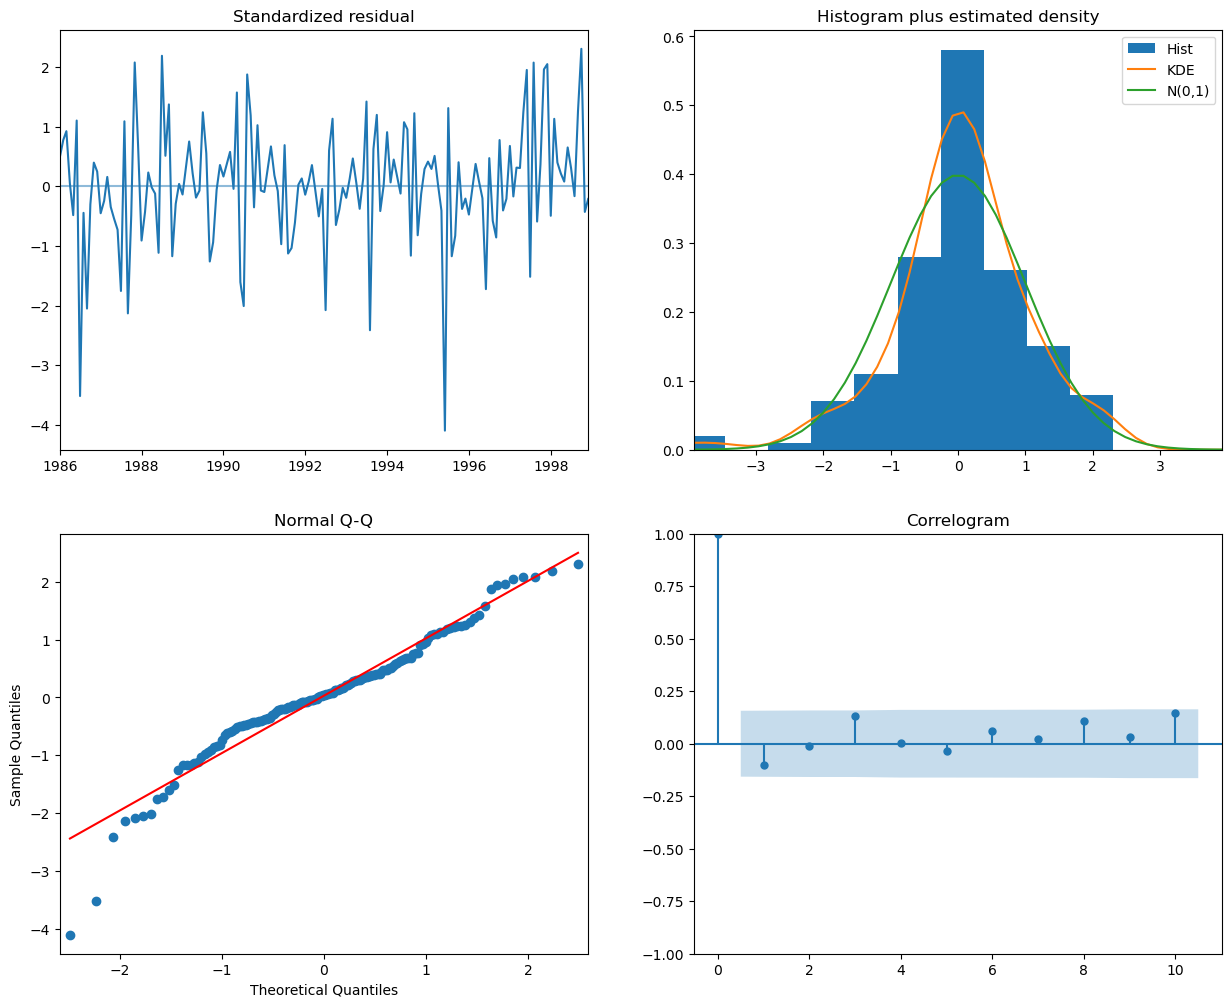



            Forecasted
Date                  
2001-01-01    1.177651
2001-02-01    0.974113
2001-03-01    0.876984
2001-04-01    0.520567
2001-05-01    0.298798
2001-06-01   -0.029579
2001-07-01    0.094445
2001-08-01    0.235067
2001-09-01    0.343996
2001-10-01    0.590471
2001-11-01    0.980169
2001-12-01    1.139879


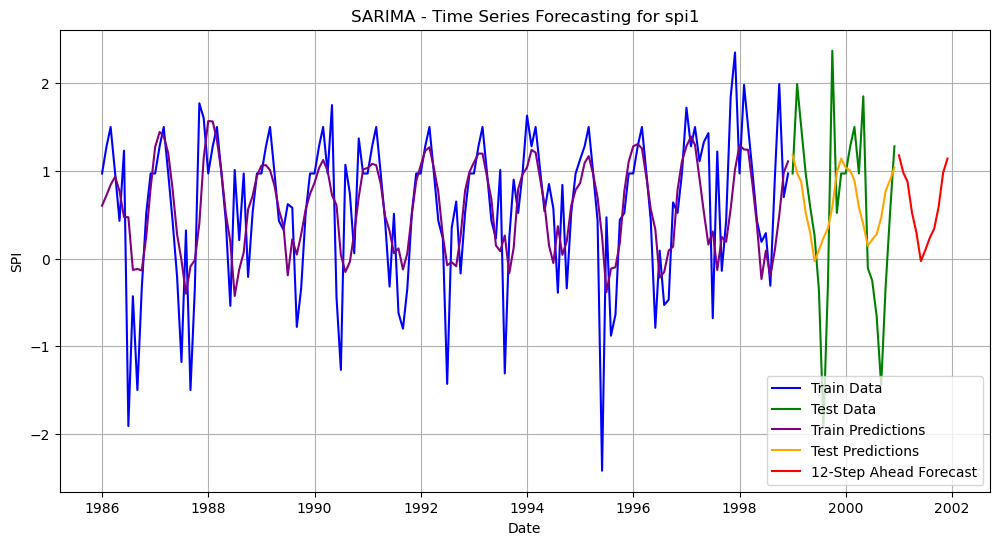

Prediction for spi1.1:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.567023  0.366657  2.767388    1.50
1999-02-01    1.396481  0.182989  2.609974    2.30
1999-03-01    1.392149  0.153777  2.630521    1.50
1999-04-01    1.294685  0.054373  2.534996    1.11
1999-05-01    0.889277 -0.352283  2.130837    0.94
1999-06-01    0.187015 -1.054722  1.428753    0.10
1999-07-01    0.249527 -0.992282  1.491337   -0.17
1999-08-01    0.199692 -1.042131  1.441515   -1.66
1999-09-01    0.095204 -1.146624  1.337031    0.15
1999-10-01    0.625598 -0.616230  1.867426    1.92
1999-11-01    0.793669 -0.448160  2.035497    0.52
1999-12-01    1.330754  0.088926  2.572583    1.11
2000-01-01    1.567248  0.325120  2.809376    1.50
2000-02-01    1.392072  0.149938  2.634207    1.50
2000-03-01    1.391975  0.149828  2.634122    1.50
2000-04-01    1.279947  0.037799  2.522096    1.11
2000-05-01    0.876363 -0.365786  2.118512    1.96
2000-06-01    0.271172 -0.970977  1.513322    0.30
2000-07-

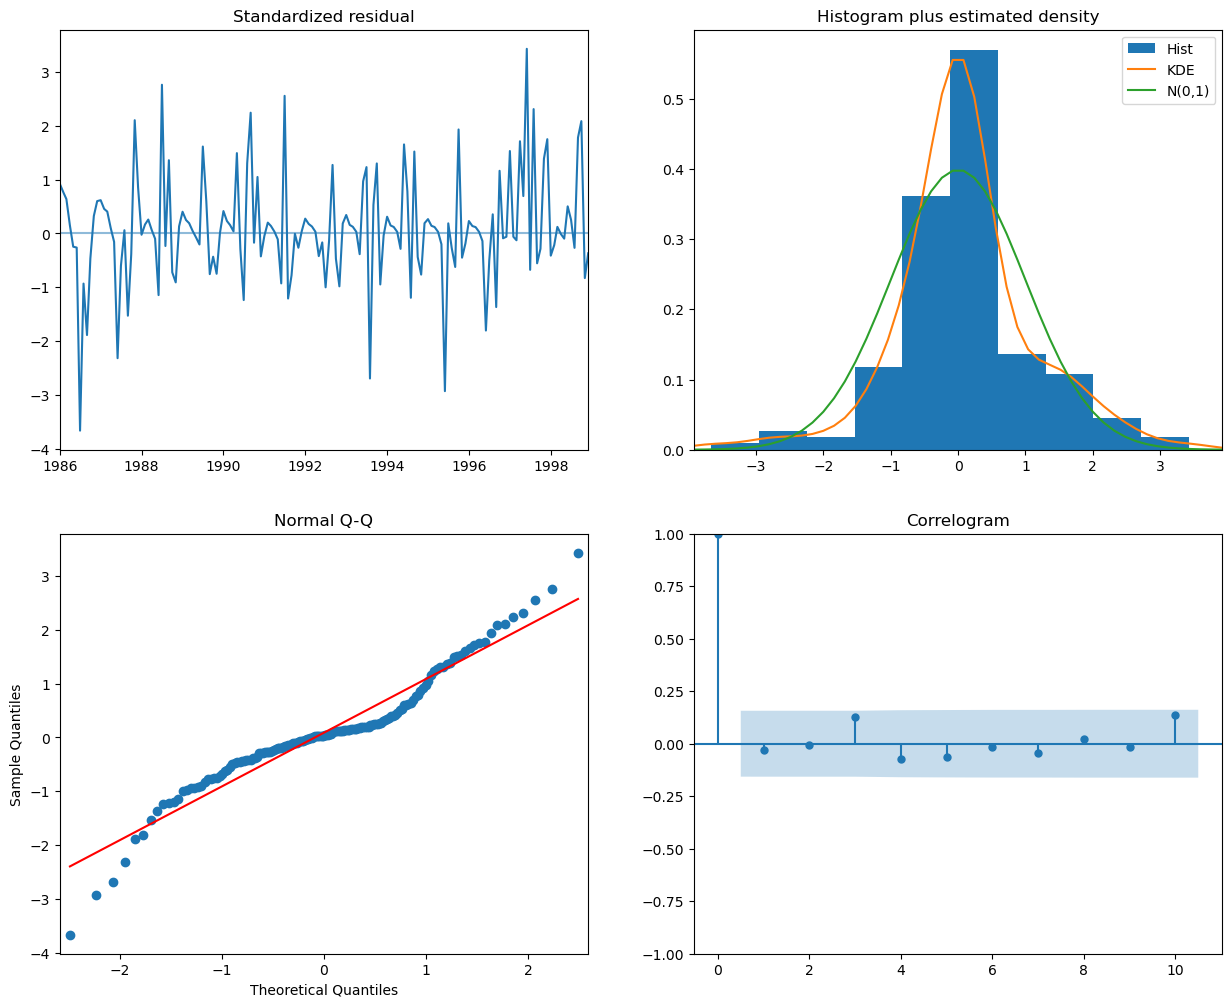



            Forecasted
Date                  
2001-01-01    1.567023
2001-02-01    1.396481
2001-03-01    1.392149
2001-04-01    1.294685
2001-05-01    0.889277
2001-06-01    0.187015
2001-07-01    0.249527
2001-08-01    0.199692
2001-09-01    0.095204
2001-10-01    0.625598
2001-11-01    0.793669
2001-12-01    1.330754


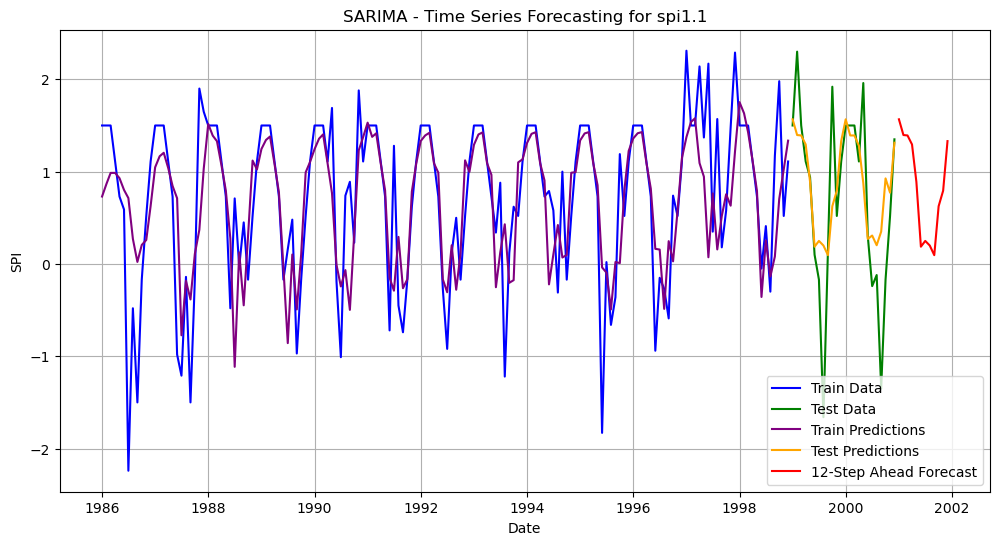

Prediction for spi1.2:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.262951 -0.093675  2.619577    0.84
1999-02-01    1.413104  0.054829  2.771379    2.25
1999-03-01    0.980794 -0.399001  2.360590    1.50
1999-04-01    1.118077 -0.274979  2.511134    1.11
1999-05-01    0.928081 -0.464984  2.321146    0.98
1999-06-01    0.797152 -0.605781  2.200084   -0.35
1999-07-01    0.846932 -0.565574  2.259438   -1.09
1999-08-01    0.360942 -1.051863  1.773746   -2.16
1999-09-01    0.300842 -1.115992  1.717677    0.03
1999-10-01    0.712631 -0.710462  2.135723    1.27
1999-11-01    0.741521 -0.682349  2.165391    0.34
1999-12-01    1.425400  0.000144  2.850657    1.11
2000-01-01    1.177451 -0.249760  2.604661    0.84
2000-02-01    1.602949  0.175053  3.030845    1.83
2000-03-01    1.206683 -0.222633  2.635998    1.50
2000-04-01    1.140501 -0.292440  2.573442    1.11
2000-05-01    0.788560 -0.645284  2.222404    1.87
2000-06-01    0.605085 -0.829134  2.039305   -0.10
2000-07-

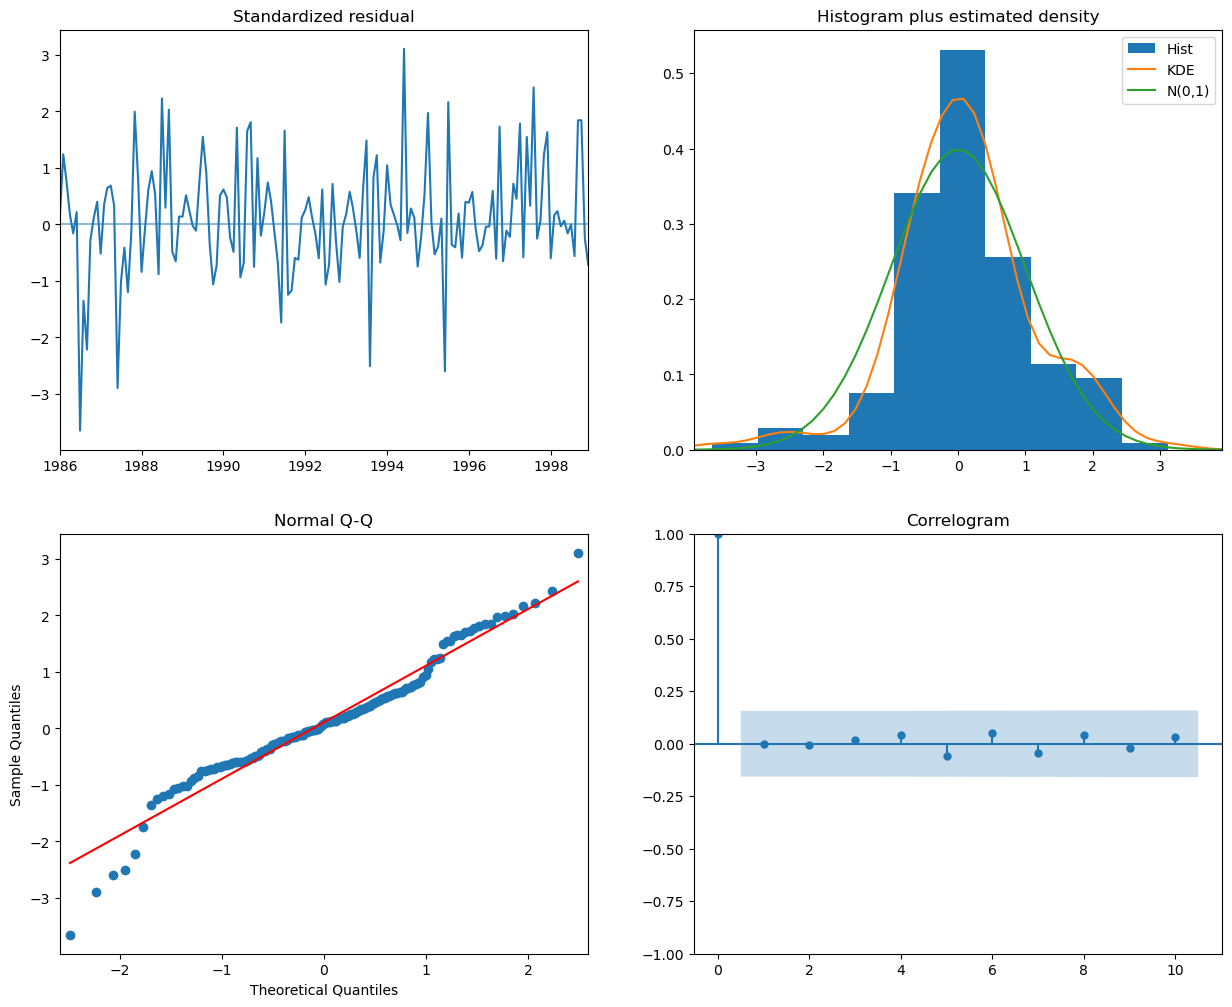



            Forecasted
Date                  
2001-01-01    1.262951
2001-02-01    1.413104
2001-03-01    0.980794
2001-04-01    1.118077
2001-05-01    0.928081
2001-06-01    0.797152
2001-07-01    0.846932
2001-08-01    0.360942
2001-09-01    0.300842
2001-10-01    0.712631
2001-11-01    0.741521
2001-12-01    1.425400


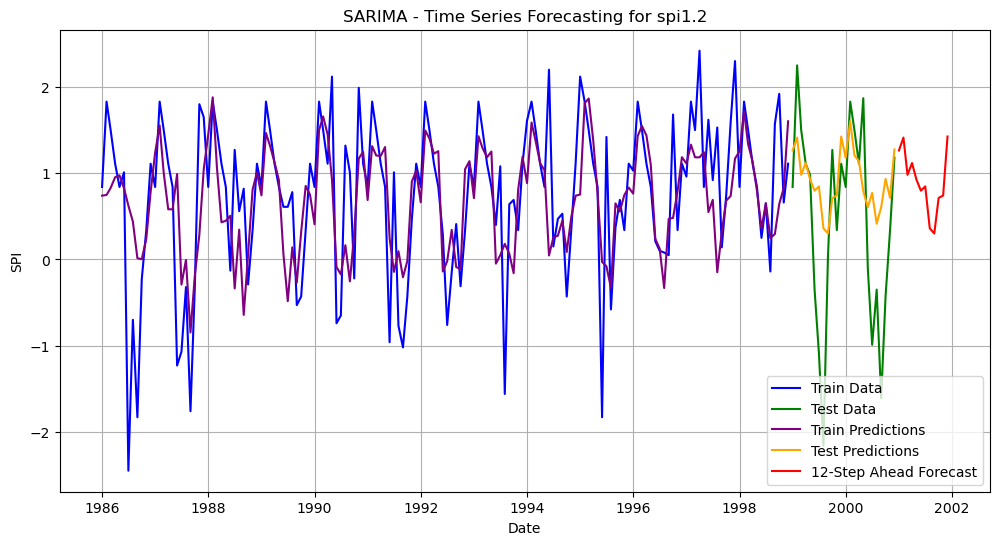

Prediction for spi1.3:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.091276 -0.267921  2.450474    0.84
1999-02-01    1.176350 -0.182848  2.535547    2.38
1999-03-01    1.176599 -0.182599  2.535796    1.28
1999-04-01    1.333481 -0.025716  2.692679    1.11
1999-05-01    0.826529 -0.532669  2.185726    1.21
1999-06-01    0.377077 -0.982121  1.736274   -0.14
1999-07-01    0.326299 -1.032899  1.685496   -0.68
1999-08-01    0.097576 -1.261621  1.456774   -1.82
1999-09-01    0.198669 -1.160529  1.557866   -0.42
1999-10-01    0.535844 -0.823353  1.895042    2.14
1999-11-01    0.507537 -0.851660  1.866735    0.43
1999-12-01    1.178434 -0.180764  2.537631    1.28
2000-01-01    1.018691 -0.340811  2.378194    0.84
2000-02-01    1.174228 -0.185274  2.533731    1.28
2000-03-01    1.174374 -0.185129  2.533876    1.28
2000-04-01    1.311880 -0.047623  2.671382    1.20
2000-05-01    0.820443 -0.539060  2.179945    1.94
2000-06-01    0.486279 -0.873223  1.845782    0.07
2000-07-

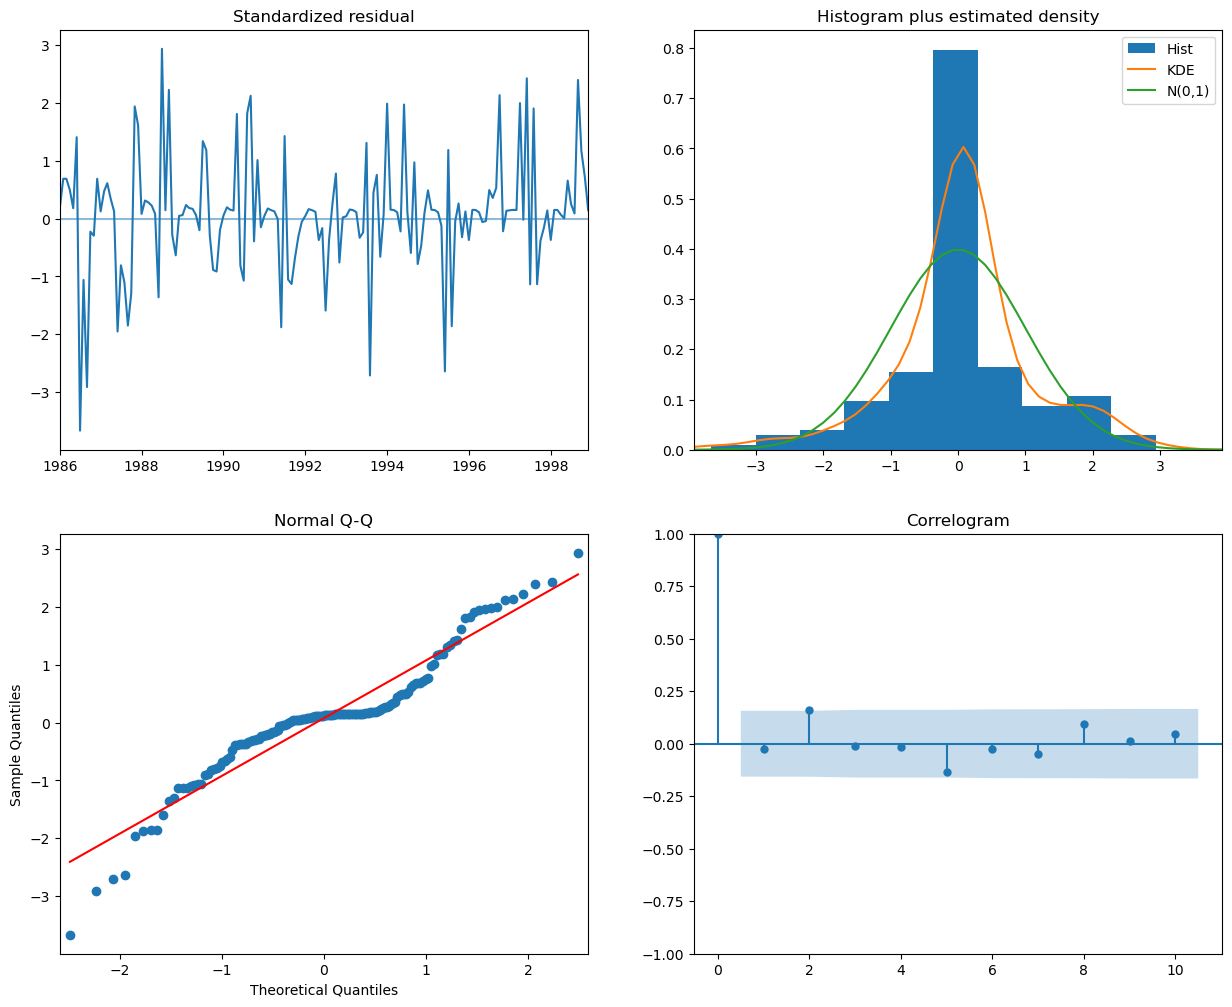



            Forecasted
Date                  
2001-01-01    1.091276
2001-02-01    1.176350
2001-03-01    1.176599
2001-04-01    1.333481
2001-05-01    0.826529
2001-06-01    0.377077
2001-07-01    0.326299
2001-08-01    0.097576
2001-09-01    0.198669
2001-10-01    0.535844
2001-11-01    0.507537
2001-12-01    1.178434


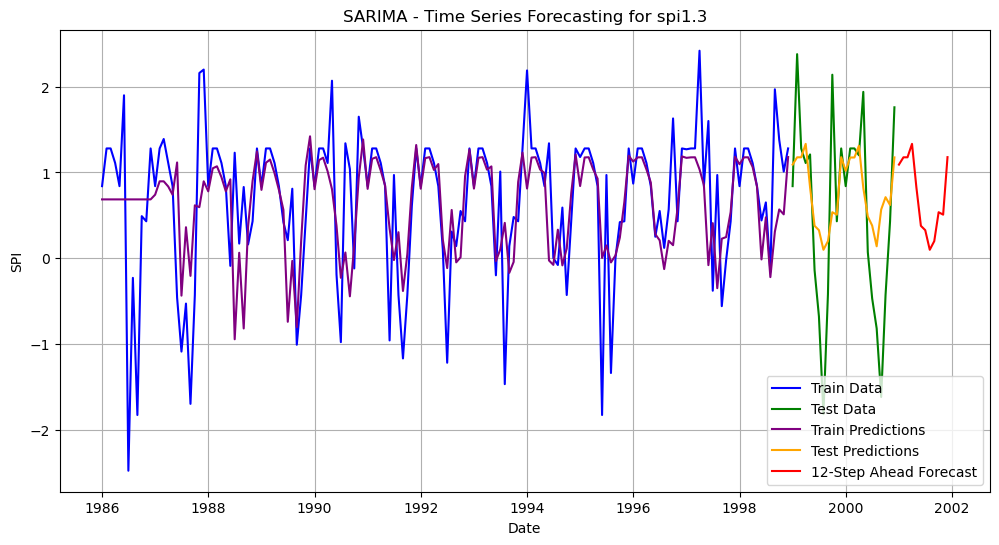

Prediction for spi1.4:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.192702 -0.198119  2.583523    1.11
1999-02-01    1.207845 -0.184834  2.600524    2.35
1999-03-01    1.086425 -0.307188  2.480037    1.28
1999-04-01    0.861380 -0.532330  2.255089    1.11
1999-05-01    0.593392 -0.800497  1.987280    1.15
1999-06-01    0.354523 -1.040457  1.749503   -0.02
1999-07-01    0.208840 -1.188051  1.605731   -0.95
1999-08-01    0.195231 -1.203477  1.593939   -1.77
1999-09-01    0.317026 -1.082587  1.716640   -0.41
1999-10-01    0.541188 -0.858515  1.940892    1.23
1999-11-01    0.807277 -0.592609  2.207163    0.52
1999-12-01    1.043742 -0.357225  2.444709    1.28
2000-01-01    1.187163 -0.215683  2.590010    1.11
2000-02-01    1.199259 -0.205364  2.603882    1.28
2000-03-01    1.077106 -0.328396  2.482607    1.28
2000-04-01    0.853831 -0.551754  2.259417    1.48
2000-05-01    0.589636 -0.816134  1.995406    1.73
2000-06-01    0.355559 -1.051282  1.762400    0.17
2000-07-

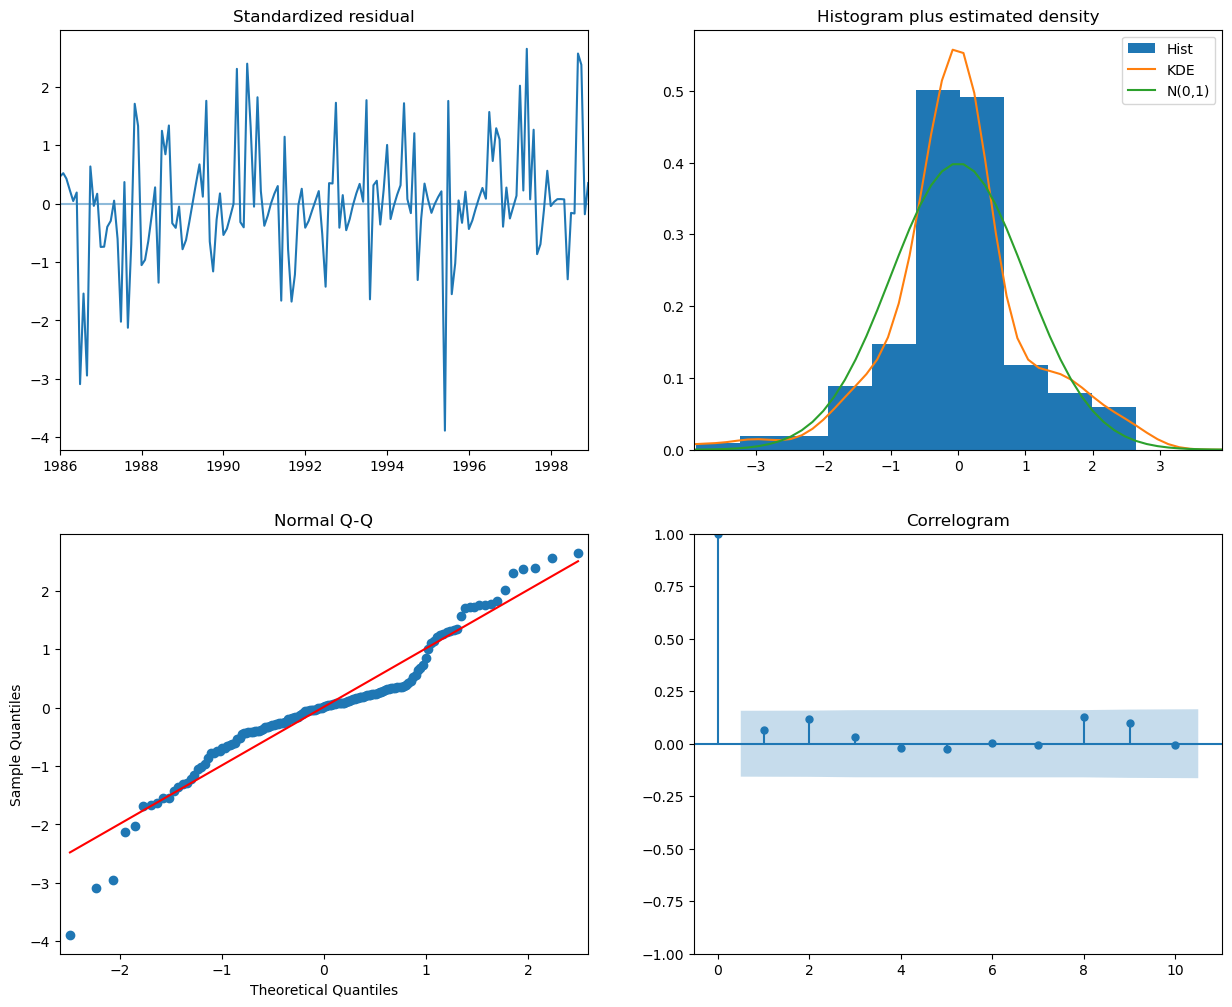



            Forecasted
Date                  
2001-01-01    1.192702
2001-02-01    1.207845
2001-03-01    1.086425
2001-04-01    0.861380
2001-05-01    0.593392
2001-06-01    0.354523
2001-07-01    0.208840
2001-08-01    0.195231
2001-09-01    0.317026
2001-10-01    0.541188
2001-11-01    0.807277
2001-12-01    1.043742


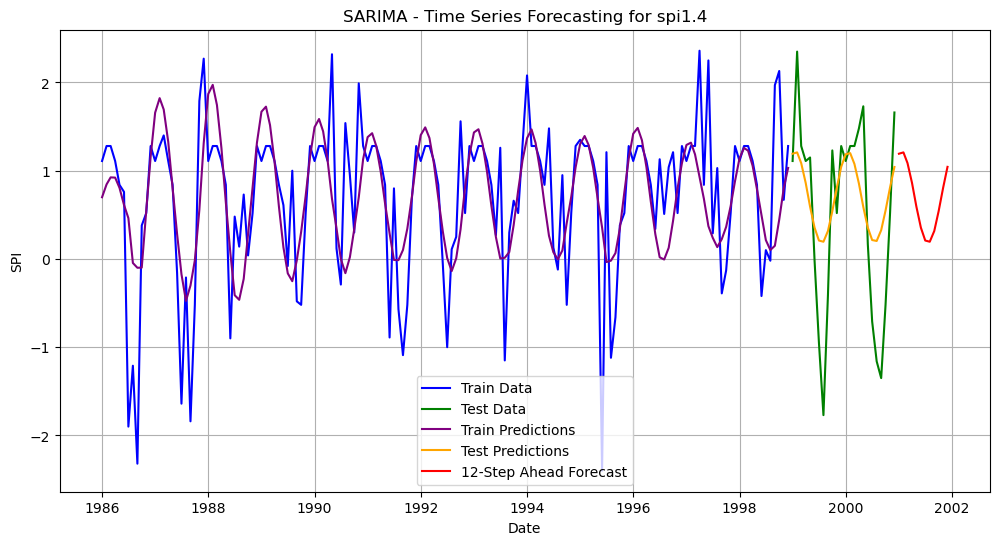

In [34]:
for spi_column in spi.columns:
    model = auto_arima(spi_train[spi_column], seasonal=True, 
                       suppress_warnings=True, trace=False, m=12)
    model.fit(spi_train[spi_column])
    train_predictions, _ = model.predict_in_sample(return_conf_int=True)
    train_predictions_df = pd.DataFrame({'Date': spi_train.index, 'Predicted': train_predictions})
    train_predictions_df.set_index('Date', inplace=True)
    train_pred_lst.append(train_predictions_df)

    pred, conf_int = model.predict(n_periods=24, return_conf_int=True)
    pred_df = pd.DataFrame({'Prediction': pred,
                                'Lower_CI': conf_int[:, 0],
                                'Upper_CI': conf_int[:, 1],
                                'Actual': spi_test[spi_column]})

    test_pred_lst.append(pred_df)
    print(f"Prediction for {spi_column}:")
    actual = spi_test[spi_column]
    predicted = pred_df['Prediction']
    mse = mean_squared_error(actual, predicted)
    rmse=np.sqrt(mse)
    y_range = np.max(actual) - np.min(actual)
    rmse_percentage = (rmse / y_range) * 100

    print(pred_df)
    print(f'RMSE for {spi_column} = {rmse}')
    print(f'RMSE percentage for {spi_column} = {rmse_percentage}')
    print(f'AIC for {spi_column} = {model.aic()}')
    print(f'BIC for {spi_column} = {model.bic()}')
    print('\nPlot Diagnostics:')
    model.plot_diagnostics(figsize=(15,12))
    plt.show() 
    print('\n')
    forecast_steps = 12
    forecast, conf_int_forecast = model.predict(n_periods=forecast_steps, 
                                                return_conf_int=True)
    future_dates = pd.date_range(pred_df.index.max() + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted': forecast})
    forecast_df.set_index('Date', inplace=True)   
    print(forecast_df)
    plt.figure(figsize=(12, 6))
    plt.plot(spi_train.index, spi_train[spi_column], label='Train Data', color='blue')
    plt.plot(spi_test.index, spi_test[spi_column], label='Test Data', color='green')
    plt.plot(train_predictions_df.index, train_predictions_df['Predicted'], label='Train Predictions', color='purple')
    plt.plot(pred_df.index, pred_df['Prediction'], label='Test Predictions', color='orange')
    plt.plot(forecast_df.index, forecast_df['Forecasted'], label='12-Step Ahead Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('SPI')
    plt.legend()
    plt.title(f'SARIMA - Time Series Forecasting for {spi_column}')
    plt.grid(True)
    plt.show()

<h2>SARIMAX</h2>

Prediction for spi1:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.177651 -0.098901  2.454203    0.97
1999-02-01    0.974113 -0.319874  2.268099    1.99
1999-03-01    0.876984 -0.427800  2.181768    1.50
1999-04-01    0.520567 -0.786699  1.827833    0.97
1999-05-01    0.298798 -1.008677  1.606273    0.60
1999-06-01   -0.029579 -1.342119  1.282960    0.26
1999-07-01    0.094445 -1.229157  1.418046   -0.36
1999-08-01    0.235067 -1.100331  1.570466   -1.92
1999-09-01    0.343996 -0.998234  1.686225   -0.29
1999-10-01    0.590471 -0.753062  1.934004    2.37
1999-11-01    0.980169 -0.363670  2.324008    0.52
1999-12-01    1.139879 -0.207968  2.487726    0.97
2000-01-01    1.035353 -0.314560  2.385266    0.97
2000-02-01    1.003002 -0.353721  2.359724    1.28
2000-03-01    0.891418 -0.468926  2.251761    1.50
2000-04-01    0.586223 -0.774646  1.947093    0.97
2000-05-01    0.388696 -0.972511  1.749903    1.85
2000-06-01    0.144796 -1.219156  1.508748   -0.11
2000-07-01

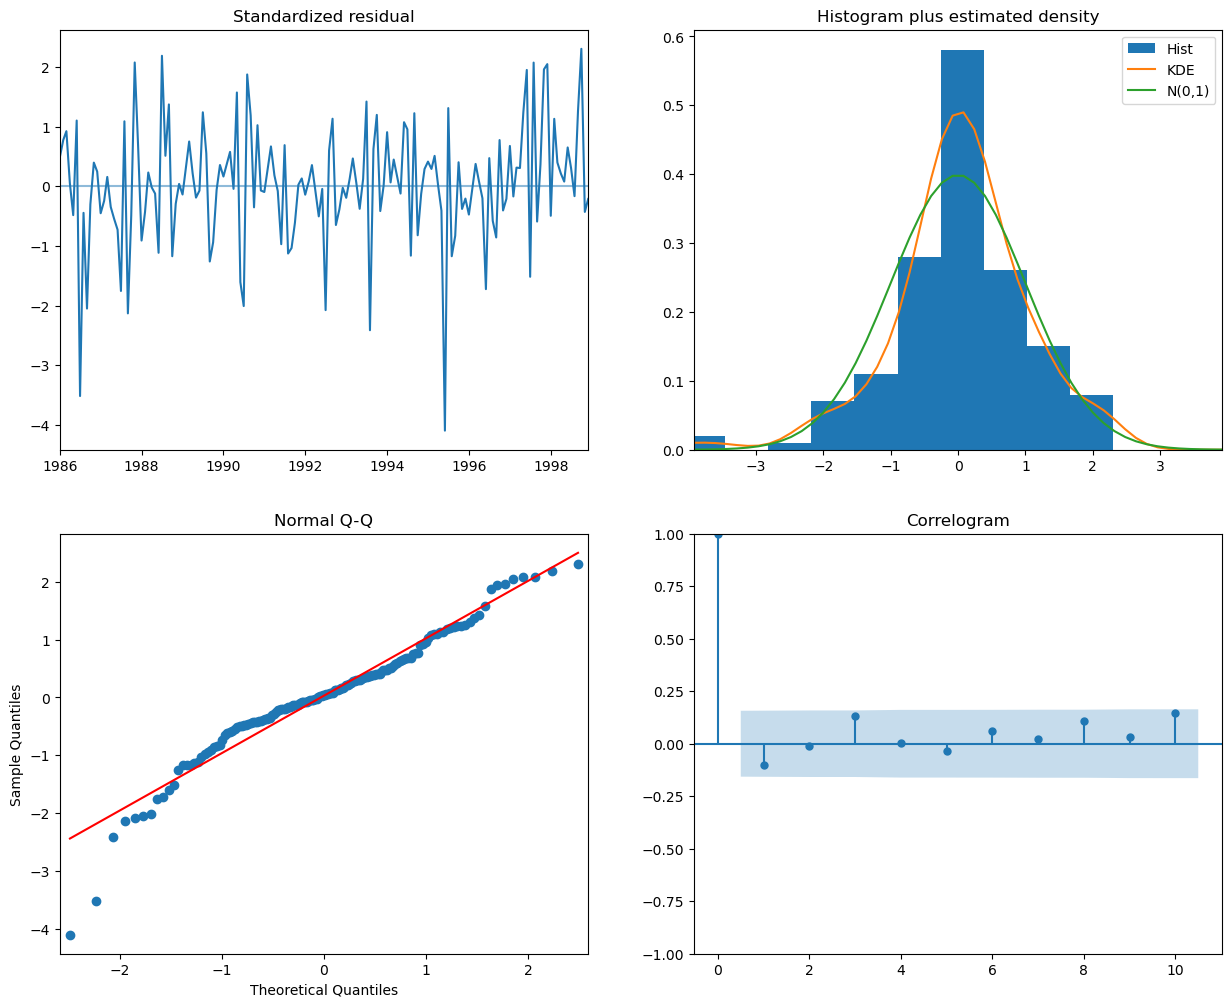



            Forecasted
Date                  
2001-01-01    1.177651
2001-02-01    0.974113
2001-03-01    0.876984
2001-04-01    0.520567
2001-05-01    0.298798
2001-06-01   -0.029579
2001-07-01    0.094445
2001-08-01    0.235067
2001-09-01    0.343996
2001-10-01    0.590471
2001-11-01    0.980169
2001-12-01    1.139879


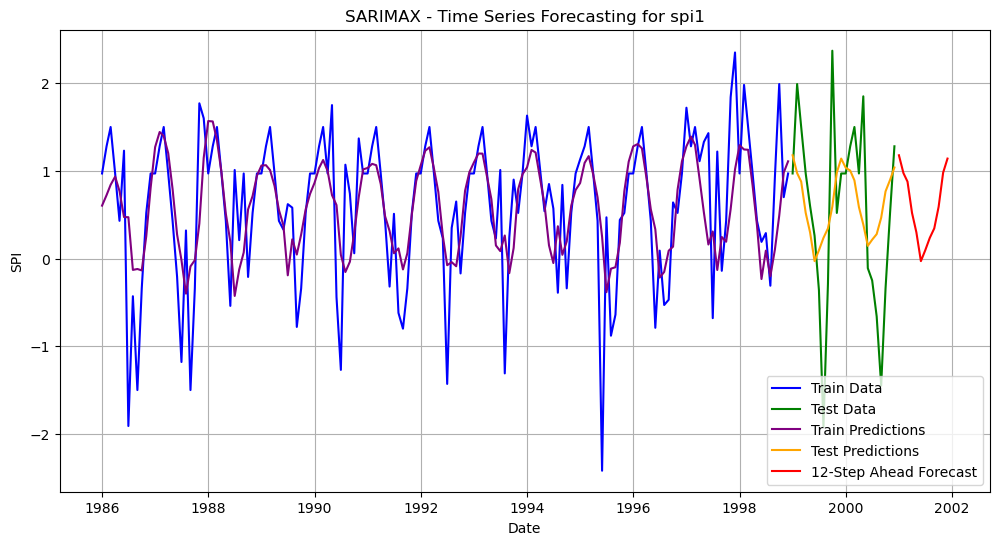

Prediction for spi1.1:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.567023  0.366657  2.767388    1.50
1999-02-01    1.396481  0.182989  2.609974    2.30
1999-03-01    1.392149  0.153777  2.630521    1.50
1999-04-01    1.294685  0.054373  2.534996    1.11
1999-05-01    0.889277 -0.352283  2.130837    0.94
1999-06-01    0.187015 -1.054722  1.428753    0.10
1999-07-01    0.249527 -0.992282  1.491337   -0.17
1999-08-01    0.199692 -1.042131  1.441515   -1.66
1999-09-01    0.095204 -1.146624  1.337031    0.15
1999-10-01    0.625598 -0.616230  1.867426    1.92
1999-11-01    0.793669 -0.448160  2.035497    0.52
1999-12-01    1.330754  0.088926  2.572583    1.11
2000-01-01    1.567248  0.325120  2.809376    1.50
2000-02-01    1.392072  0.149938  2.634207    1.50
2000-03-01    1.391975  0.149828  2.634122    1.50
2000-04-01    1.279947  0.037799  2.522096    1.11
2000-05-01    0.876363 -0.365786  2.118512    1.96
2000-06-01    0.271172 -0.970977  1.513322    0.30
2000-07-

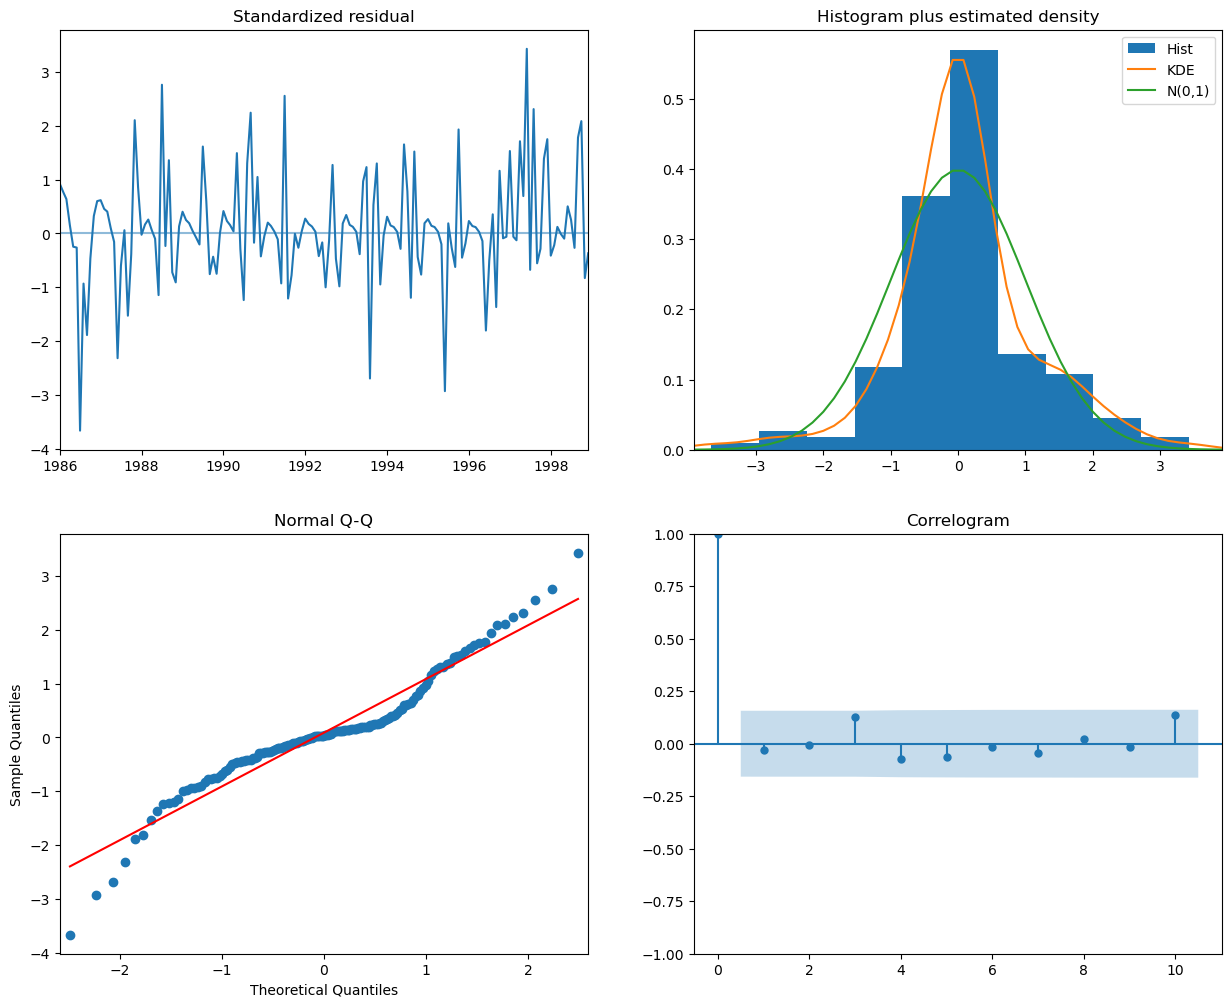



            Forecasted
Date                  
2001-01-01    1.567023
2001-02-01    1.396481
2001-03-01    1.392149
2001-04-01    1.294685
2001-05-01    0.889277
2001-06-01    0.187015
2001-07-01    0.249527
2001-08-01    0.199692
2001-09-01    0.095204
2001-10-01    0.625598
2001-11-01    0.793669
2001-12-01    1.330754


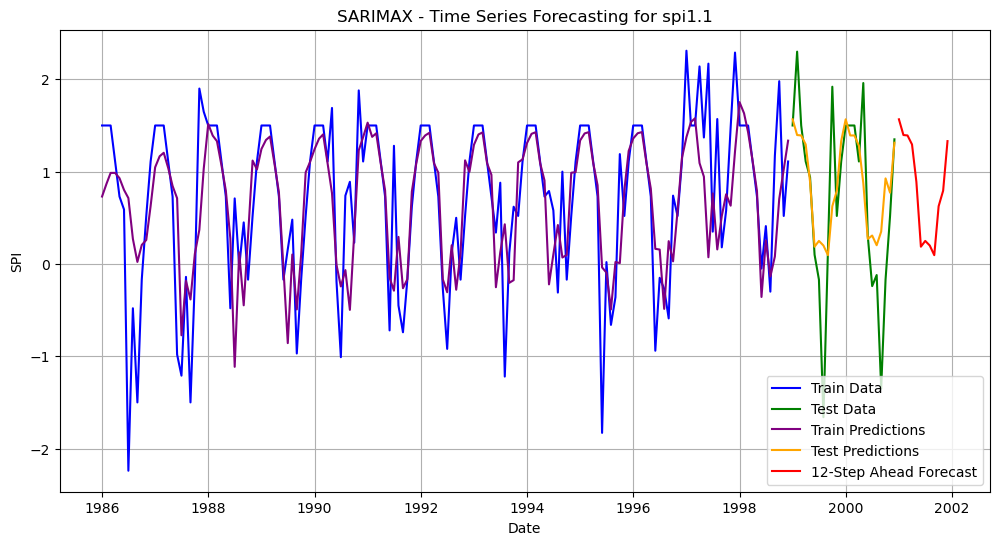

Prediction for spi1.2:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.262951 -0.093675  2.619577    0.84
1999-02-01    1.413104  0.054829  2.771379    2.25
1999-03-01    0.980794 -0.399001  2.360590    1.50
1999-04-01    1.118077 -0.274979  2.511134    1.11
1999-05-01    0.928081 -0.464984  2.321146    0.98
1999-06-01    0.797152 -0.605781  2.200084   -0.35
1999-07-01    0.846932 -0.565574  2.259438   -1.09
1999-08-01    0.360942 -1.051863  1.773746   -2.16
1999-09-01    0.300842 -1.115992  1.717677    0.03
1999-10-01    0.712631 -0.710462  2.135723    1.27
1999-11-01    0.741521 -0.682349  2.165391    0.34
1999-12-01    1.425400  0.000144  2.850657    1.11
2000-01-01    1.177451 -0.249760  2.604661    0.84
2000-02-01    1.602949  0.175053  3.030845    1.83
2000-03-01    1.206683 -0.222633  2.635998    1.50
2000-04-01    1.140501 -0.292440  2.573442    1.11
2000-05-01    0.788560 -0.645284  2.222404    1.87
2000-06-01    0.605085 -0.829134  2.039305   -0.10
2000-07-

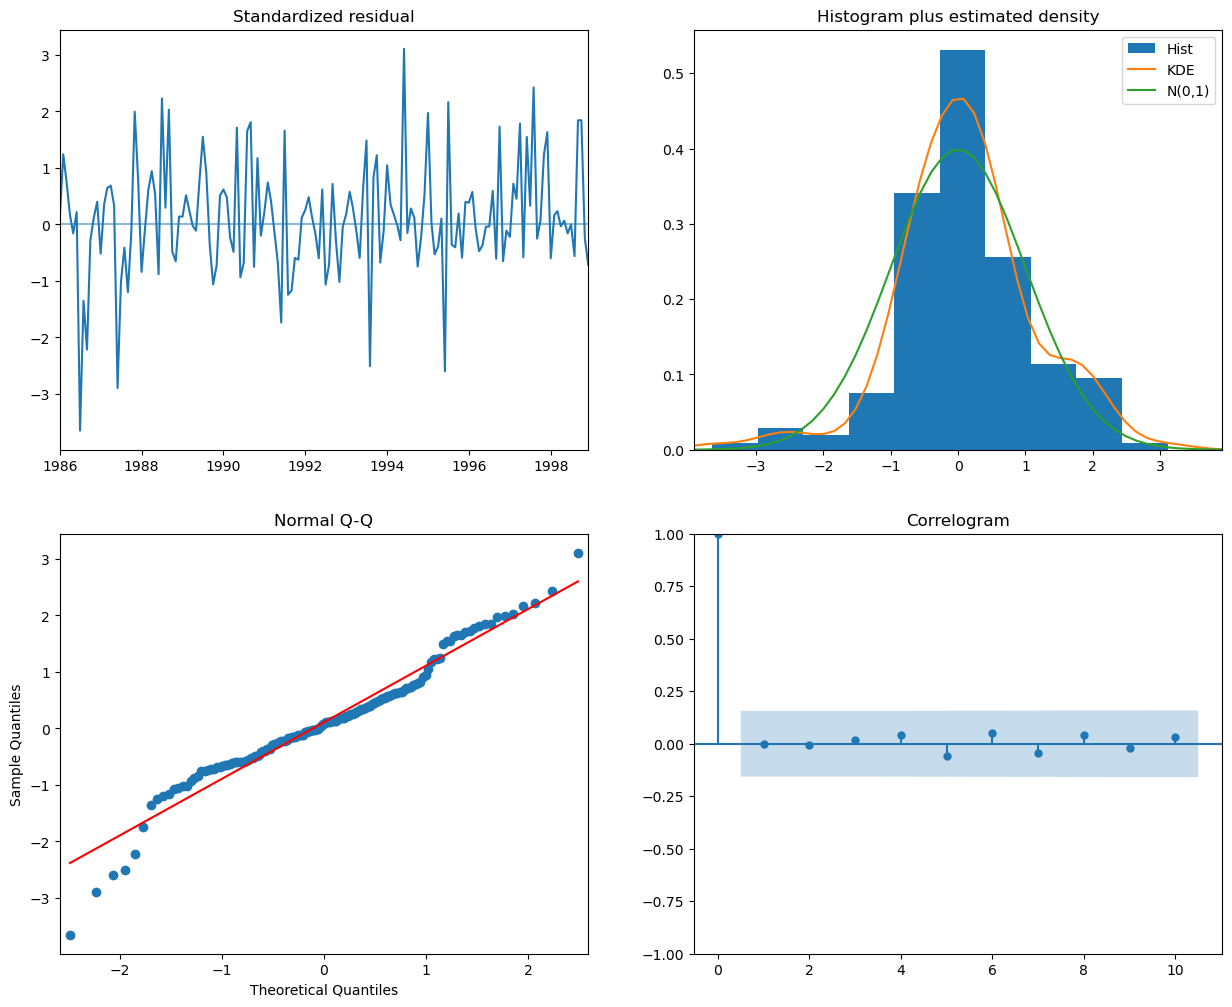



            Forecasted
Date                  
2001-01-01    1.262951
2001-02-01    1.413104
2001-03-01    0.980794
2001-04-01    1.118077
2001-05-01    0.928081
2001-06-01    0.797152
2001-07-01    0.846932
2001-08-01    0.360942
2001-09-01    0.300842
2001-10-01    0.712631
2001-11-01    0.741521
2001-12-01    1.425400


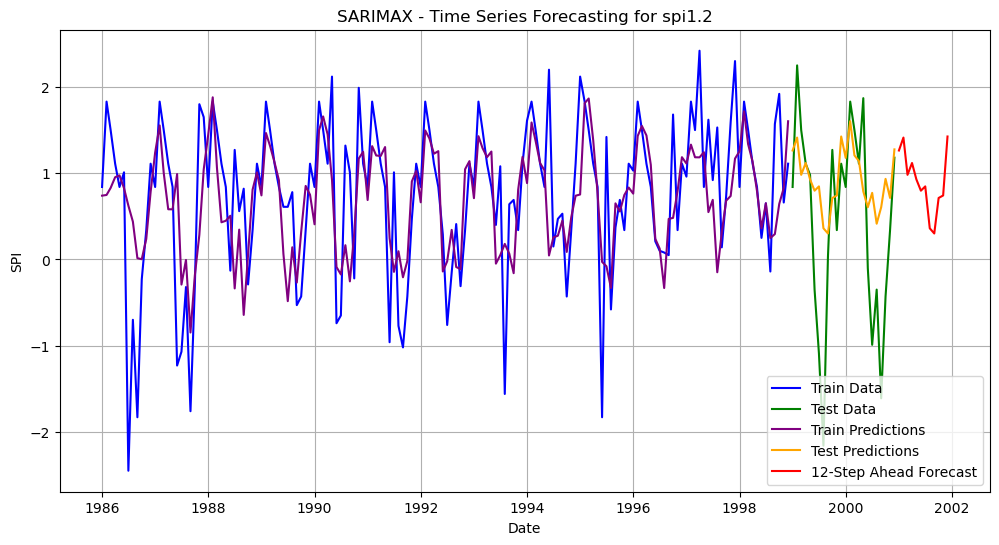

Prediction for spi1.3:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.091276 -0.267921  2.450474    0.84
1999-02-01    1.176350 -0.182848  2.535547    2.38
1999-03-01    1.176599 -0.182599  2.535796    1.28
1999-04-01    1.333481 -0.025716  2.692679    1.11
1999-05-01    0.826529 -0.532669  2.185726    1.21
1999-06-01    0.377077 -0.982121  1.736274   -0.14
1999-07-01    0.326299 -1.032899  1.685496   -0.68
1999-08-01    0.097576 -1.261621  1.456774   -1.82
1999-09-01    0.198669 -1.160529  1.557866   -0.42
1999-10-01    0.535844 -0.823353  1.895042    2.14
1999-11-01    0.507537 -0.851660  1.866735    0.43
1999-12-01    1.178434 -0.180764  2.537631    1.28
2000-01-01    1.018691 -0.340811  2.378194    0.84
2000-02-01    1.174228 -0.185274  2.533731    1.28
2000-03-01    1.174374 -0.185129  2.533876    1.28
2000-04-01    1.311880 -0.047623  2.671382    1.20
2000-05-01    0.820443 -0.539060  2.179945    1.94
2000-06-01    0.486279 -0.873223  1.845782    0.07
2000-07-

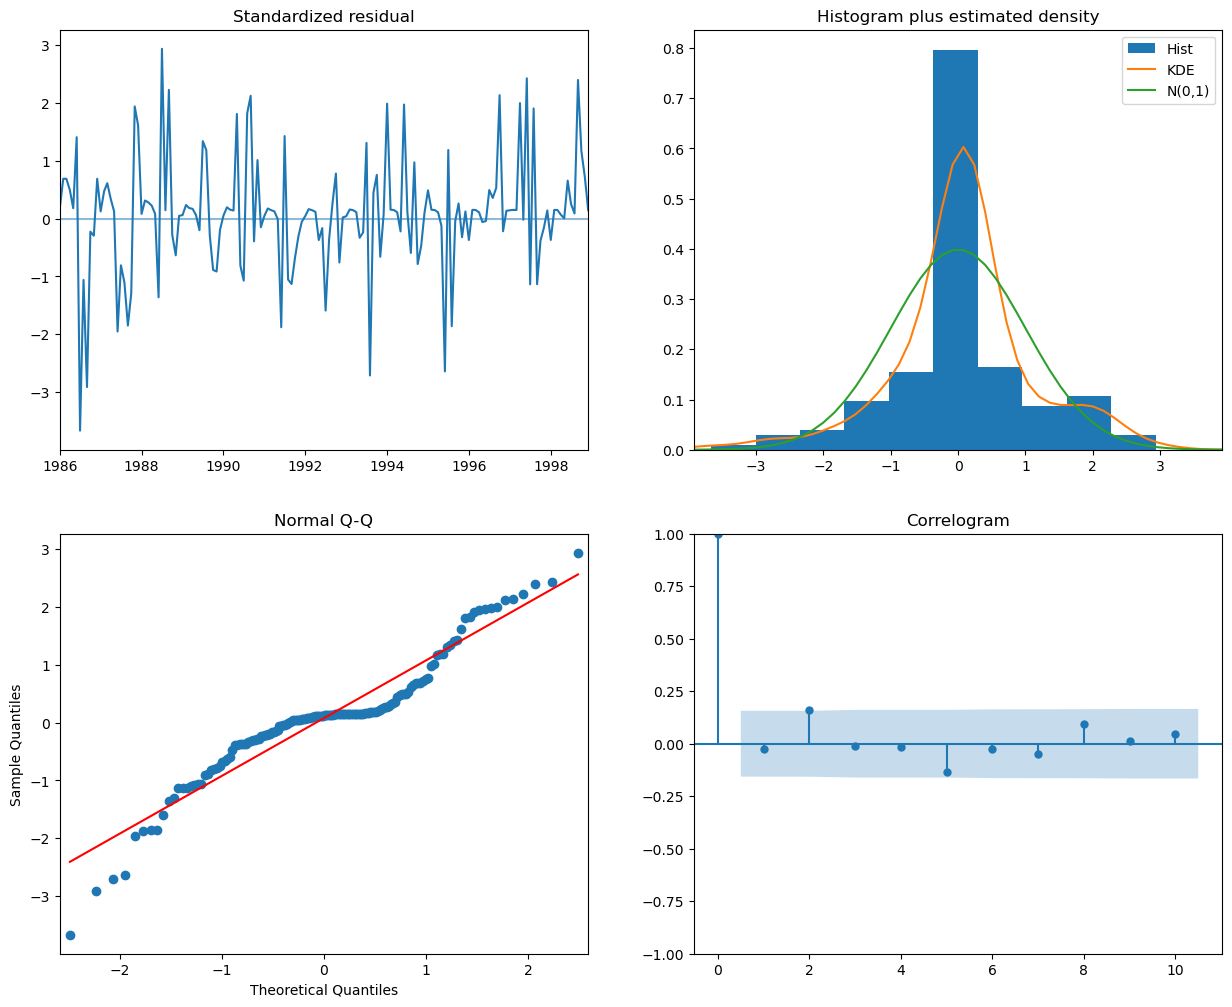



            Forecasted
Date                  
2001-01-01    1.091276
2001-02-01    1.176350
2001-03-01    1.176599
2001-04-01    1.333481
2001-05-01    0.826529
2001-06-01    0.377077
2001-07-01    0.326299
2001-08-01    0.097576
2001-09-01    0.198669
2001-10-01    0.535844
2001-11-01    0.507537
2001-12-01    1.178434


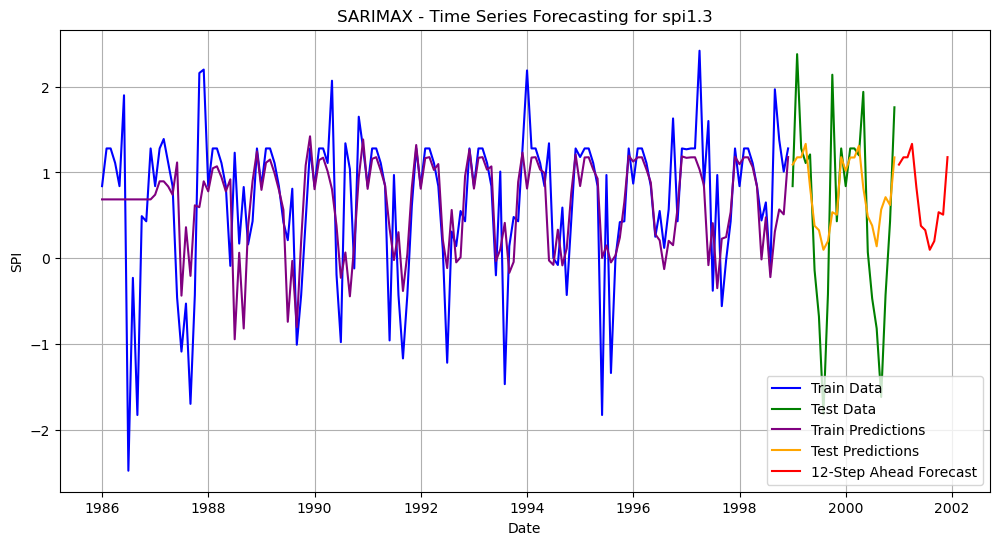

Prediction for spi1.4:
            Prediction  Lower_CI  Upper_CI  Actual
1999-01-01    1.192702 -0.198119  2.583523    1.11
1999-02-01    1.207845 -0.184834  2.600524    2.35
1999-03-01    1.086425 -0.307188  2.480037    1.28
1999-04-01    0.861380 -0.532330  2.255089    1.11
1999-05-01    0.593392 -0.800497  1.987280    1.15
1999-06-01    0.354523 -1.040457  1.749503   -0.02
1999-07-01    0.208840 -1.188051  1.605731   -0.95
1999-08-01    0.195231 -1.203477  1.593939   -1.77
1999-09-01    0.317026 -1.082587  1.716640   -0.41
1999-10-01    0.541188 -0.858515  1.940892    1.23
1999-11-01    0.807277 -0.592609  2.207163    0.52
1999-12-01    1.043742 -0.357225  2.444709    1.28
2000-01-01    1.187163 -0.215683  2.590010    1.11
2000-02-01    1.199259 -0.205364  2.603882    1.28
2000-03-01    1.077106 -0.328396  2.482607    1.28
2000-04-01    0.853831 -0.551754  2.259417    1.48
2000-05-01    0.589636 -0.816134  1.995406    1.73
2000-06-01    0.355559 -1.051282  1.762400    0.17
2000-07-

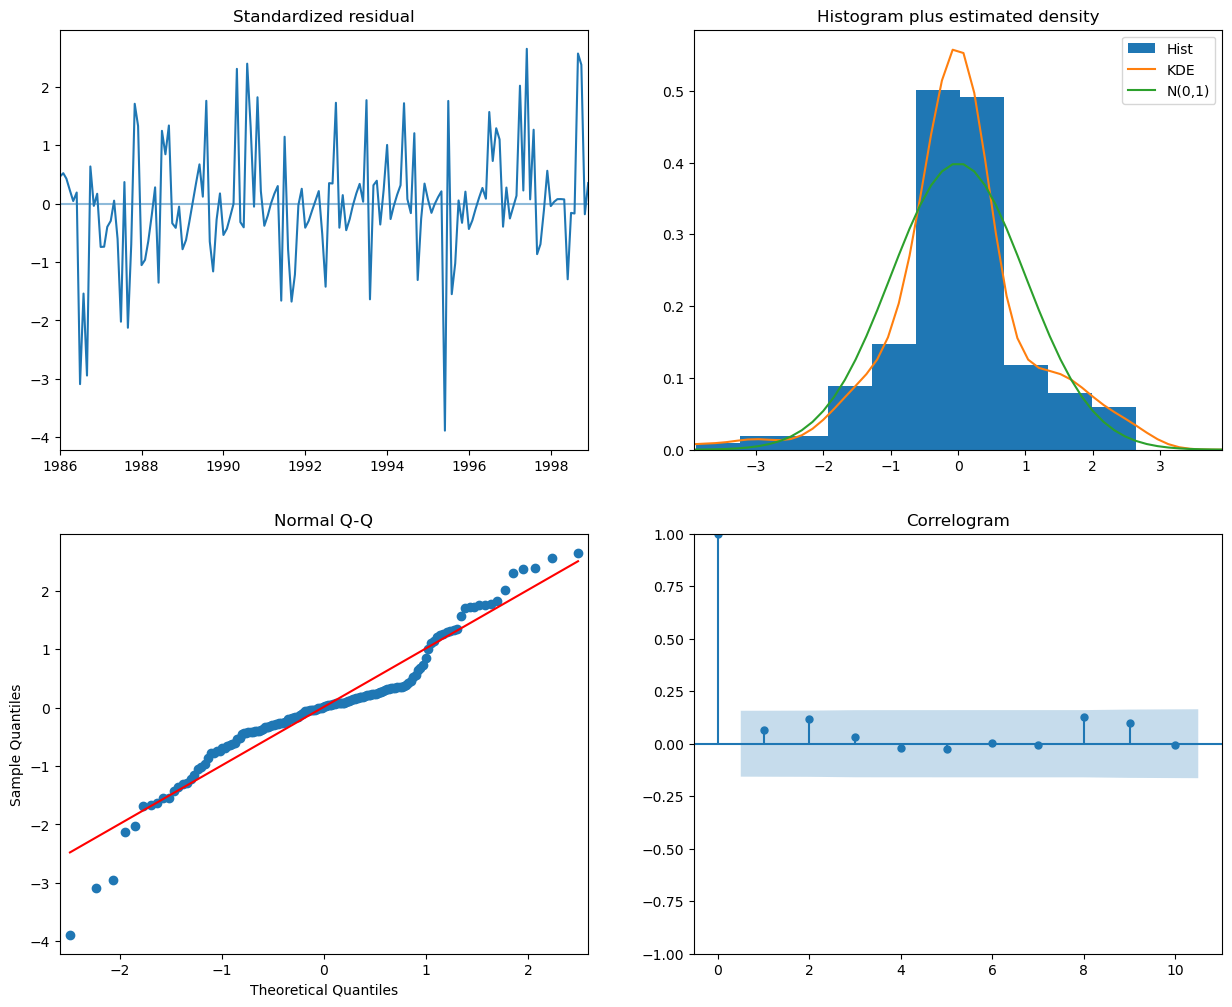



            Forecasted
Date                  
2001-01-01    1.192702
2001-02-01    1.207845
2001-03-01    1.086425
2001-04-01    0.861380
2001-05-01    0.593392
2001-06-01    0.354523
2001-07-01    0.208840
2001-08-01    0.195231
2001-09-01    0.317026
2001-10-01    0.541188
2001-11-01    0.807277
2001-12-01    1.043742


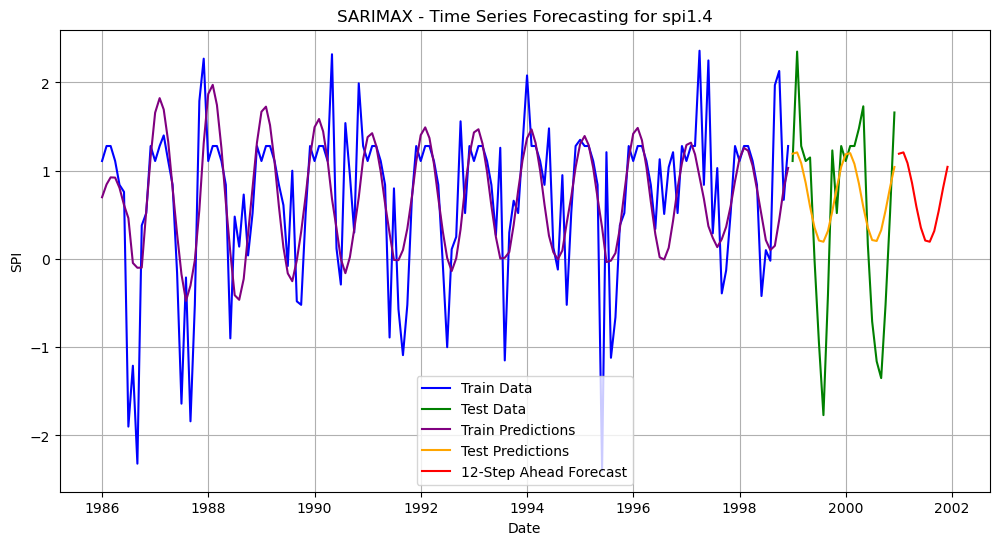

In [35]:
for spi_column, spei_column in zip(spi.columns, spei.columns):
    model = auto_arima(spi_train[spi_column], seasonal=True, 
                       suppress_warnings=True, trace=False, m=12, exogenous=spei[spei_column])
    model.fit(spi_train[spi_column])
    train_predictions, _ = model.predict_in_sample(return_conf_int=True)
    train_predictions_df = pd.DataFrame({'Date': spi_train.index, 'Predicted': train_predictions})
    train_predictions_df.set_index('Date', inplace=True)
    train_pred_lst.append(train_predictions_df)

    pred, conf_int = model.predict(n_periods=24, return_conf_int=True)
    pred_df = pd.DataFrame({'Prediction': pred,
                                'Lower_CI': conf_int[:, 0],
                                'Upper_CI': conf_int[:, 1],
                                'Actual': spi_test[spi_column]})

    test_pred_lst.append(pred_df)
    print(f"Prediction for {spi_column}:")
    actual = spi_test[spi_column]
    predicted = pred_df['Prediction']
    mse = mean_squared_error(actual, predicted)
    rmse=np.sqrt(mse)
    y_range = np.max(actual) - np.min(actual)
    rmse_percentage = (rmse / y_range) * 100

    print(pred_df)
    print(f'RMSE for {spi_column} = {rmse}')
    print(f'RMSE percentage for {spi_column} = {rmse_percentage}')
    print(f'AIC for {spi_column} = {model.aic()}')
    print(f'BIC for {spi_column} = {model.bic()}')
    print('\nPlot Diagnostics:')
    model.plot_diagnostics(figsize=(15,12))
    plt.show() 
    print('\n')
    forecast_steps = 12
    forecast, conf_int_forecast = model.predict(n_periods=forecast_steps, 
                                                return_conf_int=True)
    future_dates = pd.date_range(pred_df.index.max() + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted': forecast})
    forecast_df.set_index('Date', inplace=True)   
    print(forecast_df)
    plt.figure(figsize=(12, 6))
    plt.plot(spi_train.index, spi_train[spi_column], label='Train Data', color='blue')
    plt.plot(spi_test.index, spi_test[spi_column], label='Test Data', color='green')
    plt.plot(train_predictions_df.index, train_predictions_df['Predicted'], label='Train Predictions', color='purple')
    plt.plot(pred_df.index, pred_df['Prediction'], label='Test Predictions', color='orange')
    plt.plot(forecast_df.index, forecast_df['Forecasted'], label='12-Step Ahead Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('SPI')
    plt.legend()
    plt.title(f'SARIMAX - Time Series Forecasting for {spi_column}')
    plt.grid(True)
    plt.show()

<h2>ARCH</h2>

In [36]:
# a=arch_model(spi_train[spi_column])
# a.fit?
spi_train

spi1  spi1.1  spi1.2  spi1.3  spi1.4
Date                                            
1986-01-01  0.97    1.50    0.84    0.84    1.11
1986-02-01  1.28    1.50    1.83    1.28    1.28
1986-03-01  1.50    1.50    1.50    1.28    1.28
1986-04-01  0.97    1.11    1.11    1.11    1.11
1986-05-01  0.43    0.73    0.84    0.84    0.84
...          ...     ...     ...     ...     ...
1998-08-01 -0.31   -0.30   -0.14   -0.16   -0.02
1998-09-01  0.92    1.17    1.57    1.97    1.97
1998-10-01  1.99    1.98    1.92    1.38    2.13
1998-11-01  0.70    0.52    0.66    1.01    0.67
1998-12-01  0.97    1.11    1.11    1.28    1.28

[156 rows x 5 columns]

In [37]:
# np.array(forecast.mean.iloc[-3:]).reshape(1,12)

Prediction for spi1:
            Prediction  Actual
Date                          
1999-01-01    0.612777    0.97
1999-02-01    0.612777    1.99
1999-03-01    0.612777    1.50
1999-04-01    0.612777    0.97
1999-05-01    0.612777    0.60
1999-06-01    0.612777    0.26
1999-07-01    0.612777   -0.36
1999-08-01    0.612777   -1.92
1999-09-01    0.612777   -0.29
1999-10-01    0.612777    2.37
1999-11-01    0.612777    0.52
1999-12-01    0.612777    0.97
2000-01-01    0.612777    0.97
2000-02-01    0.612777    1.28
2000-03-01    0.612777    1.50
2000-04-01    0.612777    0.97
2000-05-01    0.612777    1.85
2000-06-01    0.612777   -0.11
2000-07-01    0.612777   -0.25
2000-08-01    0.612777   -0.66
2000-09-01    0.612777   -1.45
2000-10-01    0.612777   -0.34
2000-11-01    0.612777    0.52
2000-12-01    0.612777    1.28
RMSE for spi1 = 1.0405470651927828
RMSE percentage for spi1 = 24.25517634482011
AIC for spi1 = 391.5253356726278
BIC for spi1 = 403.72475970162594


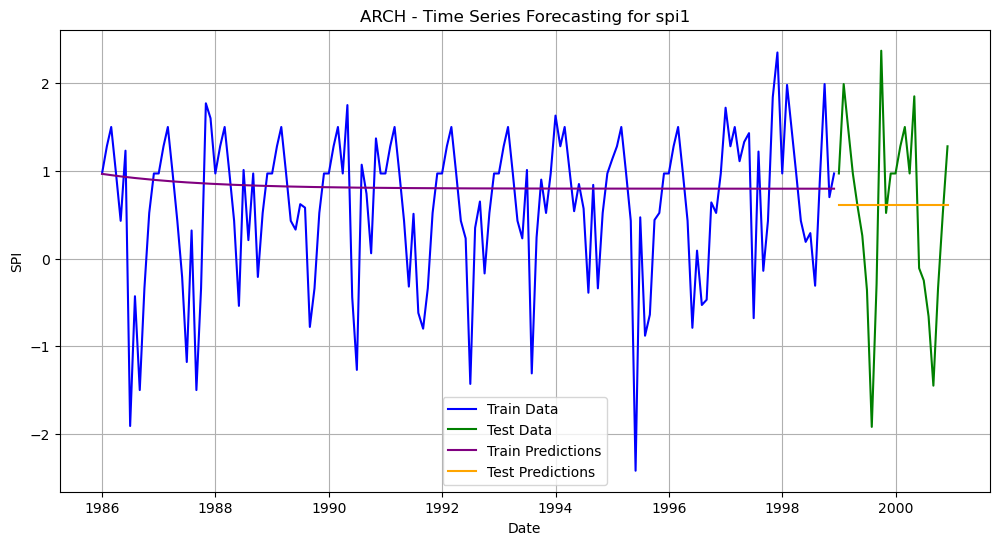

Prediction for spi1.1:
            Prediction  Actual
Date                          
1999-01-01    0.728861    1.50
1999-02-01    0.728861    2.30
1999-03-01    0.728861    1.50
1999-04-01    0.728861    1.11
1999-05-01    0.728861    0.94
1999-06-01    0.728861    0.10
1999-07-01    0.728861   -0.17
1999-08-01    0.728861   -1.66
1999-09-01    0.728861    0.15
1999-10-01    0.728861    1.92
1999-11-01    0.728861    0.52
1999-12-01    0.728861    1.11
2000-01-01    0.728861    1.50
2000-02-01    0.728861    1.50
2000-03-01    0.728861    1.50
2000-04-01    0.728861    1.11
2000-05-01    0.728861    1.96
2000-06-01    0.728861    0.30
2000-07-01    0.728861   -0.24
2000-08-01    0.728861   -0.12
2000-09-01    0.728861   -1.35
2000-10-01    0.728861   -0.17
2000-11-01    0.728861    0.52
2000-12-01    0.728861    1.35
RMSE for spi1.1 = 0.9905313555384141
RMSE percentage for spi1.1 = 25.01341806915187
AIC for spi1.1 = 407.5613993240353
BIC for spi1.1 = 419.7608233530334


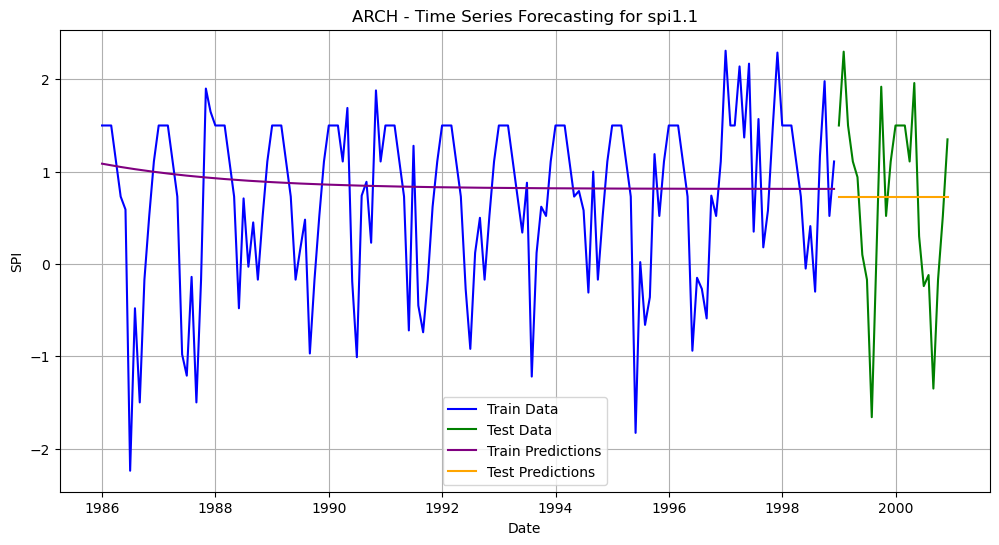

Prediction for spi1.2:
            Prediction  Actual
Date                          
1999-01-01    0.789725    0.84
1999-02-01    0.789725    2.25
1999-03-01    0.789725    1.50
1999-04-01    0.789725    1.11
1999-05-01    0.789725    0.98
1999-06-01    0.789725   -0.35
1999-07-01    0.789725   -1.09
1999-08-01    0.789725   -2.16
1999-09-01    0.789725    0.03
1999-10-01    0.789725    1.27
1999-11-01    0.789725    0.34
1999-12-01    0.789725    1.11
2000-01-01    0.789725    0.84
2000-02-01    0.789725    1.83
2000-03-01    0.789725    1.50
2000-04-01    0.789725    1.11
2000-05-01    0.789725    1.87
2000-06-01    0.789725   -0.10
2000-07-01    0.789725   -0.99
2000-08-01    0.789725   -0.35
2000-09-01    0.789725   -1.61
2000-10-01    0.789725   -0.43
2000-11-01    0.789725    0.34
2000-12-01    0.789725    1.18
RMSE for spi1.2 = 1.1751212700715739
RMSE percentage for spi1.2 = 26.64674081794952
AIC for spi1.2 = 412.6578460923198
BIC for spi1.2 = 424.8572701213179


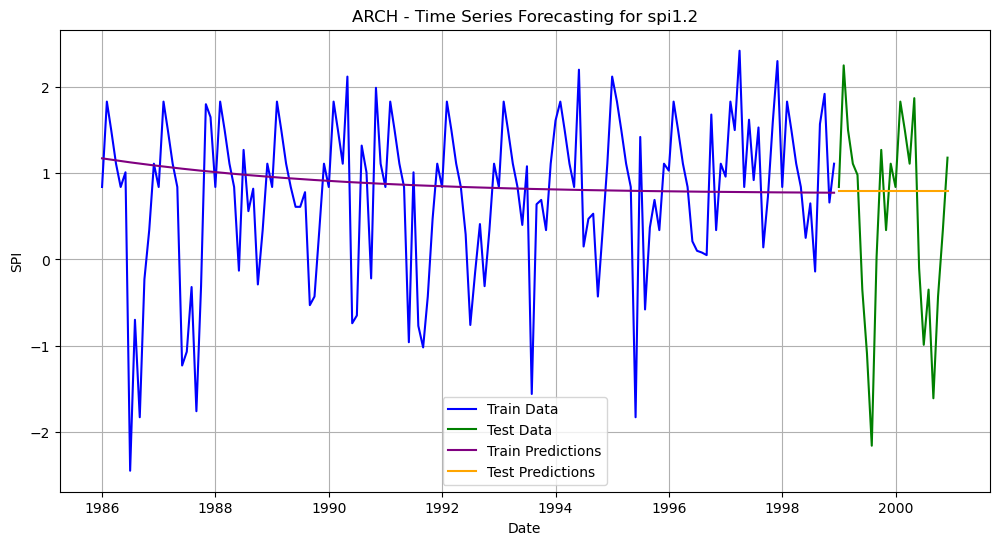

Prediction for spi1.3:
            Prediction  Actual
Date                          
1999-01-01    0.727866    0.84
1999-02-01    0.727866    2.38
1999-03-01    0.727866    1.28
1999-04-01    0.727866    1.11
1999-05-01    0.727866    1.21
1999-06-01    0.727866   -0.14
1999-07-01    0.727866   -0.68
1999-08-01    0.727866   -1.82
1999-09-01    0.727866   -0.42
1999-10-01    0.727866    2.14
1999-11-01    0.727866    0.43
1999-12-01    0.727866    1.28
2000-01-01    0.727866    0.84
2000-02-01    0.727866    1.28
2000-03-01    0.727866    1.28
2000-04-01    0.727866    1.20
2000-05-01    0.727866    1.94
2000-06-01    0.727866    0.07
2000-07-01    0.727866   -0.47
2000-08-01    0.727866   -0.82
2000-09-01    0.727866   -1.62
2000-10-01    0.727866   -0.43
2000-11-01    0.727866    0.43
2000-12-01    0.727866    1.76
RMSE for spi1.3 = 1.1354664749005796
RMSE percentage for spi1.3 = 27.03491606906142
AIC for spi1.3 = 395.3990450439584
BIC for spi1.3 = 407.5984690729565


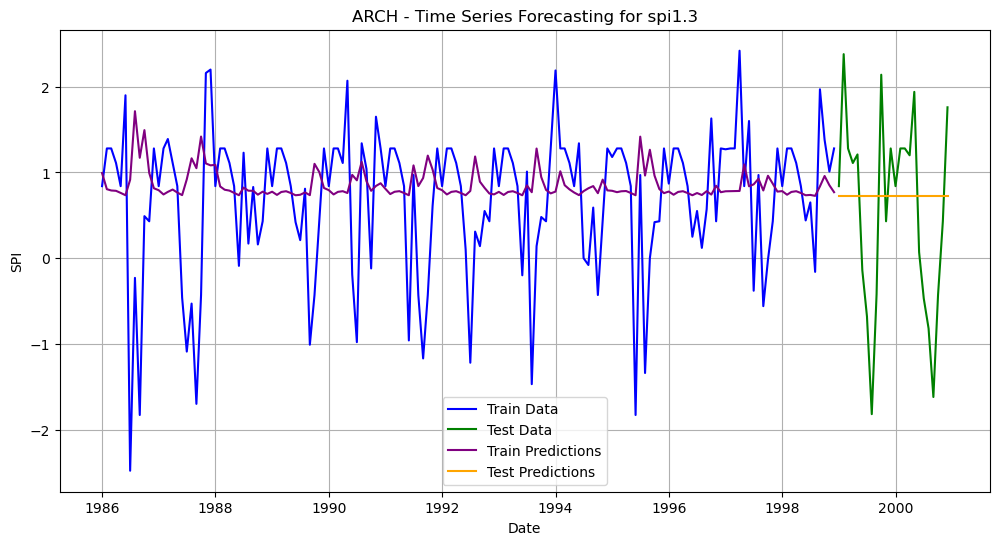

Prediction for spi1.4:
            Prediction  Actual
Date                          
1999-01-01    0.781865    1.11
1999-02-01    0.781865    2.35
1999-03-01    0.781865    1.28
1999-04-01    0.781865    1.11
1999-05-01    0.781865    1.15
1999-06-01    0.781865   -0.02
1999-07-01    0.781865   -0.95
1999-08-01    0.781865   -1.77
1999-09-01    0.781865   -0.41
1999-10-01    0.781865    1.23
1999-11-01    0.781865    0.52
1999-12-01    0.781865    1.28
2000-01-01    0.781865    1.11
2000-02-01    0.781865    1.28
2000-03-01    0.781865    1.28
2000-04-01    0.781865    1.48
2000-05-01    0.781865    1.73
2000-06-01    0.781865    0.17
2000-07-01    0.781865   -0.71
2000-08-01    0.781865   -1.16
2000-09-01    0.781865   -1.35
2000-10-01    0.781865   -0.52
2000-11-01    0.781865    0.52
2000-12-01    0.781865    1.66
RMSE for spi1.4 = 1.1289941303871411
RMSE percentage for spi1.4 = 27.402770155027696
AIC for spi1.4 = 405.21166836510224
BIC for spi1.4 = 417.41109239410036


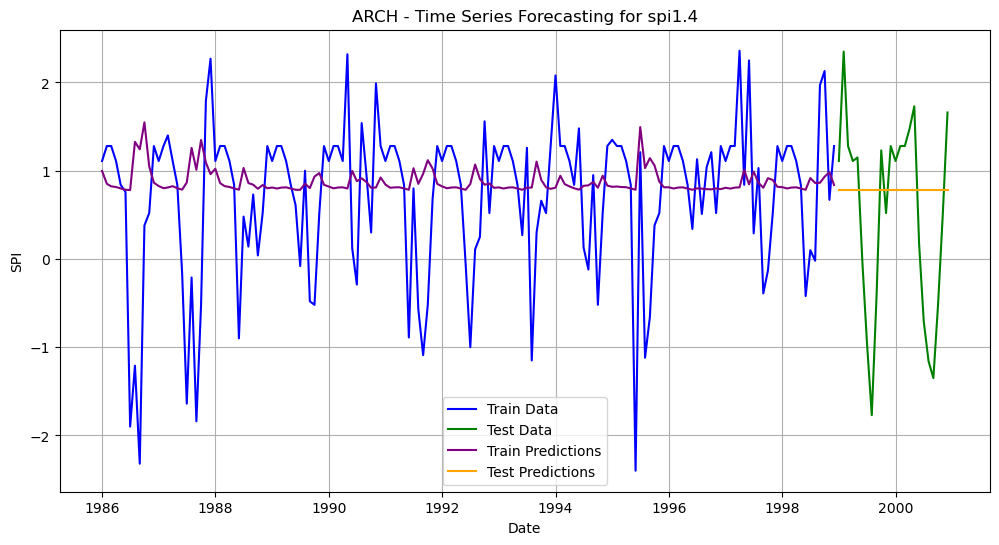

In [38]:
for spi_column in spi.columns:
    model = arch_model(spi_train[spi_column], mean='AR', vol='GARCH', p=1, o=0, q=1)
    model = model.fit(update_freq=1, disp='off')
    residuals = model.resid
    # print(residuals)
    # print(model.conditional_volatility)
    train_predictions = model.conditional_volatility
    train_predictions_df = pd.DataFrame({'Date': spi_train.index, 'Predicted': train_predictions})
    train_predictions_df.set_index('Date', inplace=True)
    # train_predictions_df = pd.DataFrame({'Date': spi_train.index, 'Predicted': train_predictions})
    # train_predictions_df.set_index('Date', inplace=True)
    # train_pred_lst.append(train_predictions_df)
    # print(train_predictions)
    forecast = model.forecast(horizon=len(spi_test))
    a=(np.array(forecast.mean.iloc[-3:]).reshape(1,24))
    # print(forecast.residual_variance.iloc[-3:])
    # a=(np.array(forecast.variance.iloc[-3:]).reshape(1,24))
    pred_df = pd.DataFrame({'Prediction': a[0],
                            'Actual': spi_test[spi_column]})
    pred_df.index = spi_test.index
    # pred, conf_int = model.predict(n_periods=12, return_conf_int=True)
    # pred_df = pd.DataFrame({'Prediction': pred,
    #                             'Lower_CI': conf_int[:, 0],
    #                             'Upper_CI': conf_int[:, 1],
    #                             'Actual': spi_test[spi_column]})

    # test_pred_lst.append(pred_df)
    print(f"Prediction for {spi_column}:")
    actual = spi_test[spi_column]
    predicted = pred_df['Prediction']
    mse = mean_squared_error(actual, predicted)
    rmse=np.sqrt(mse)
    y_range = np.max(actual) - np.min(actual)
    rmse_percentage = (rmse / y_range) * 100

    print(pred_df)
    print(f'RMSE for {spi_column} = {rmse}')
    print(f'RMSE percentage for {spi_column} = {rmse_percentage}')
    print(f'AIC for {spi_column} = {model.aic}')
    print(f'BIC for {spi_column} = {model.bic}')
    # print('\nPlot Diagnostics:')
    # model.plot_diagnostics(figsize=(15,12))
    # plt.show() 
    # print('\n')
    # forecast_steps = 12
    # forecast, conf_int_forecast = model.predict(n_periods=forecast_steps, 
    #                                             return_conf_int=True)
    # future_dates = pd.date_range(pred_df.index.max() + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
    # forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted': forecast})
    # forecast_df.set_index('Date', inplace=True)   
    # print(forecast_df)
    plt.figure(figsize=(12, 6))
    plt.plot(spi_train.index, spi_train[spi_column], label='Train Data', color='blue')
    plt.plot(spi_test.index, spi_test[spi_column], label='Test Data', color='green')
    plt.plot(train_predictions_df.index, train_predictions_df['Predicted'], label='Train Predictions', color='purple')
    plt.plot(pred_df.index, pred_df['Prediction'], label='Test Predictions', color='orange')
    # plt.plot(forecast_df.index, forecast_df['Forecasted'], label='12-Step Ahead Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('SPI')
    plt.legend()
    plt.title(f'ARCH - Time Series Forecasting for {spi_column}')
    plt.grid(True)
    plt.show()

<h2>Random Forest </h2>

In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [40]:
spi_train.shape

(156, 5)

Prediction for spi1:
            Prediction  Actual
Date                          
1999-01-01      1.3694    0.97
1999-02-01      1.1341    1.99
1999-03-01      1.2364    1.50
1999-04-01      1.0328    0.97
1999-05-01      0.4372    0.60
1999-06-01      0.2446    0.26
1999-07-01     -0.2406   -0.36
1999-08-01      0.5866   -1.92
1999-09-01      0.2531   -0.29
1999-10-01      0.0378    2.37
1999-11-01      0.6874    0.52
1999-12-01      1.0803    0.97
2000-01-01      1.1393    0.97
2000-02-01      1.0895    1.28
2000-03-01      1.2346    1.50
2000-04-01      0.6979    0.97
2000-05-01      0.6525    1.85
2000-06-01     -0.1162   -0.11
2000-07-01      0.1043   -0.25
2000-08-01      0.2144   -0.66
2000-09-01      0.4398   -1.45
2000-10-01      0.4586   -0.34
2000-11-01      0.9093    0.52
2000-12-01      1.0682    1.28
RMSE for spi1 = 0.9129383500086616
RMSE percentage for spi1 = 22.158697815744212
R2 for spi1 = 0.22719134628977877
Forecasted values: 
             Forecasted
Date          

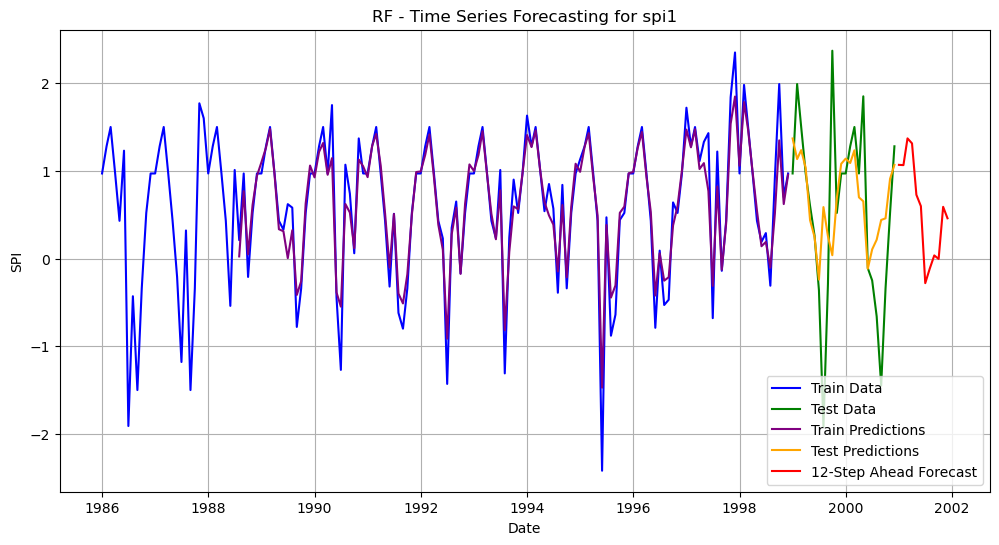

Prediction for spi1.1:
            Prediction  Actual
Date                          
1999-01-01      1.3604    1.50
1999-02-01      1.1814    2.30
1999-03-01      1.4352    1.50
1999-04-01      1.3078    1.11
1999-05-01      0.8376    0.94
1999-06-01      0.1820    0.10
1999-07-01      0.1031   -0.17
1999-08-01      0.4366   -1.66
1999-09-01      0.0076    0.15
1999-10-01      0.3419    1.92
1999-11-01      0.7975    0.52
1999-12-01      1.1596    1.11
2000-01-01      1.5222    1.50
2000-02-01      1.3012    1.50
2000-03-01      1.1967    1.50
2000-04-01      0.9771    1.11
2000-05-01      0.6083    1.96
2000-06-01      0.1853    0.30
2000-07-01      0.6609   -0.24
2000-08-01     -0.0293   -0.12
2000-09-01      0.4532   -1.35
2000-10-01      0.8100   -0.17
2000-11-01      0.9225    0.52
2000-12-01      1.1349    1.35
RMSE for spi1.1 = 0.8067867042527267
RMSE percentage for spi1.1 = 19.5822015595322
R2 for spi1.1 = 0.3364767261876245
Forecasted values: 
             Forecasted
Date     

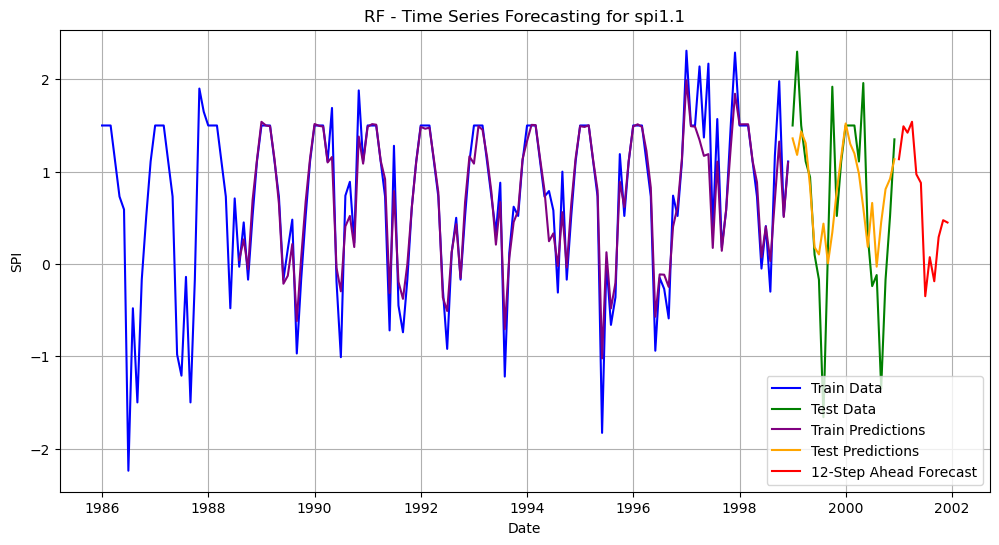

Prediction for spi1.2:
            Prediction  Actual
Date                          
1999-01-01      0.8799    0.84
1999-02-01      1.5198    2.25
1999-03-01      1.5241    1.50
1999-04-01      1.2239    1.11
1999-05-01      0.8576    0.98
1999-06-01      0.8268   -0.35
1999-07-01      0.9161   -1.09
1999-08-01      0.8587   -2.16
1999-09-01      0.3127    0.03
1999-10-01      0.7000    1.27
1999-11-01      0.8064    0.34
1999-12-01      1.2742    1.11
2000-01-01      1.3579    0.84
2000-02-01      1.4447    1.83
2000-03-01      1.3368    1.50
2000-04-01      1.1685    1.11
2000-05-01      0.9819    1.87
2000-06-01      0.7928   -0.10
2000-07-01      0.5220   -0.99
2000-08-01      0.1306   -0.35
2000-09-01      0.4790   -1.61
2000-10-01      0.9147   -0.43
2000-11-01      0.7396    0.34
2000-12-01      1.1545    1.18
RMSE for spi1.2 = 1.0531027948994527
RMSE percentage for spi1.2 = 25.560747449015842
R2 for spi1.2 = 0.12787849897141623
Forecasted values: 
             Forecasted
Date  

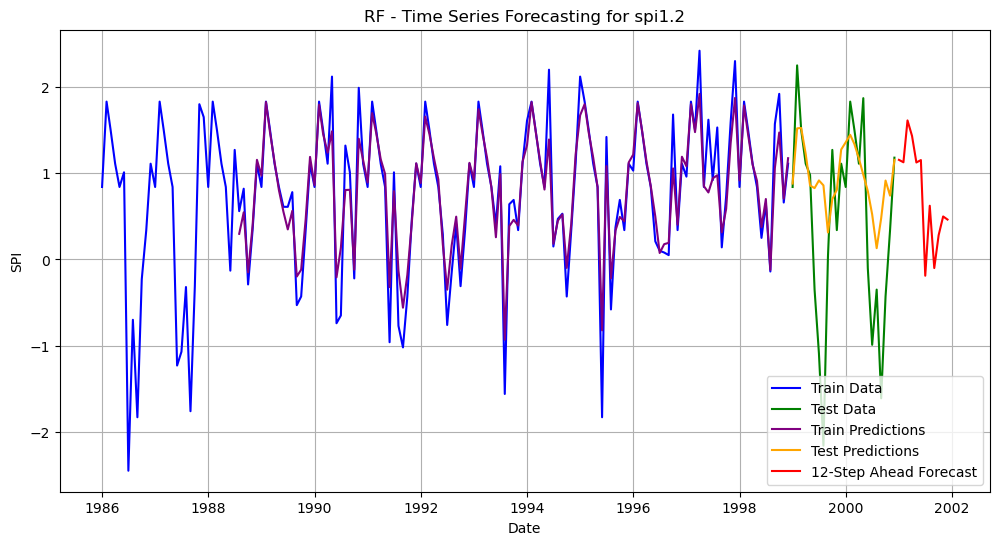

Prediction for spi1.3:
            Prediction  Actual
Date                          
1999-01-01      1.0319    0.84
1999-02-01      1.1528    2.38
1999-03-01      1.3431    1.28
1999-04-01      1.1857    1.11
1999-05-01      0.9652    1.21
1999-06-01      0.5453   -0.14
1999-07-01      0.1612   -0.68
1999-08-01      0.5112   -1.82
1999-09-01     -0.0950   -0.42
1999-10-01     -0.1846    2.14
1999-11-01      0.2193    0.43
1999-12-01      1.2482    1.28
2000-01-01      1.4950    0.84
2000-02-01      1.2508    1.28
2000-03-01      1.1200    1.28
2000-04-01      1.1537    1.20
2000-05-01      0.7442    1.94
2000-06-01      0.4845    0.07
2000-07-01      0.3519   -0.47
2000-08-01      0.0275   -0.82
2000-09-01      0.5227   -1.62
2000-10-01      0.8615   -0.43
2000-11-01      0.8443    0.43
2000-12-01      1.2165    1.76
RMSE for spi1.3 = 0.9991318342491591
RMSE percentage for spi1.3 = 24.250772675950465
R2 for spi1.3 = 0.2050082468127875
Forecasted values: 
             Forecasted
Date   

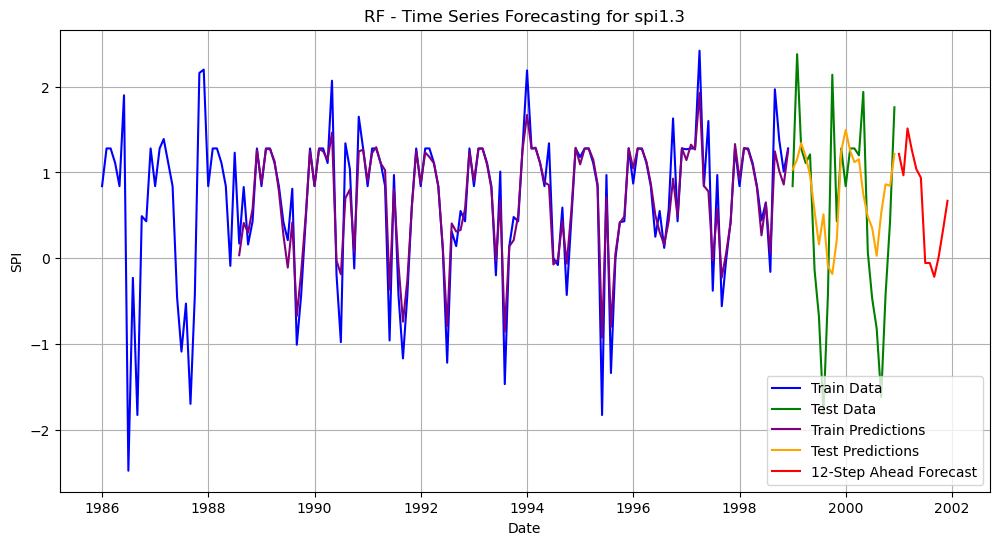

Prediction for spi1.4:
            Prediction  Actual
Date                          
1999-01-01      1.0903    1.11
1999-02-01      1.2074    2.35
1999-03-01      1.2488    1.28
1999-04-01      1.2085    1.11
1999-05-01      0.9334    1.15
1999-06-01      0.6363   -0.02
1999-07-01      0.1962   -0.95
1999-08-01      0.6774   -1.77
1999-09-01      0.1446   -0.41
1999-10-01      0.0238    1.23
1999-11-01      0.5860    0.52
1999-12-01      1.3290    1.28
2000-01-01      1.4957    1.11
2000-02-01      1.2503    1.28
2000-03-01      1.1378    1.28
2000-04-01      1.1406    1.48
2000-05-01      0.7559    1.73
2000-06-01      0.2779    0.17
2000-07-01      0.0647   -0.71
2000-08-01      0.5683   -1.16
2000-09-01      0.3784   -1.35
2000-10-01      0.6440   -0.52
2000-11-01      0.8622    0.52
2000-12-01      1.2448    1.66
RMSE for spi1.4 = 0.9204063793358312
RMSE percentage for spi1.4 = 22.33996066349105
R2 for spi1.4 = 0.2961743322858883
Forecasted values: 
             Forecasted
Date    

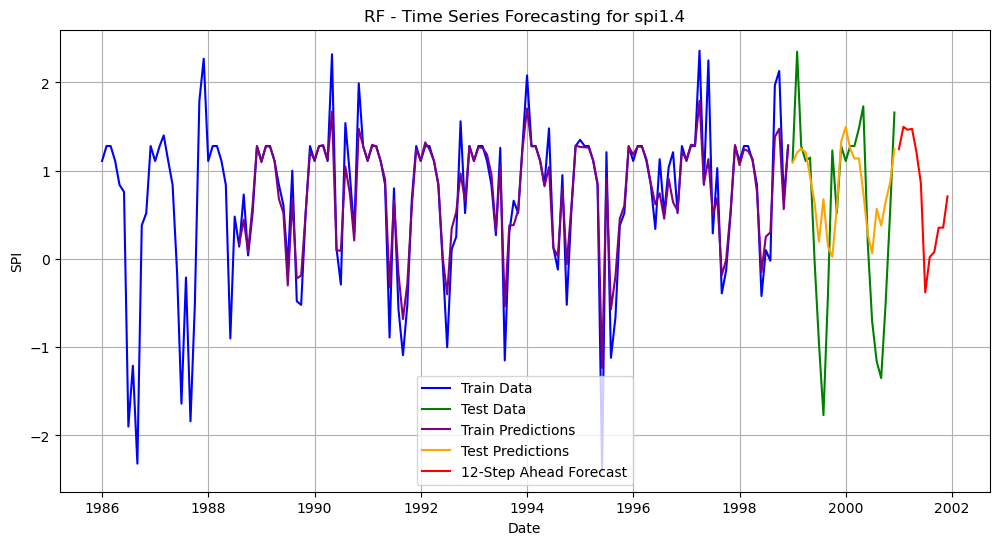

In [41]:
for spi_column in spi.columns:
    sequence_length = 30
    X, y = [], []
    for i in range(len(spi[spi_column]) - sequence_length - 1):
            X.append(spi[spi_column][i:i+sequence_length])
            y.append(spi[spi_column][i+sequence_length+1])

    X, y = np.array(X, dtype=np.float32), np.array(y,dtype=np.float32)
    train_size = int(len(X)-24)
    X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    rf_model.fit(X_train, y_train)
    predictions_train = rf_model.predict(X_train)
    train_predictions_df = pd.DataFrame({'Prediction': predictions_train,
                                    'Actual': spi_train[spi_column][31:]})
    # train_predictions_df.reset_index()
    # print(f"Prediction for {spi_column}:")

    predictions = rf_model.predict(X_test)
    pred_df = pd.DataFrame({'Prediction': predictions,
                                'Actual': spi_test[spi_column]})
    print(f"Prediction for {spi_column}:")

    r2=r2_score(y_test,predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse=np.sqrt(mse)
    y_range = np.max(actual) - np.min(actual)
    rmse_percentage = (rmse / y_range) * 100
    print(pred_df)
    print(f'RMSE for {spi_column} = {rmse}')
    print(f'RMSE percentage for {spi_column} = {rmse_percentage}')
    print(f'R2 for {spi_column} = {r2}')
    def pred_n_days(model, data, days):
        predictions = []
        
        for i in range(days):
            data = data.reshape(1, -1)  # Ensure data is 2D
            curr_pred = model.predict(data)
            predictions.append(curr_pred[0])

            # Update data for the next prediction
            data = np.concatenate((data[:, 1:], curr_pred.reshape(1, -1)), axis=1)

        return np.array(predictions)
    data = X[-1]
    forecast = pred_n_days(rf_model,data,12)
    future_dates = pd.date_range(spi.index.max() + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted': forecast})
    forecast_df.set_index('Date', inplace=True)   
    print("Forecasted values: \n", forecast_df)
    plt.figure(figsize=(12, 6))
    plt.plot(spi_train.index, spi_train[spi_column], label='Train Data', color='blue')
    plt.plot(spi_test.index, spi_test[spi_column], label='Test Data', color='green')
    plt.plot(train_predictions_df.index, train_predictions_df['Prediction'], label='Train Predictions', color='purple')
    plt.plot(pred_df.index, pred_df['Prediction'], label='Test Predictions', color='orange')
    plt.plot(forecast_df.index, forecast_df['Forecasted'], label='12-Step Ahead Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('SPI')
    plt.legend()
    plt.title(f'RF - Time Series Forecasting for {spi_column}')
    plt.grid(True)
    plt.show()

<h2>Gradient Boosting</h2>

Prediction for spi1:
            Prediction  Actual
Date                          
1999-01-01    1.303624    0.97
1999-02-01    1.133055    1.99
1999-03-01    1.017238    1.50
1999-04-01    0.967836    0.97
1999-05-01    0.382076    0.60
1999-06-01    0.600851    0.26
1999-07-01   -0.258131   -0.36
1999-08-01    0.929130   -1.92
1999-09-01   -0.239009   -0.29
1999-10-01   -0.954785    2.37
1999-11-01    0.698568    0.52
1999-12-01    0.604115    0.97
2000-01-01    1.287675    0.97
2000-02-01    1.017690    1.28
2000-03-01    0.689613    1.50
2000-04-01    0.082591    0.97
2000-05-01    1.022779    1.85
2000-06-01    0.083112   -0.11
2000-07-01   -0.073222   -0.25
2000-08-01    0.659507   -0.66
2000-09-01    0.070240   -1.45
2000-10-01    0.005165   -0.34
2000-11-01    0.826515    0.52
2000-12-01    0.311284    1.28
RMSE for spi1 = 1.0832700572395249
RMSE percentage for spi1 = 25.251050509837675
R2 for spi1 = -0.0880843215478031
Forecasted values:
             Forecasted
Date           

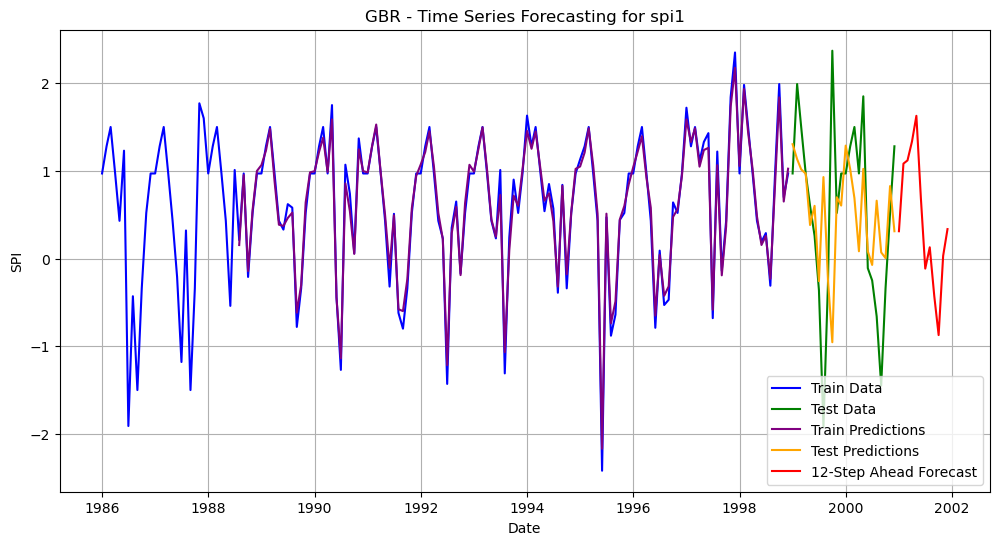

Prediction for spi1.1:
            Prediction  Actual
Date                          
1999-01-01    1.770076    1.50
1999-02-01    1.503433    2.30
1999-03-01    1.792690    1.50
1999-04-01    1.154361    1.11
1999-05-01    1.086533    0.94
1999-06-01    0.014959    0.10
1999-07-01    0.325776   -0.17
1999-08-01    0.865560   -1.66
1999-09-01    0.486144    0.15
1999-10-01    1.002976    1.92
1999-11-01    0.497664    0.52
1999-12-01    1.947421    1.11
2000-01-01    1.508080    1.50
2000-02-01    1.249554    1.50
2000-03-01    1.296107    1.50
2000-04-01    1.117238    1.11
2000-05-01    0.872721    1.96
2000-06-01    0.684818    0.30
2000-07-01    1.040179   -0.24
2000-08-01    0.084871   -0.12
2000-09-01    0.671067   -1.35
2000-10-01    1.377572   -0.17
2000-11-01    1.215155    0.52
2000-12-01    1.077857    1.35
RMSE for spi1.1 = 0.8957362070039436
RMSE percentage for spi1.1 = 22.619600969071985
R2 for spi1.1 = 0.18210236071691888
Forecasted values:
             Forecasted
Date   

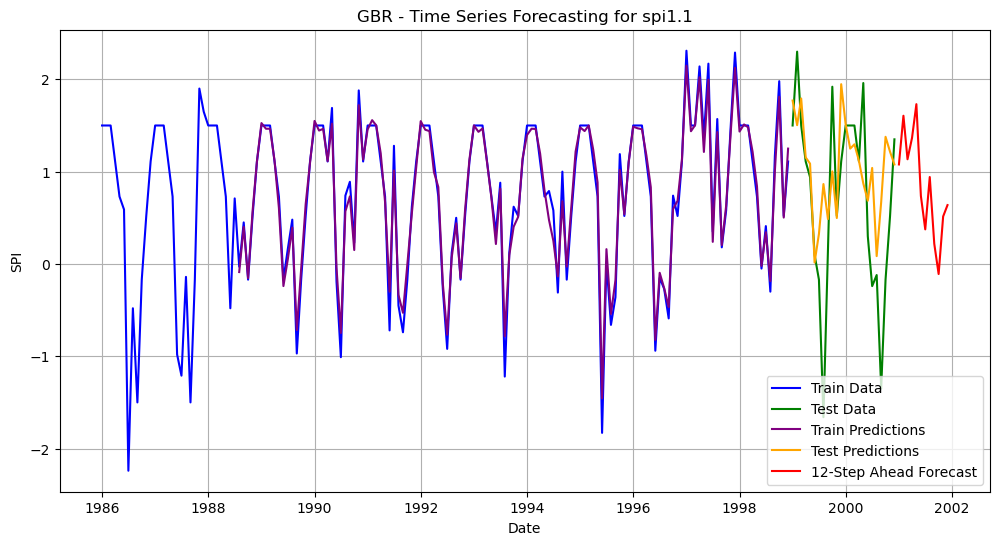

Prediction for spi1.2:
            Prediction  Actual
Date                          
1999-01-01    1.128874    0.84
1999-02-01    1.461426    2.25
1999-03-01    1.424162    1.50
1999-04-01    0.994039    1.11
1999-05-01    0.573098    0.98
1999-06-01    0.824415   -0.35
1999-07-01    0.400682   -1.09
1999-08-01    1.258942   -2.16
1999-09-01    0.502390    0.03
1999-10-01    0.277061    1.27
1999-11-01    0.804856    0.34
1999-12-01    1.373895    1.11
2000-01-01    1.218717    0.84
2000-02-01    1.044560    1.83
2000-03-01    1.362265    1.50
2000-04-01    1.534841    1.11
2000-05-01    0.731781    1.87
2000-06-01    1.301483   -0.10
2000-07-01    0.538780   -0.99
2000-08-01   -0.000447   -0.35
2000-09-01   -0.077924   -1.61
2000-10-01    0.838201   -0.43
2000-11-01    0.695938    0.34
2000-12-01    1.279841    1.18
RMSE for spi1.2 = 1.0887020946538468
RMSE percentage for spi1.2 = 24.687123181936673
R2 for spi1.2 = 0.06791916170423784
Forecasted values:
             Forecasted
Date   

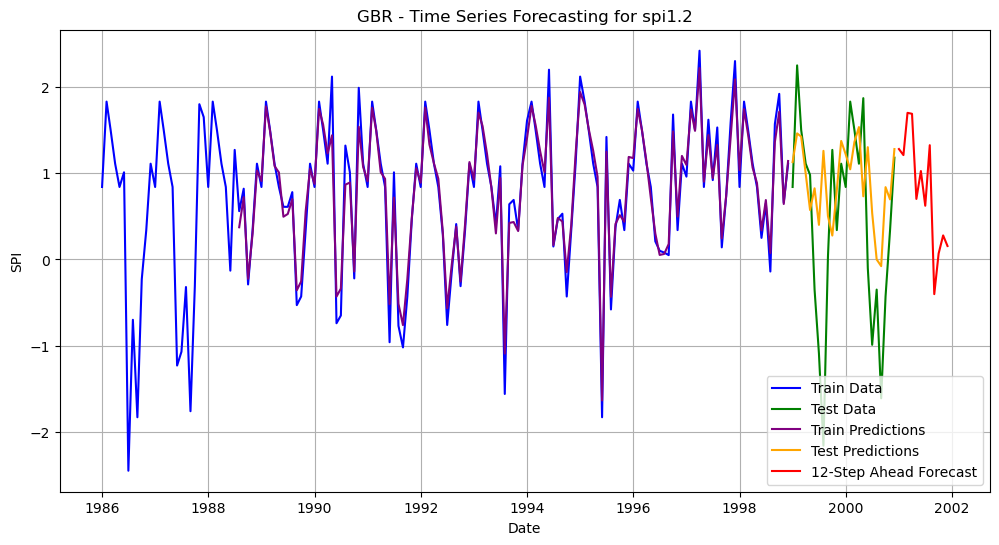

Prediction for spi1.3:
            Prediction  Actual
Date                          
1999-01-01    1.177271    0.84
1999-02-01    1.136267    2.38
1999-03-01    1.577993    1.28
1999-04-01    1.108502    1.11
1999-05-01    0.952799    1.21
1999-06-01    0.416752   -0.14
1999-07-01    0.285394   -0.68
1999-08-01    0.852034   -1.82
1999-09-01    0.578273   -0.42
1999-10-01   -0.291801    2.14
1999-11-01    0.043943    0.43
1999-12-01    1.244868    1.28
2000-01-01    1.993304    0.84
2000-02-01    1.195110    1.28
2000-03-01    1.254109    1.28
2000-04-01    1.510448    1.20
2000-05-01    0.846508    1.94
2000-06-01    0.180964    0.07
2000-07-01    0.214421   -0.47
2000-08-01    0.101628   -0.82
2000-09-01    0.551069   -1.62
2000-10-01    0.344722   -0.43
2000-11-01    1.156073    0.43
2000-12-01    1.295136    1.76
RMSE for spi1.3 = 1.0660486693286777
RMSE percentage for spi1.3 = 25.382109445473333
R2 for spi1.3 = 0.09495307936157016
Forecasted values:
             Forecasted
Date   

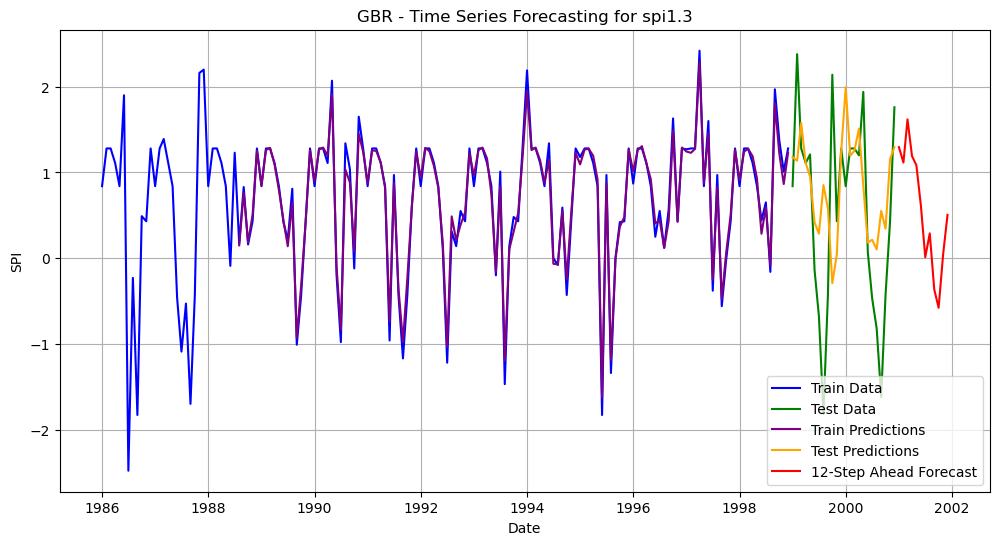

Prediction for spi1.4:
            Prediction  Actual
Date                          
1999-01-01    1.196501    1.11
1999-02-01    1.130678    2.35
1999-03-01    1.199993    1.28
1999-04-01    0.899836    1.11
1999-05-01    1.170782    1.15
1999-06-01    0.618160   -0.02
1999-07-01   -0.536813   -0.95
1999-08-01    0.558914   -1.77
1999-09-01    0.864609   -0.41
1999-10-01    0.332475    1.23
1999-11-01    0.979209    0.52
1999-12-01    1.301716    1.28
2000-01-01    1.721290    1.11
2000-02-01    1.174681    1.28
2000-03-01    0.838188    1.28
2000-04-01    1.011327    1.48
2000-05-01    0.556479    1.73
2000-06-01    0.030071    0.17
2000-07-01    0.075442   -0.71
2000-08-01    0.258328   -1.16
2000-09-01    0.701386   -1.35
2000-10-01    0.908488   -0.52
2000-11-01    1.331259    0.52
2000-12-01    1.134997    1.66
RMSE for spi1.4 = 0.9616830775949461
RMSE percentage for spi1.4 = 23.341822920085985
R2 for spi1.4 = 0.23163104613032914
Forecasted values:
             Forecasted
Date   

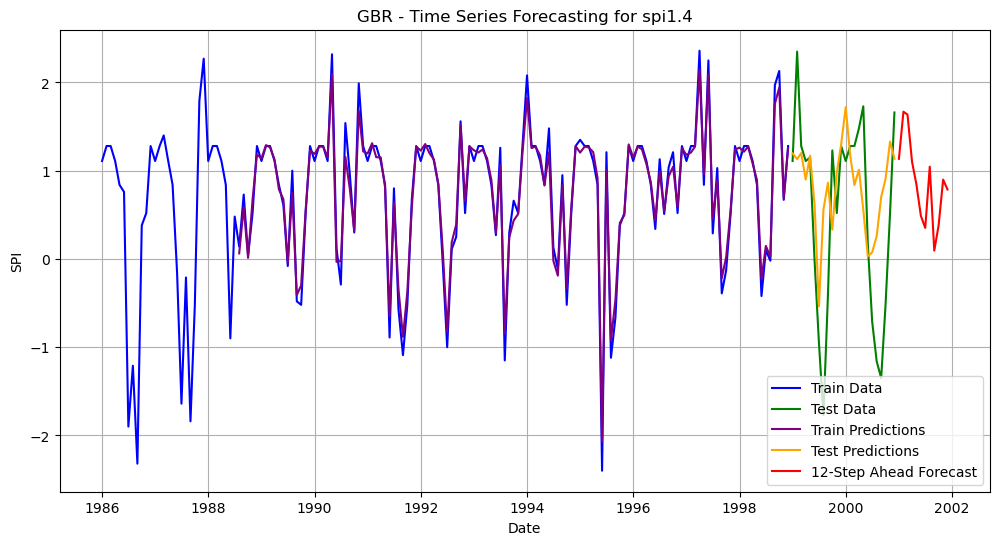

In [42]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta

# Assuming you have a DataFrame named spi with a DateTime index
# and each column is a separate time series for SPI

for spi_column in spi.columns:
    sequence_length = 30
    X, y = [], []

    # Generate sequences and labels
    for i in range(len(spi[spi_column]) - sequence_length - 1):
        X.append(spi[spi_column][i:i+sequence_length].values)
        y.append(spi[spi_column][i+sequence_length+1])

    X, y = np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)
    train_size = int(len(X) - 24)
    X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

    # Use GradientBoostingRegressor
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

    gb_model.fit(X_train, y_train)
    predictions_train = gb_model.predict(X_train)
    train_predictions_df = pd.DataFrame({'Prediction': predictions_train,
                                    'Actual': spi_train[spi_column][31:]})


    predictions = gb_model.predict(X_test)
    pred_df = pd.DataFrame({'Date':spi_test.index,'Prediction': predictions, 'Actual': y_test})
    pred_df.set_index('Date', inplace=True)
    print(f"Prediction for {spi_column}:")

    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    y_range = np.max(y_test) - np.min(y_test)
    rmse_percentage = (rmse / y_range) * 100
    print(pred_df)
    print(f'RMSE for {spi_column} = {rmse}')
    print(f'RMSE percentage for {spi_column} = {rmse_percentage}')
    print(f'R2 for {spi_column} = {r2}')

    def pred_n_days(model, data, days):
        predictions = []

        for i in range(days):
            data = data.reshape(1, -1)  # Ensure data is 2D
            curr_pred = model.predict(data)
            predictions.append(curr_pred[0])

            # Update data for the next prediction
            data = np.concatenate((data[:, 1:], curr_pred.reshape(1, -1)), axis=1)

        return np.array(predictions)

    # Generate forecasts
    data = X[-1]
    forecast = pred_n_days(gb_model, data, 12)
    future_dates = pd.date_range(spi.index.max() + pd.DateOffset(months=1), periods=12, freq='MS')
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted': forecast})
    forecast_df.set_index('Date', inplace=True)
    print("Forecasted values:\n", forecast_df)
    plt.figure(figsize=(12, 6))
    plt.plot(spi_train.index, spi_train[spi_column], label='Train Data', color='blue')
    plt.plot(spi_test.index, spi_test[spi_column], label='Test Data', color='green')
    plt.plot(train_predictions_df.index, train_predictions_df['Prediction'], label='Train Predictions', color='purple')
    plt.plot(pred_df.index, pred_df['Prediction'], label='Test Predictions', color='orange')
    plt.plot(forecast_df.index, forecast_df['Forecasted'], label='12-Step Ahead Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('SPI')
    plt.legend()
    plt.title(f'GBR - Time Series Forecasting for {spi_column}')
    plt.grid(True)
    plt.show()

In [43]:
df=spi.copy()

<h2>Support Vector Regression</h2>

In [44]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta

Prediction for spi1:
            Prediction  Actual
Date                          
1999-01-01    1.264152    0.97
1999-02-01    1.145940    1.99
1999-03-01    0.896405    1.50
1999-04-01    0.436272    0.97
1999-05-01   -0.012356    0.60
1999-06-01    0.230924    0.26
1999-07-01    0.029732   -0.36
1999-08-01    0.221678   -1.92
1999-09-01    0.061428   -0.29
1999-10-01    0.091948    2.37
1999-11-01    0.517296    0.52
1999-12-01    1.031266    0.97
2000-01-01    1.191049    0.97
2000-02-01    1.052029    1.28
2000-03-01    0.813674    1.50
2000-04-01    0.436345    0.97
2000-05-01    0.162625    1.85
2000-06-01    0.184487   -0.11
2000-07-01    0.281570   -0.25
2000-08-01    0.382190   -0.66
2000-09-01   -0.074164   -1.45
2000-10-01    0.420024   -0.34
2000-11-01    0.679267    0.52
2000-12-01    0.674360    1.28
RMSE for spi1 = 0.9106204491335103
RMSE percentage for spi1 = 21.226584084634254
R2 for spi1 = 0.23111060295338615
Forecasted values:
             Forecasted
Date           

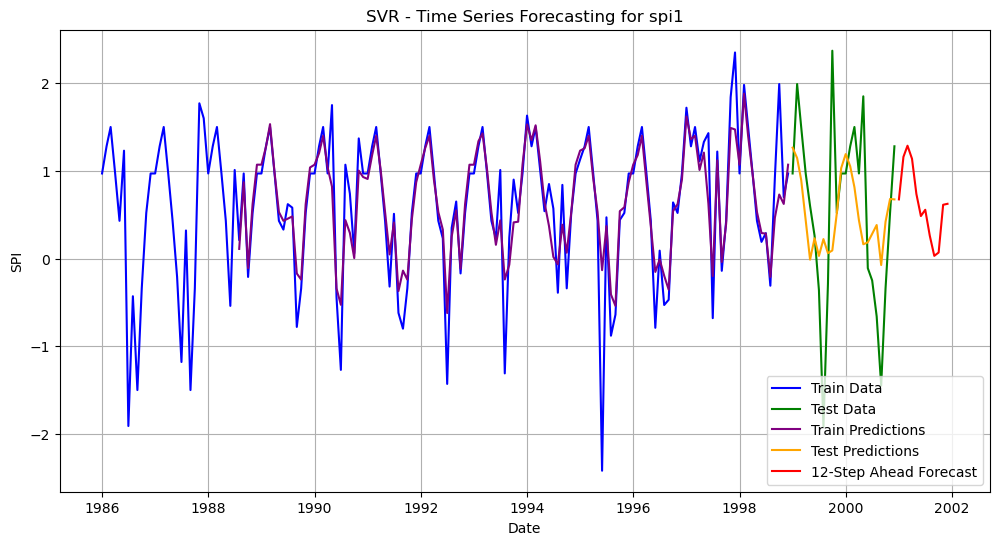

Prediction for spi1.1:
            Prediction  Actual
Date                          
1999-01-01    1.142510    1.50
1999-02-01    1.199267    2.30
1999-03-01    0.975232    1.50
1999-04-01    0.765823    1.11
1999-05-01    0.409814    0.94
1999-06-01    0.243481    0.10
1999-07-01    0.060477   -0.17
1999-08-01    0.256736   -1.66
1999-09-01   -0.033813    0.15
1999-10-01    0.398983    1.92
1999-11-01    0.708257    0.52
1999-12-01    1.242341    1.11
2000-01-01    1.277977    1.50
2000-02-01    1.165840    1.50
2000-03-01    1.029451    1.50
2000-04-01    0.652904    1.11
2000-05-01    0.267034    1.96
2000-06-01    0.188939    0.30
2000-07-01    0.402910   -0.24
2000-08-01    0.300570   -0.12
2000-09-01   -0.122946   -1.35
2000-10-01    0.530785   -0.17
2000-11-01    0.850742    0.52
2000-12-01    0.980168    1.35
RMSE for spi1.1 = 0.776345197514945
RMSE percentage for spi1.1 = 19.604676516069556
R2 for spi1.1 = 0.38560391811260597
Forecasted values:
             Forecasted
Date    

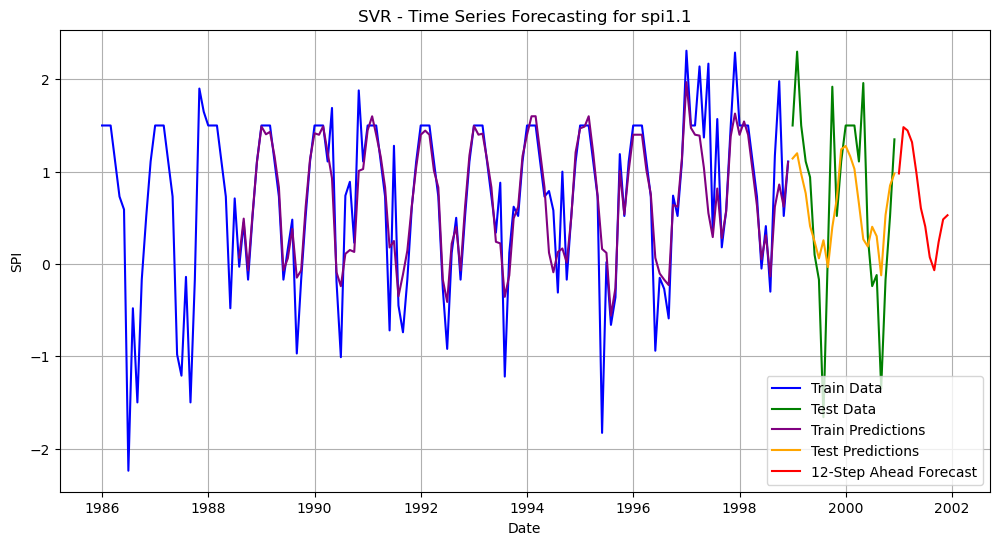

Prediction for spi1.2:
            Prediction  Actual
Date                          
1999-01-01    1.423478    0.84
1999-02-01    1.191071    2.25
1999-03-01    1.067237    1.50
1999-04-01    0.698021    1.11
1999-05-01    0.841737    0.98
1999-06-01    0.427722   -0.35
1999-07-01    0.505075   -1.09
1999-08-01    0.565328   -2.16
1999-09-01    0.191495    0.03
1999-10-01    0.392879    1.27
1999-11-01    0.741829    0.34
1999-12-01    1.227396    1.11
2000-01-01    1.126720    0.84
2000-02-01    1.118447    1.83
2000-03-01    0.978925    1.50
2000-04-01    0.646884    1.11
2000-05-01    0.440082    1.87
2000-06-01    0.404694   -0.10
2000-07-01    0.516384   -0.99
2000-08-01    0.151474   -0.35
2000-09-01    0.146136   -1.61
2000-10-01    0.327485   -0.43
2000-11-01    0.705596    0.34
2000-12-01    1.030690    1.18
RMSE for spi1.2 = 0.9809310419662571
RMSE percentage for spi1.2 = 22.24333505457807
R2 for spi1.2 = 0.24331971420291665
Forecasted values:
             Forecasted
Date    

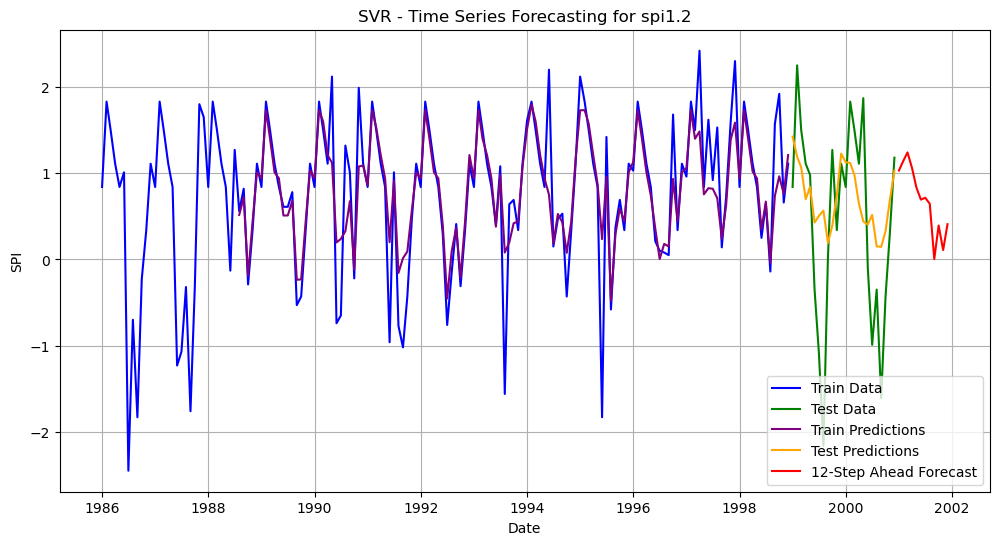

Prediction for spi1.3:
            Prediction  Actual
Date                          
1999-01-01    1.299639    0.84
1999-02-01    1.003285    2.38
1999-03-01    1.156513    1.28
1999-04-01    0.807349    1.11
1999-05-01    1.084276    1.21
1999-06-01    0.583086   -0.14
1999-07-01    0.572583   -0.68
1999-08-01    0.404221   -1.82
1999-09-01    0.095291   -0.42
1999-10-01    0.114634    2.14
1999-11-01    0.347978    0.43
1999-12-01    0.933718    1.28
2000-01-01    1.164359    0.84
2000-02-01    1.035720    1.28
2000-03-01    0.932388    1.28
2000-04-01    0.679767    1.20
2000-05-01    0.557665    1.94
2000-06-01    0.653478    0.07
2000-07-01    0.374833   -0.47
2000-08-01    0.605954   -0.82
2000-09-01    0.410670   -1.62
2000-10-01    0.655962   -0.43
2000-11-01    0.732269    0.43
2000-12-01    0.783585    1.76
RMSE for spi1.3 = 1.0341048012675942
RMSE percentage for spi1.3 = 24.621541210114277
R2 for spi1.3 = 0.14837943687827237
Forecasted values:
             Forecasted
Date   

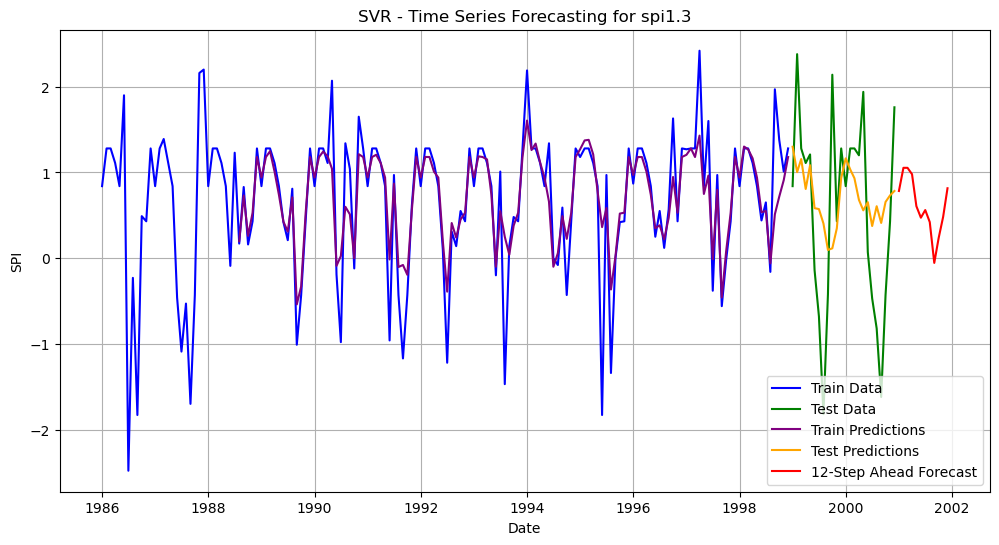

Prediction for spi1.4:
            Prediction  Actual
Date                          
1999-01-01    1.040912    1.11
1999-02-01    0.786504    2.35
1999-03-01    0.770170    1.28
1999-04-01    0.669436    1.11
1999-05-01    0.799588    1.15
1999-06-01    0.822809   -0.02
1999-07-01    0.776389   -0.95
1999-08-01    0.555902   -1.77
1999-09-01    0.219336   -0.41
1999-10-01    0.126695    1.23
1999-11-01    0.505780    0.52
1999-12-01    1.006625    1.28
2000-01-01    1.240317    1.11
2000-02-01    1.123128    1.28
2000-03-01    0.933570    1.28
2000-04-01    0.606098    1.48
2000-05-01    0.443518    1.73
2000-06-01    0.459393    0.17
2000-07-01    0.307403   -0.71
2000-08-01    0.545089   -1.16
2000-09-01    0.612581   -1.35
2000-10-01    0.592948   -0.52
2000-11-01    0.767463    0.52
2000-12-01    0.963144    1.66
RMSE for spi1.4 = 1.0420074302441502
RMSE percentage for spi1.4 = 25.291443184172575
R2 for spi1.4 = 0.09791493553650044
Forecasted values:
             Forecasted
Date   

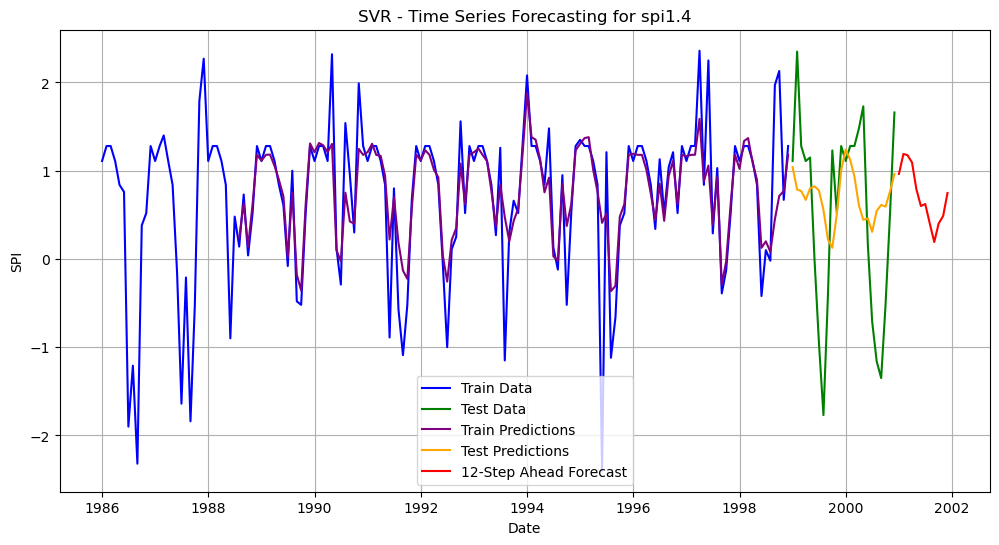

In [45]:
for spi_column in spi.columns:
    sequence_length = 30
    X, y = [], []

    # Generate sequences and labels
    for i in range(len(spi[spi_column]) - sequence_length - 1):
        X.append(spi[spi_column][i:i+sequence_length].values)
        y.append(spi[spi_column][i+sequence_length+1])

    X, y = np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)
    train_size = int(len(X) - 24)
    X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

    svr_model = SVR()

    svr_model.fit(X_train, y_train)
    predictions_train = svr_model.predict(X_train)
    train_predictions_df = pd.DataFrame({'Prediction': predictions_train,
                                    'Actual': spi_train[spi_column][31:]})



    predictions = svr_model.predict(X_test)
    pred_df = pd.DataFrame({'Date': spi_test.index,'Prediction': predictions, 'Actual': y_test})
    pred_df.set_index('Date', inplace=True)
    print(f"Prediction for {spi_column}:")

    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    y_range = np.max(y_test) - np.min(y_test)
    rmse_percentage = (rmse / y_range) * 100
    print(pred_df)
    print(f'RMSE for {spi_column} = {rmse}')
    print(f'RMSE percentage for {spi_column} = {rmse_percentage}')
    print(f'R2 for {spi_column} = {r2}')

    def pred_n_days(model, data, days):
        predictions = []

        for i in range(days):
            data = data.reshape(1, -1)  # Ensure data is 2D
            curr_pred = model.predict(data)
            predictions.append(curr_pred[0])

            # Update data for the next prediction
            data = np.concatenate((data[:, 1:], curr_pred.reshape(1, -1)), axis=1)

        return np.array(predictions)

    # Generate forecasts
    data = X[-1]
    forecast = pred_n_days(svr_model, data, 12)
    future_dates = pd.date_range(spi.index.max() + pd.DateOffset(months=1), periods=12, freq='MS')
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted': forecast})
    forecast_df.set_index('Date', inplace=True)
    print("Forecasted values:\n", forecast_df)
    plt.figure(figsize=(12, 6))
    plt.plot(spi_train.index, spi_train[spi_column], label='Train Data', color='blue')
    plt.plot(spi_test.index, spi_test[spi_column], label='Test Data', color='green')
    plt.plot(train_predictions_df.index, train_predictions_df['Prediction'], label='Train Predictions', color='purple')
    plt.plot(pred_df.index, pred_df['Prediction'], label='Test Predictions', color='orange')
    plt.plot(forecast_df.index, forecast_df['Forecasted'], label='12-Step Ahead Forecast', color='red')
    plt.xlabel('Date')
    plt.ylabel('SPI')
    plt.legend()
    plt.title(f'SVR - Time Series Forecasting for {spi_column}')
    plt.grid(True)
    plt.show()